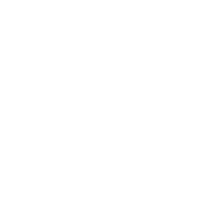

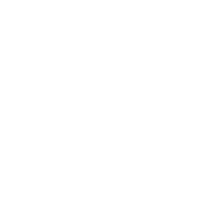

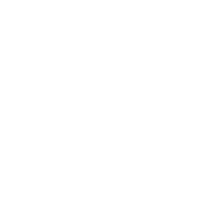

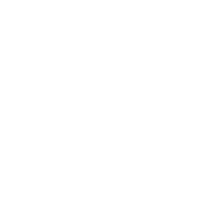

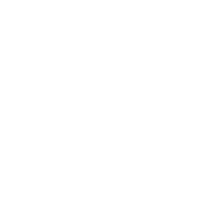

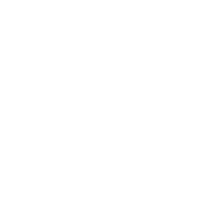

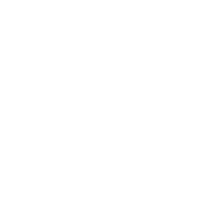

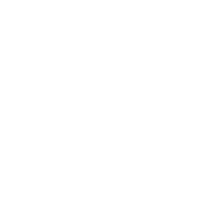

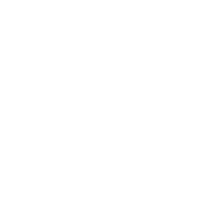

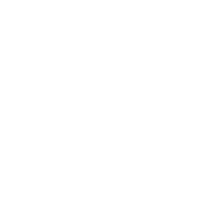

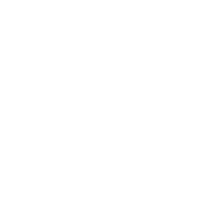

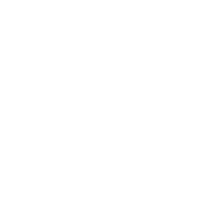

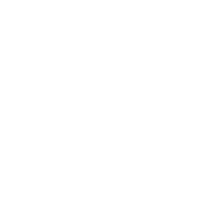

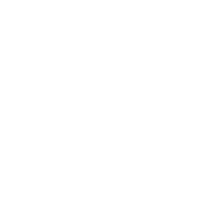

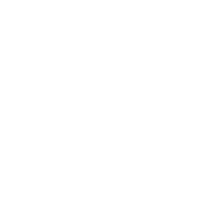

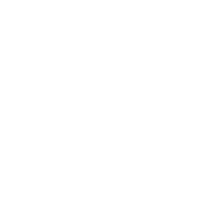

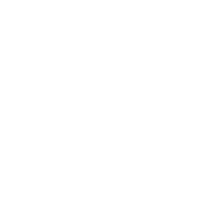

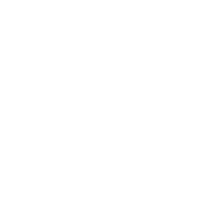

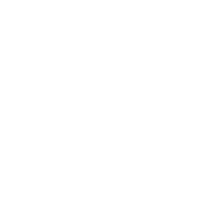

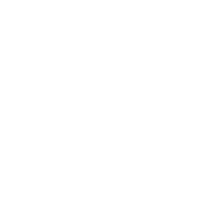

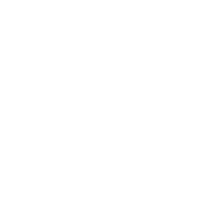

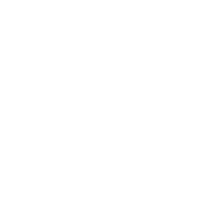

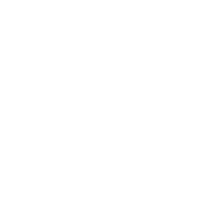

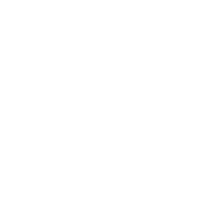

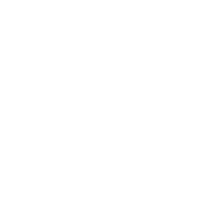

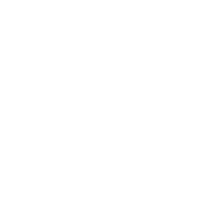

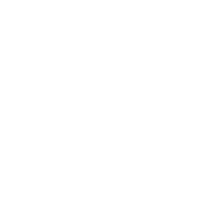

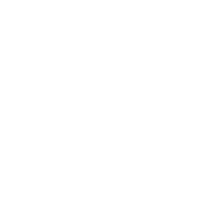

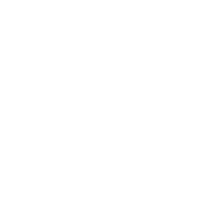

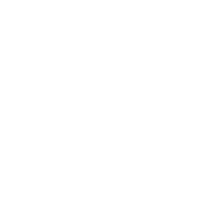

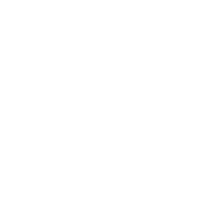

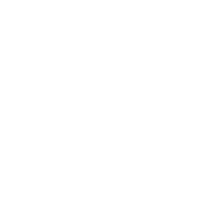

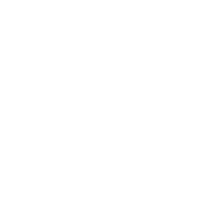

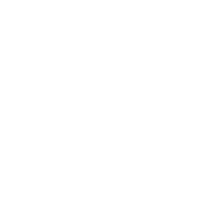

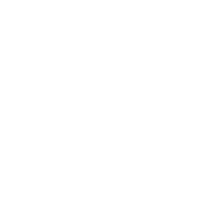

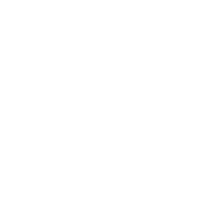

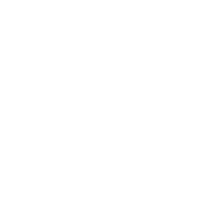

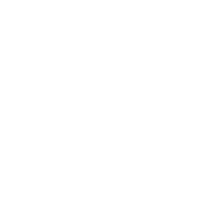

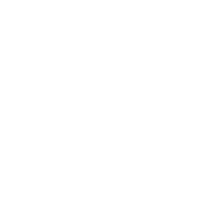

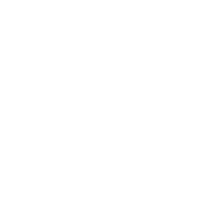

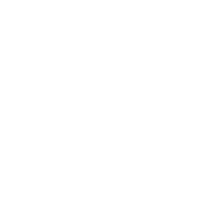

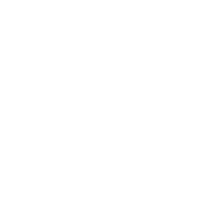

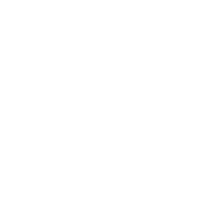

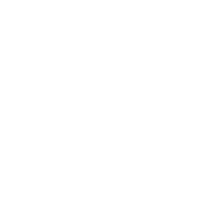

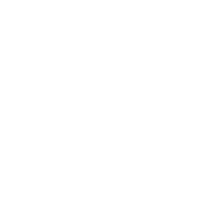

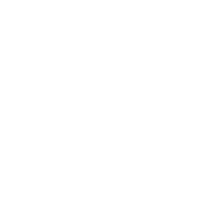

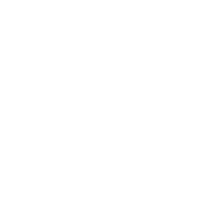

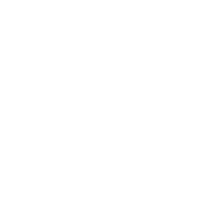

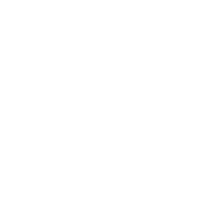

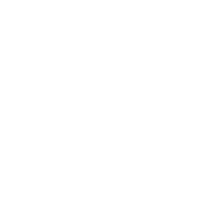

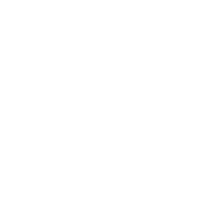

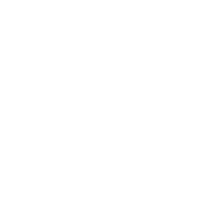

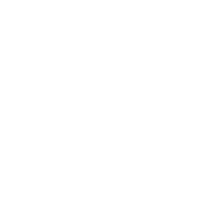

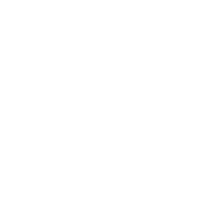

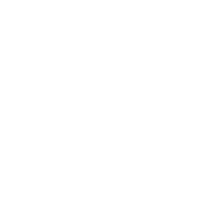

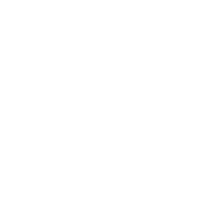

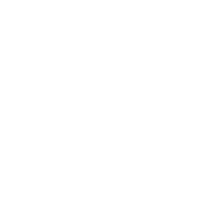

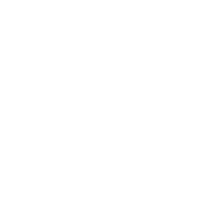

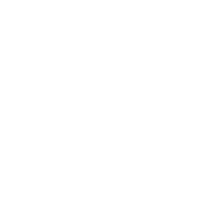

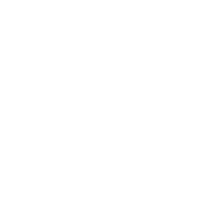

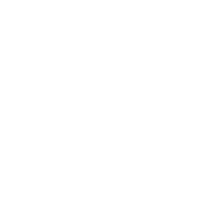

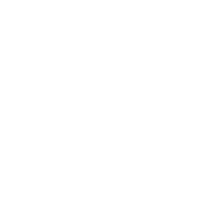

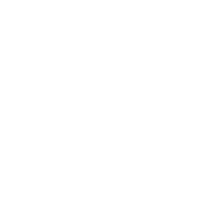

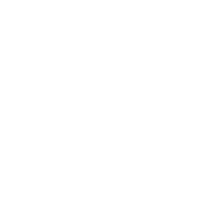

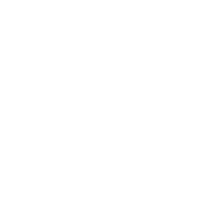

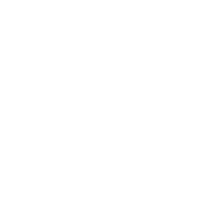

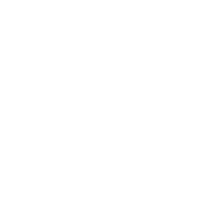

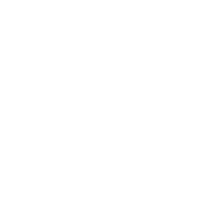

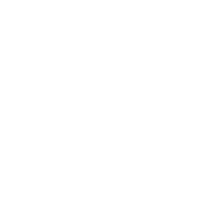

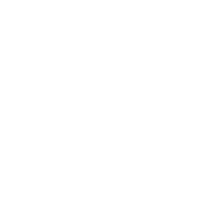

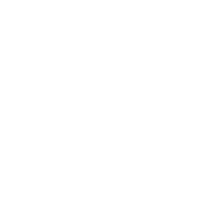

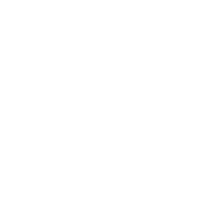

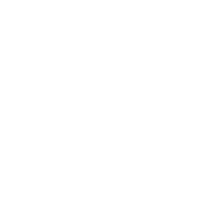

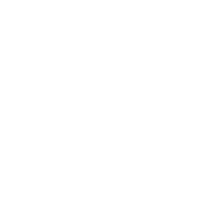

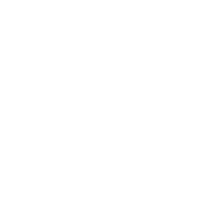

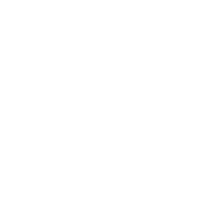

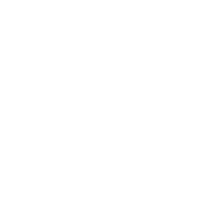

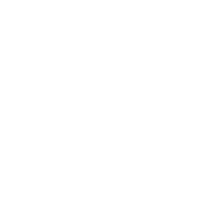

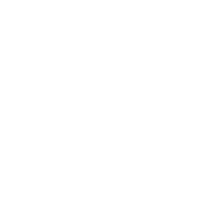

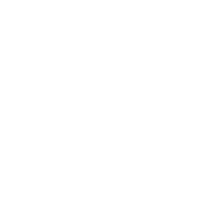

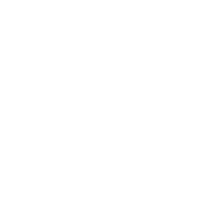

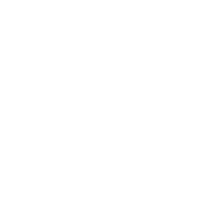

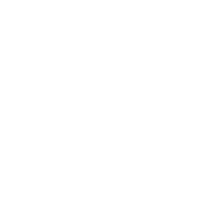

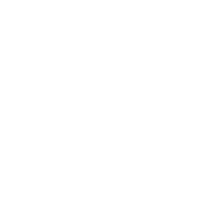

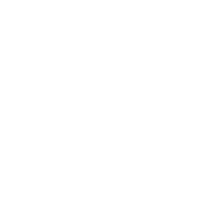

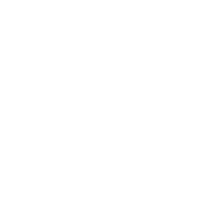

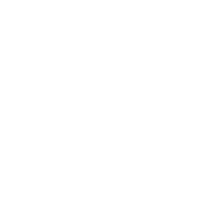

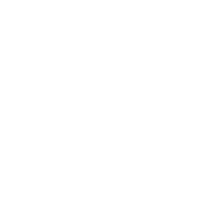

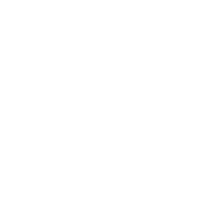

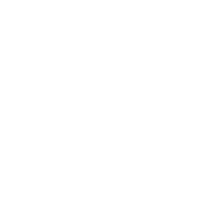

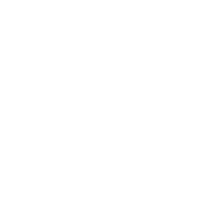

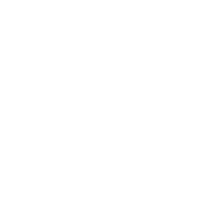

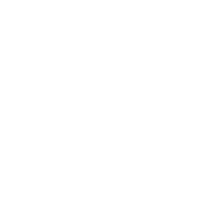

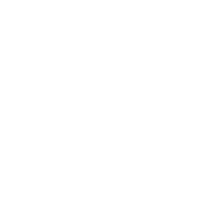

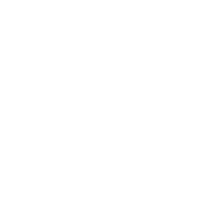

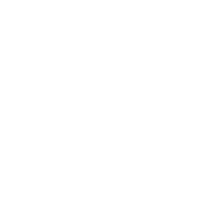

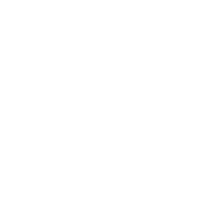

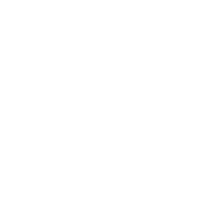

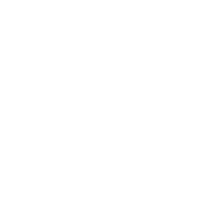

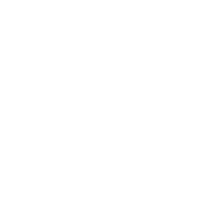

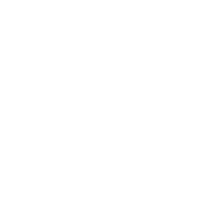

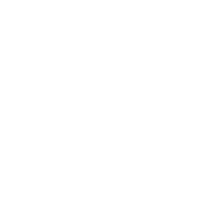

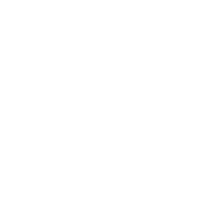

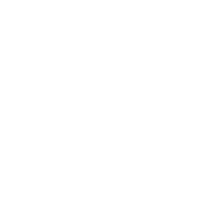

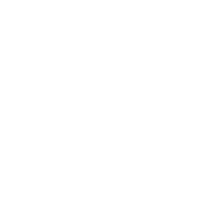

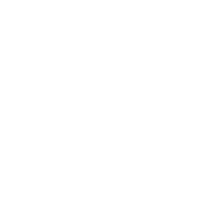

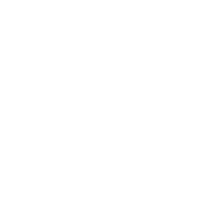

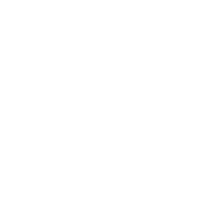

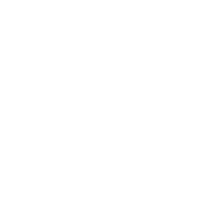

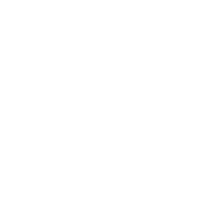

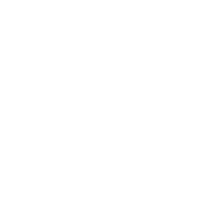

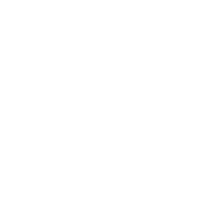

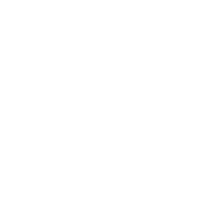

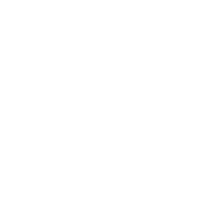

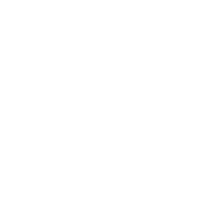

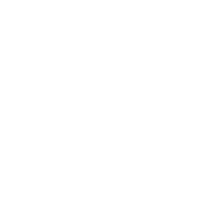

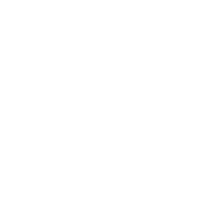

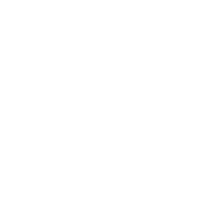

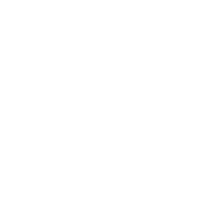

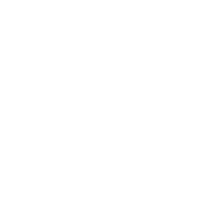

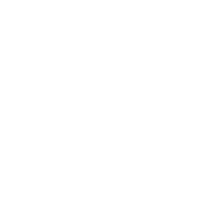

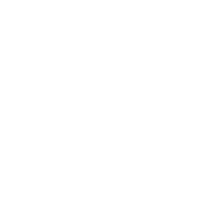

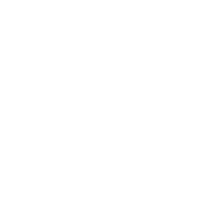

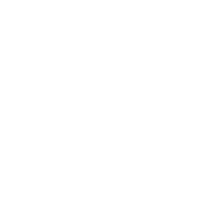

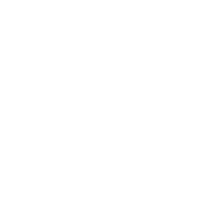

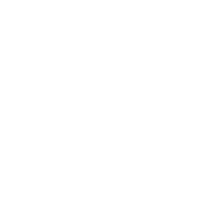

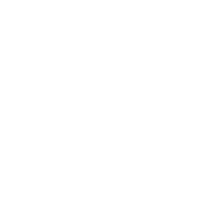

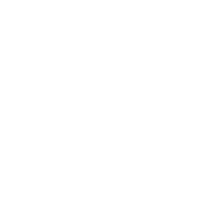

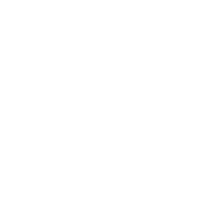

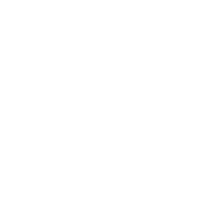

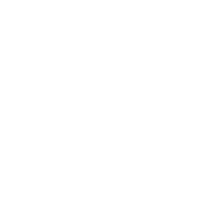

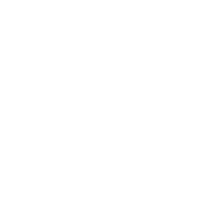

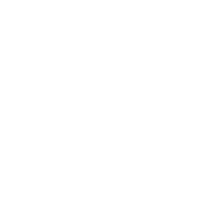

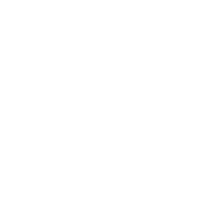

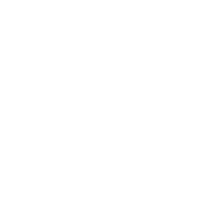

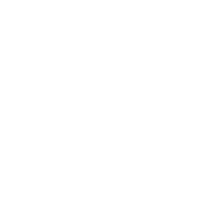

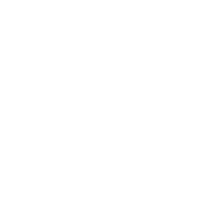

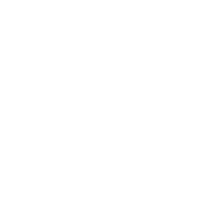

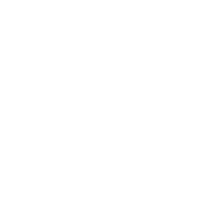

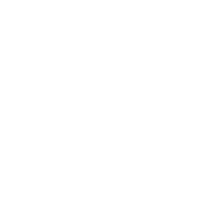

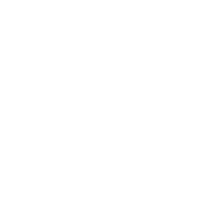

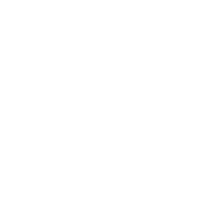

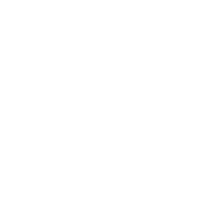

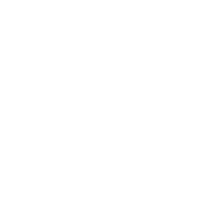

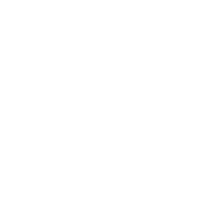

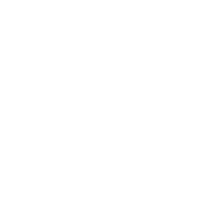

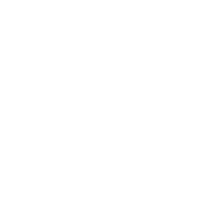

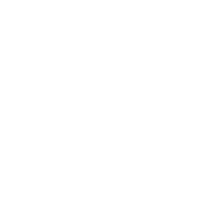

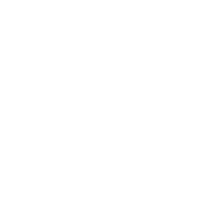

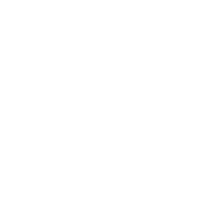

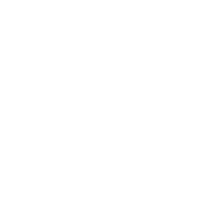

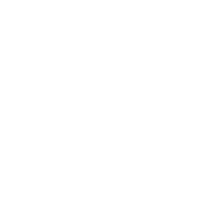

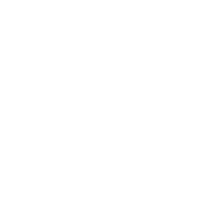

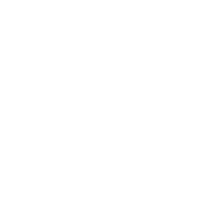

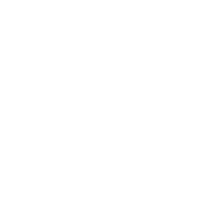

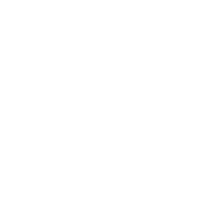

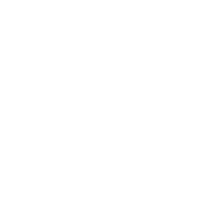

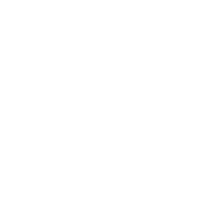

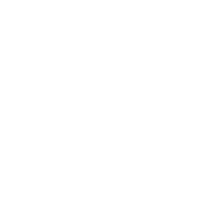

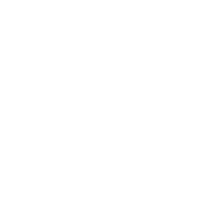

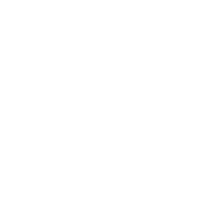

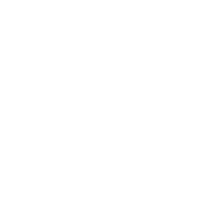

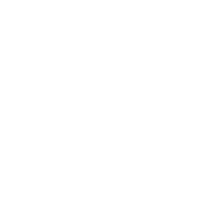

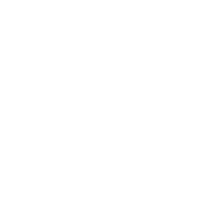

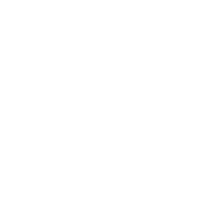

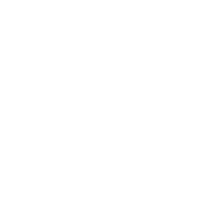

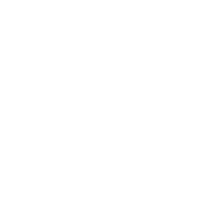

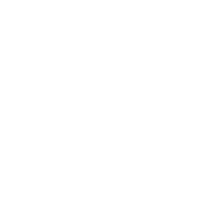

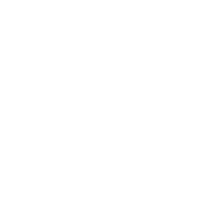

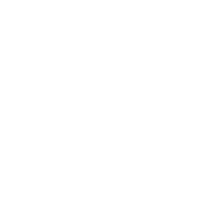

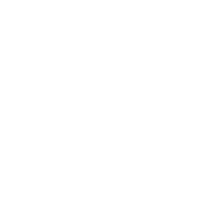

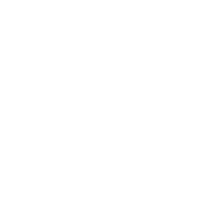

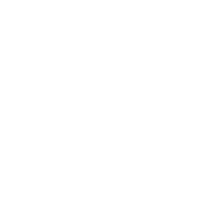

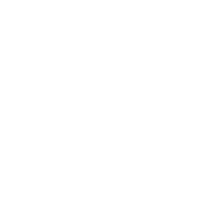

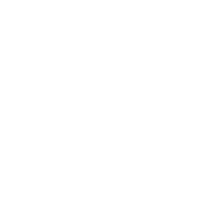

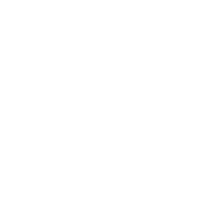

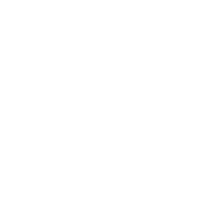

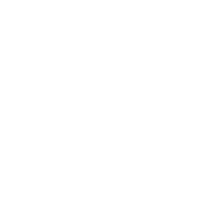

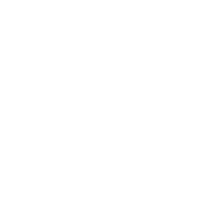

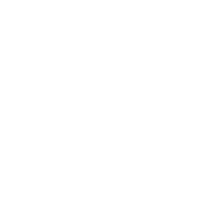

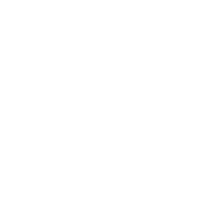

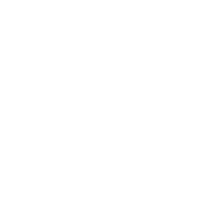

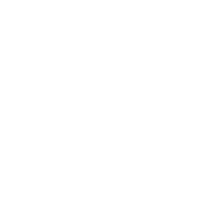

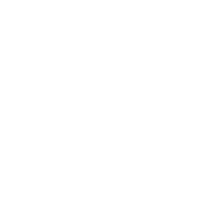

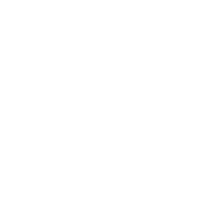

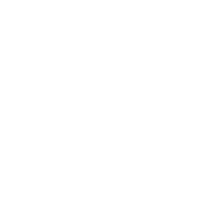

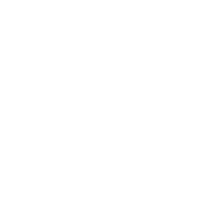

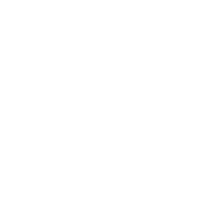

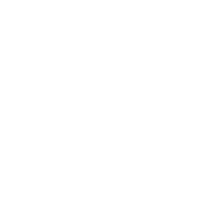

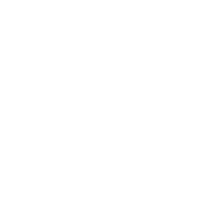

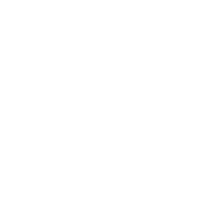

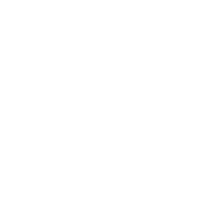

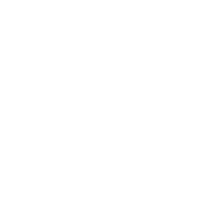

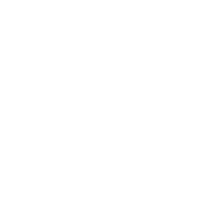

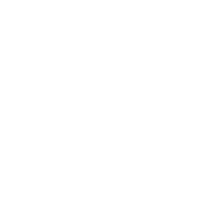

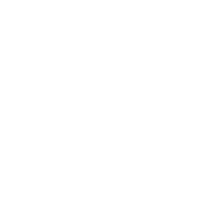

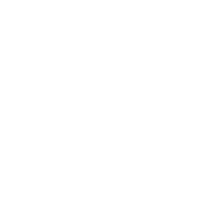

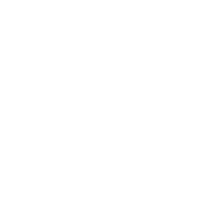

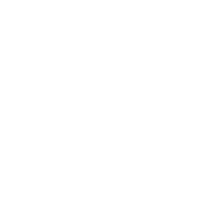

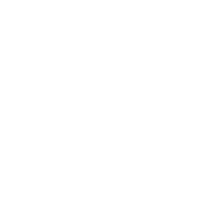

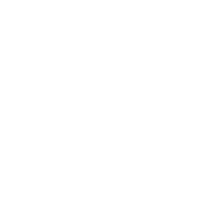

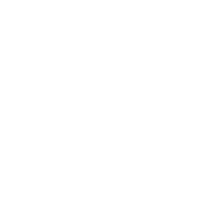

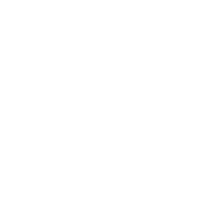

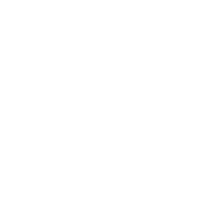

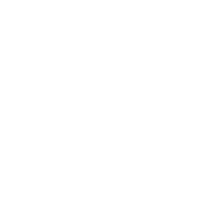

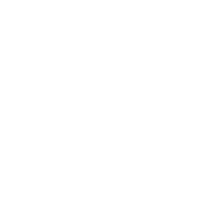

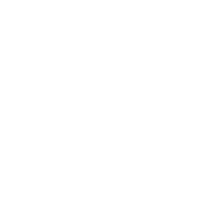

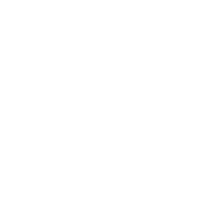

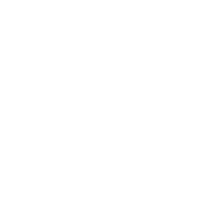

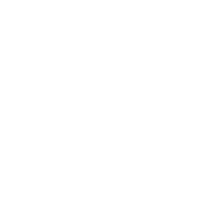

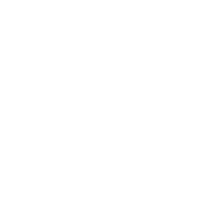

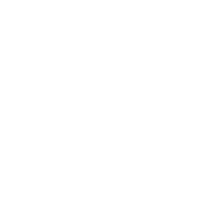

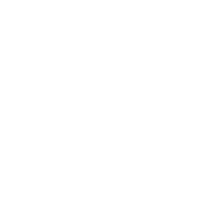

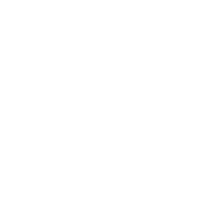

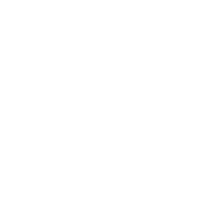

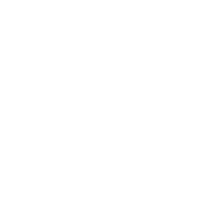

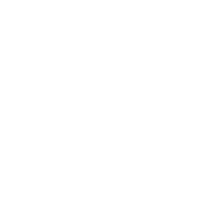

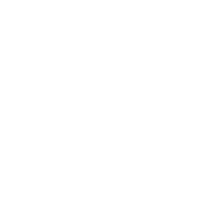

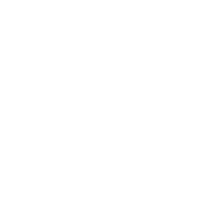

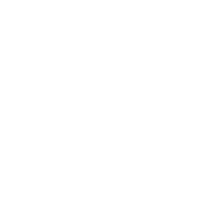

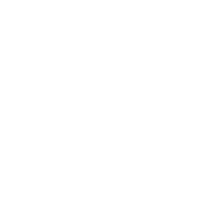

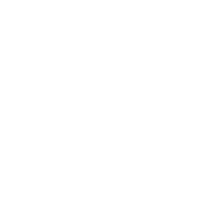

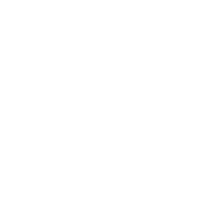

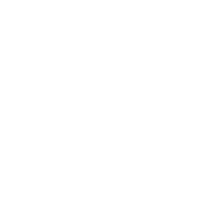

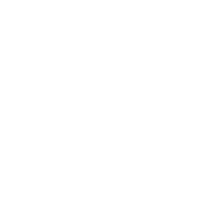

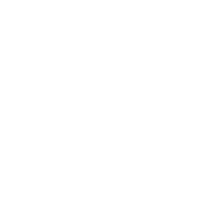

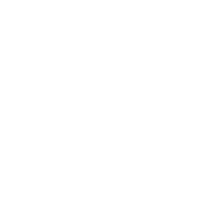

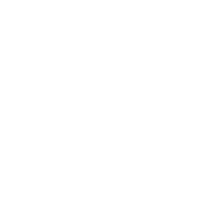

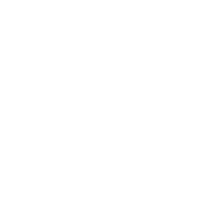

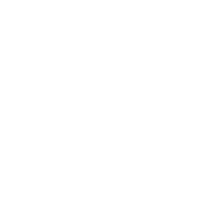

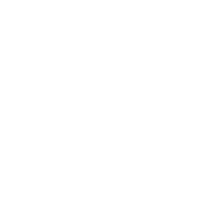

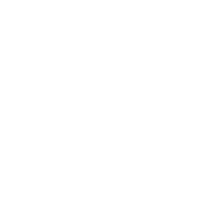

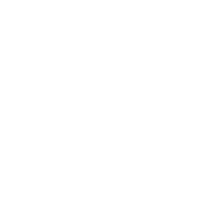

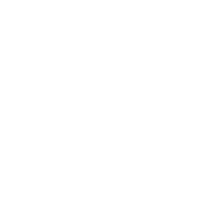

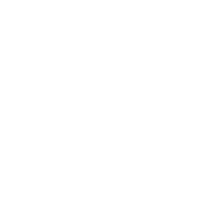

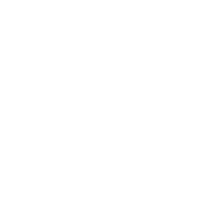

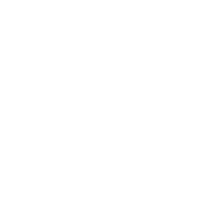

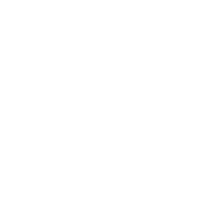

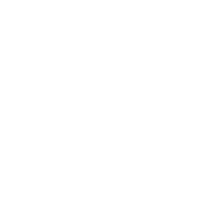

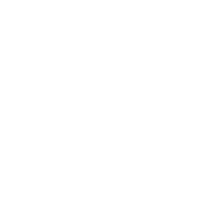

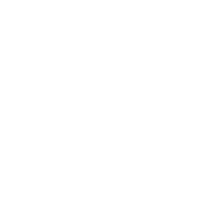

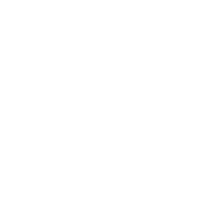

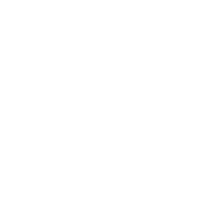

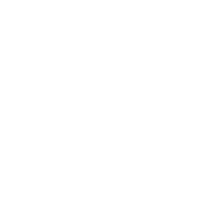

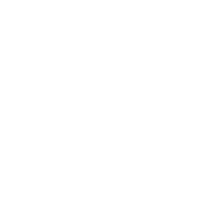

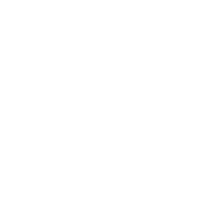

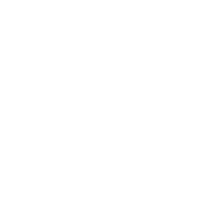

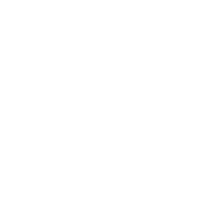

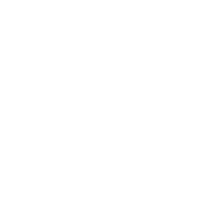

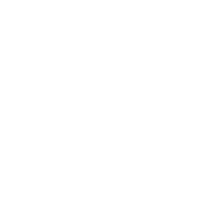

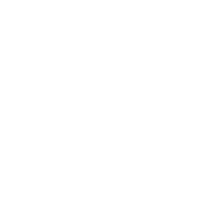

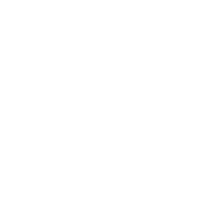

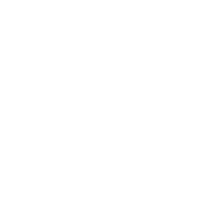

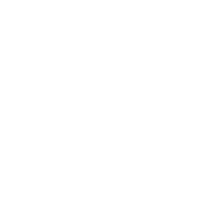

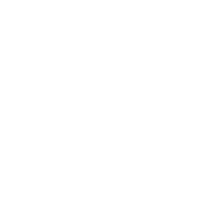

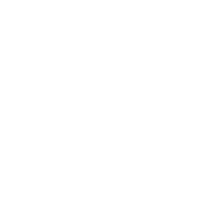

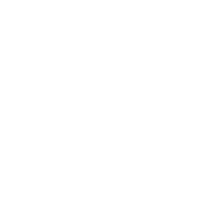

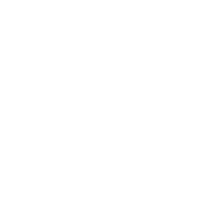

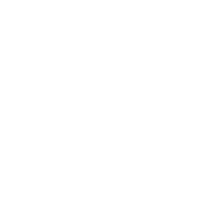

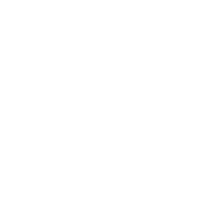

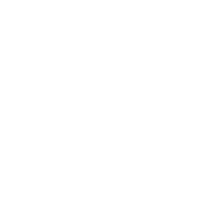

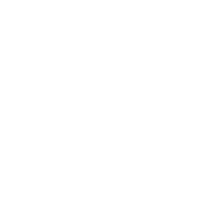

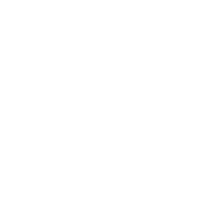

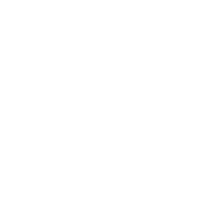

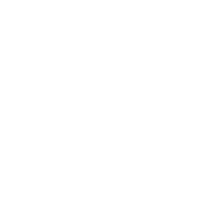

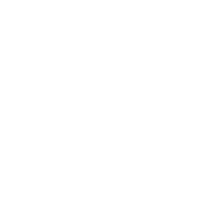

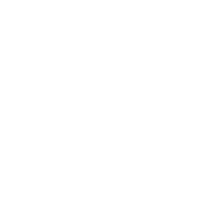

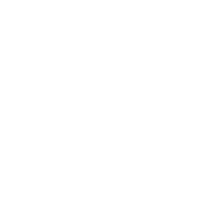

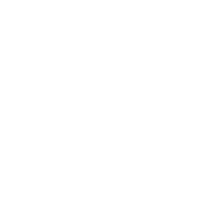

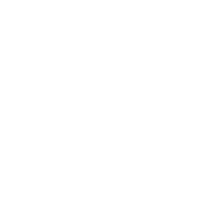

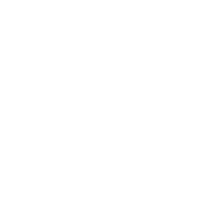

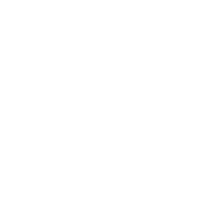

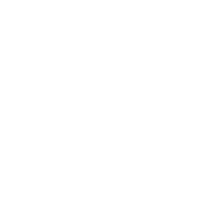

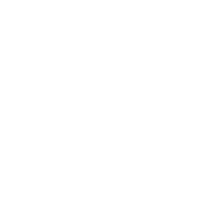

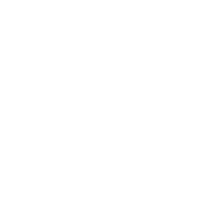

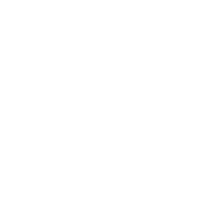

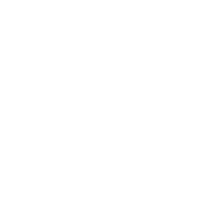

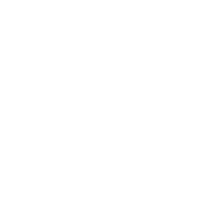

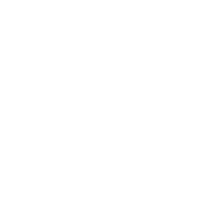

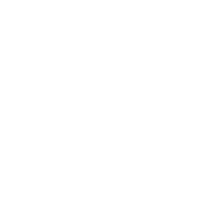

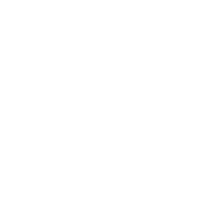

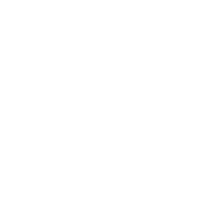

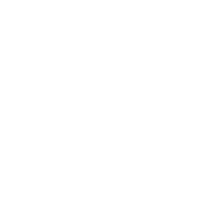

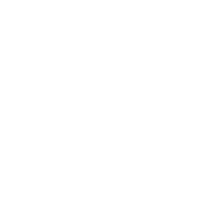

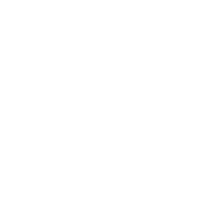

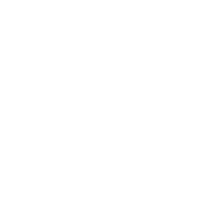

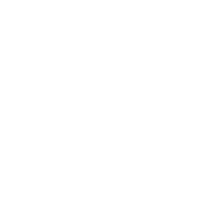

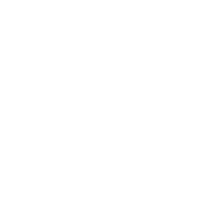

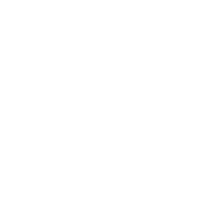

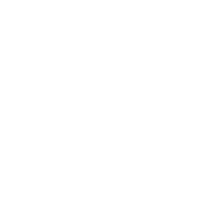

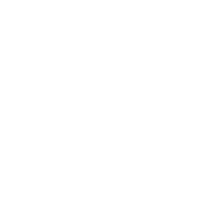

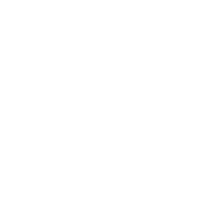

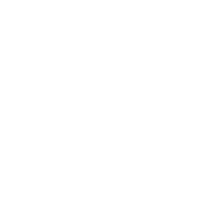

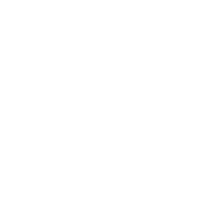

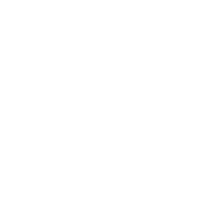

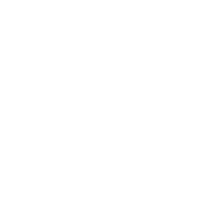

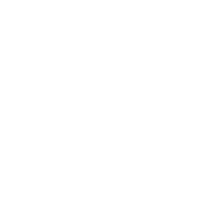

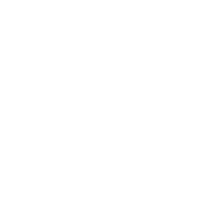

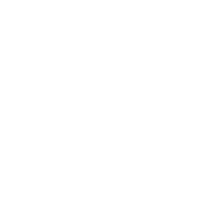

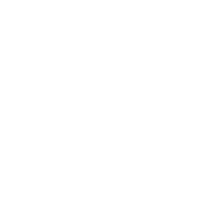

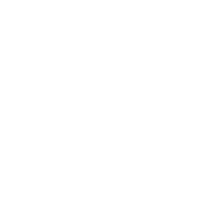

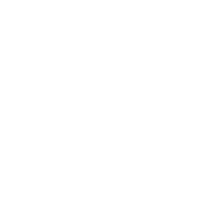

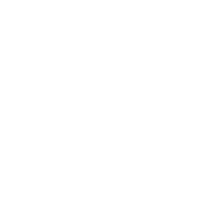

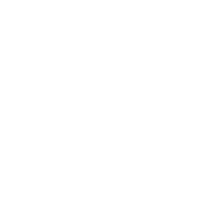

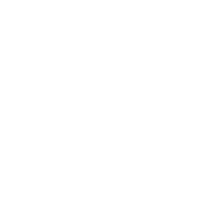

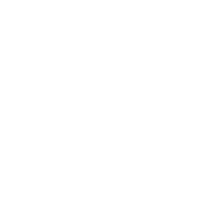

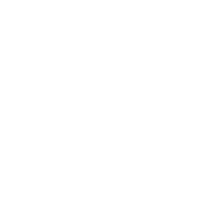

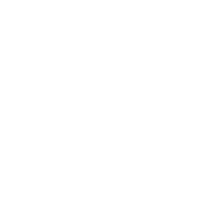

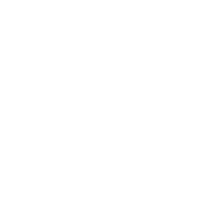

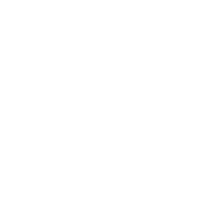

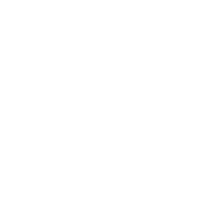

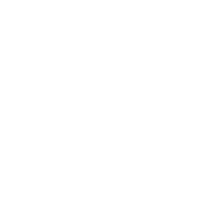

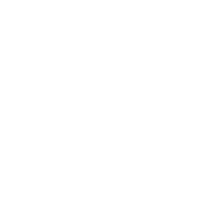

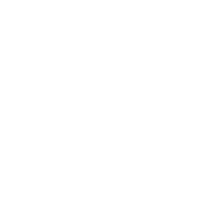

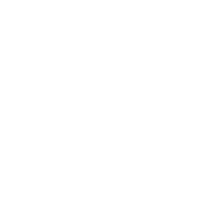

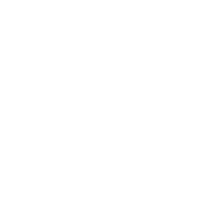

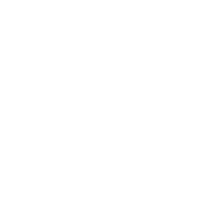

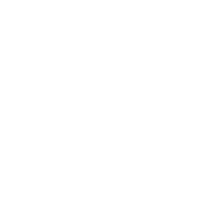

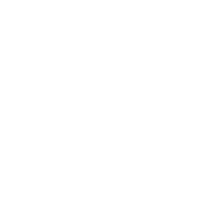

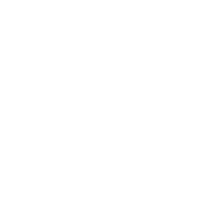

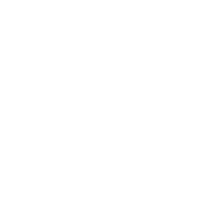

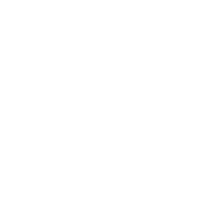

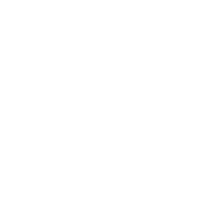

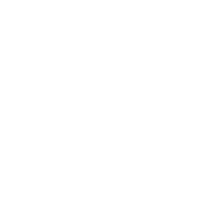

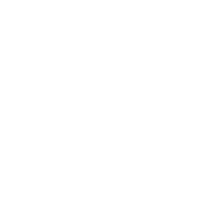

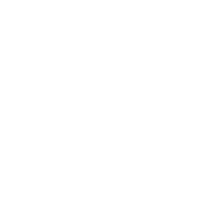

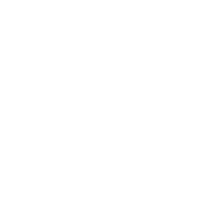

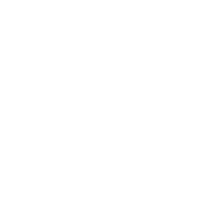

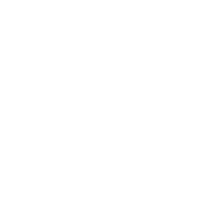

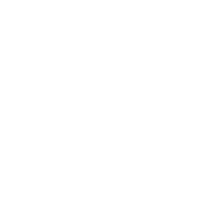

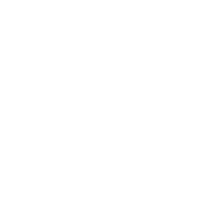

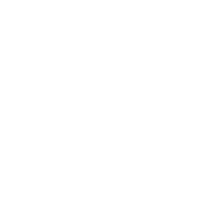

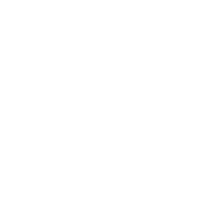

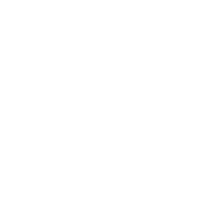

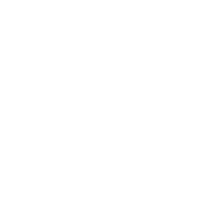

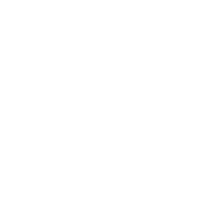

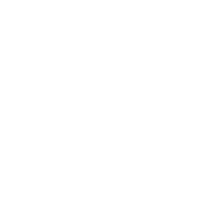

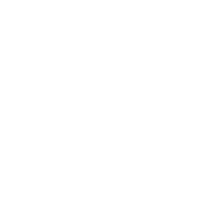

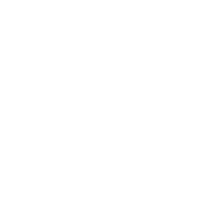

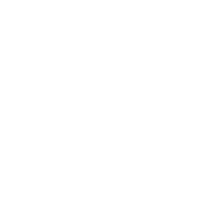

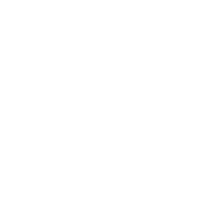

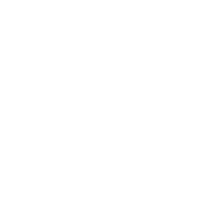

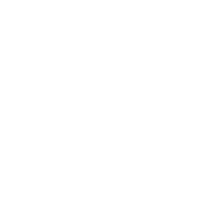

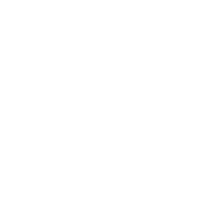

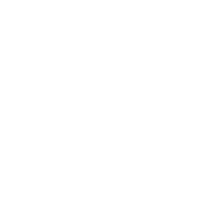

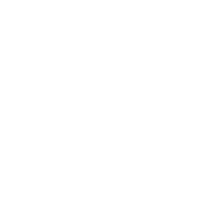

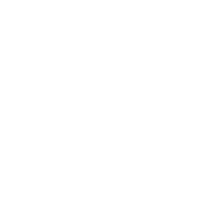

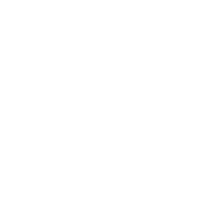

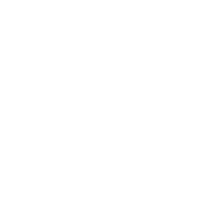

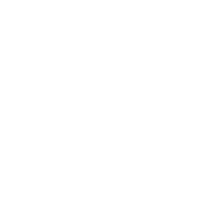

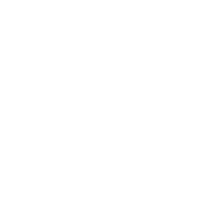

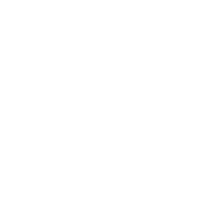

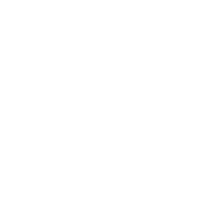

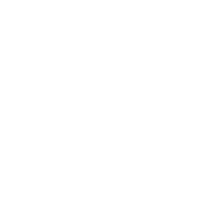

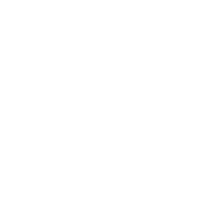

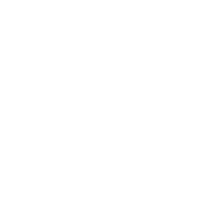

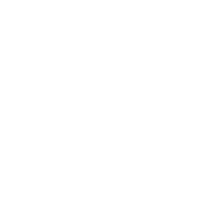

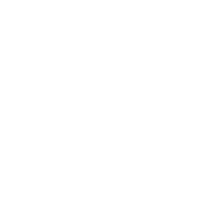

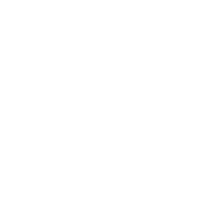

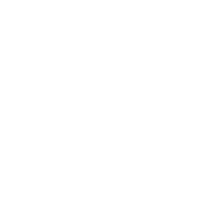

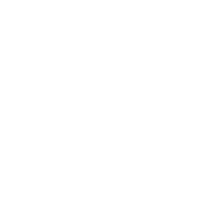

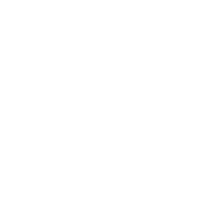

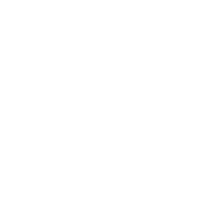

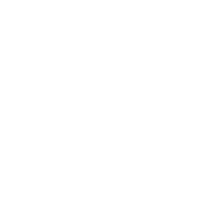

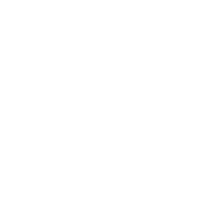

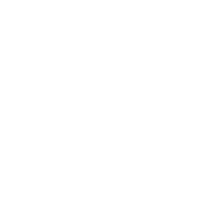

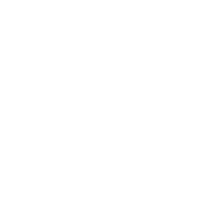

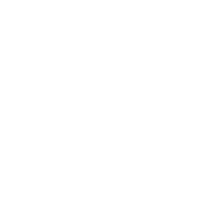

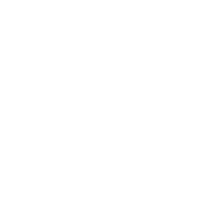

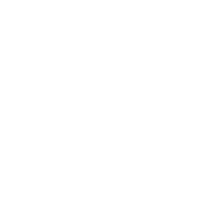

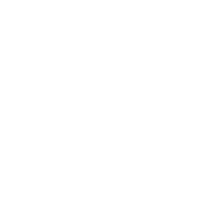

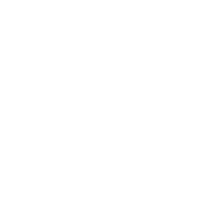

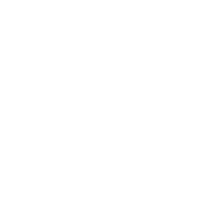

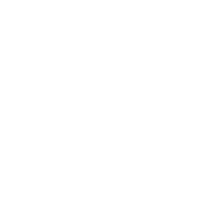

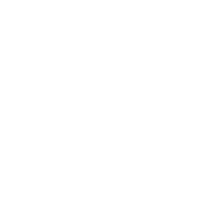

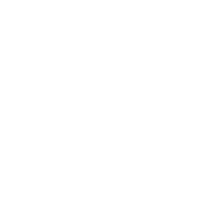

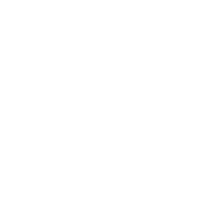

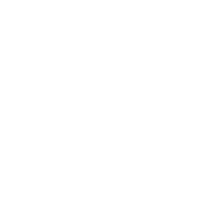

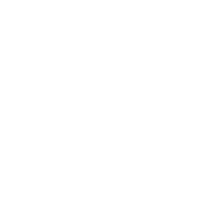

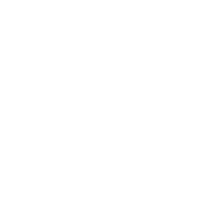

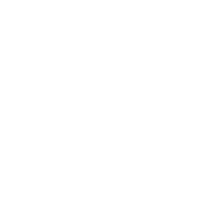

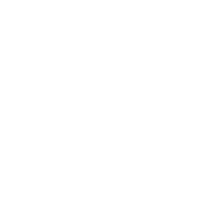

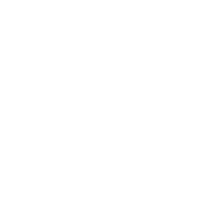

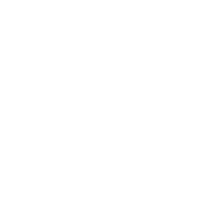

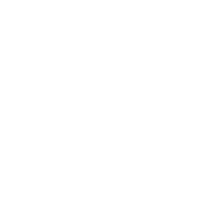

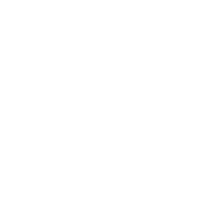

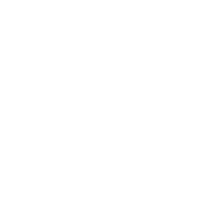

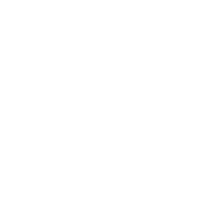

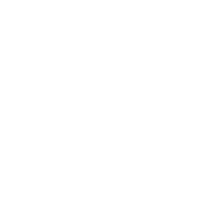

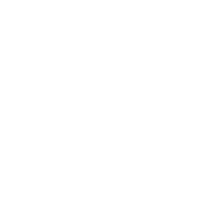

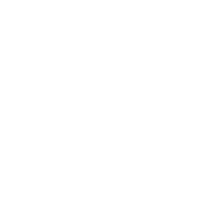

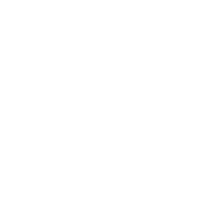

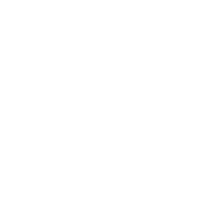

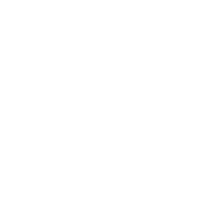

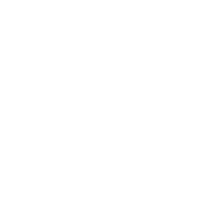

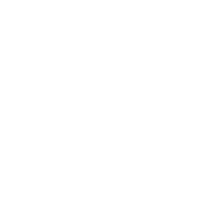

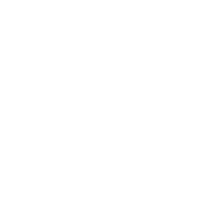

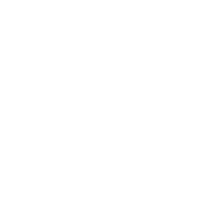

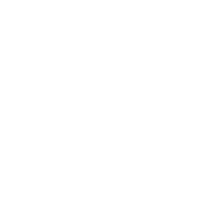

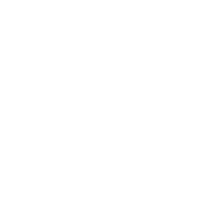

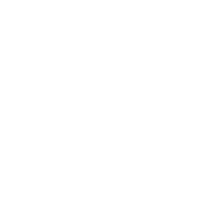

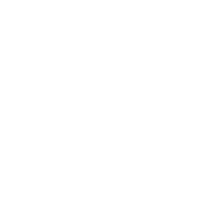

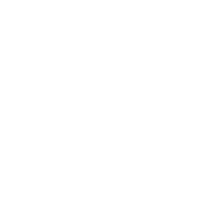

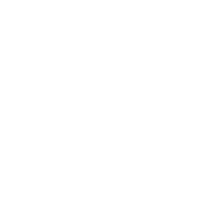

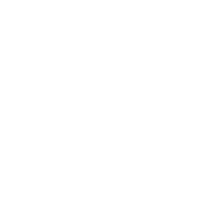

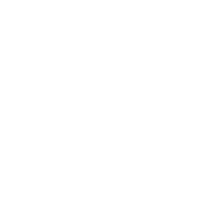

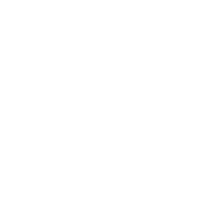

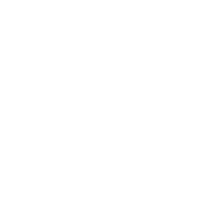

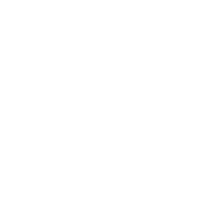

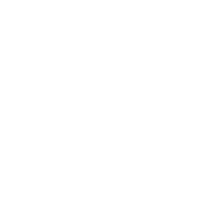

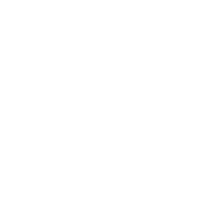

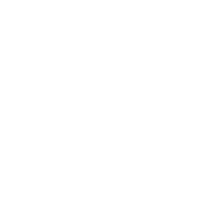

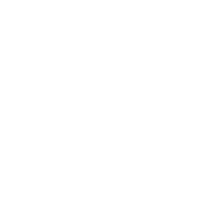

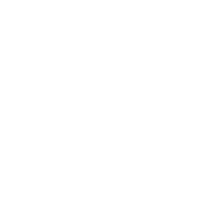

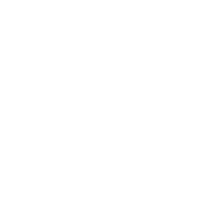

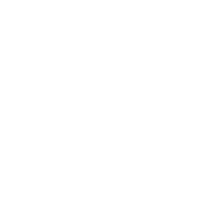

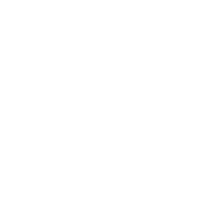

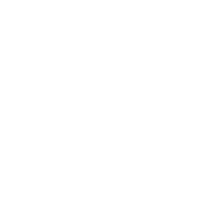

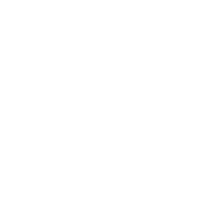

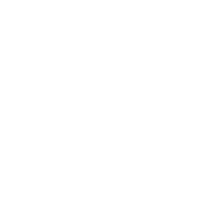

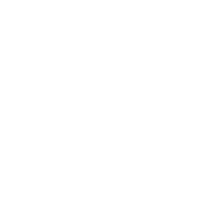

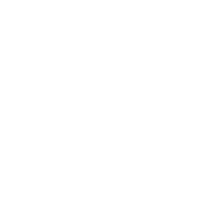

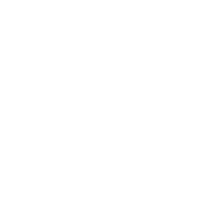

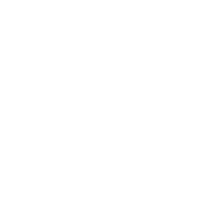

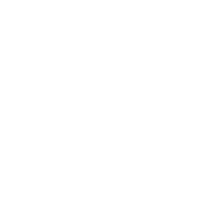

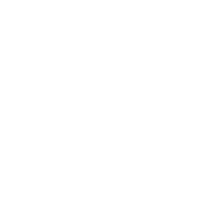

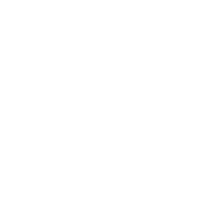

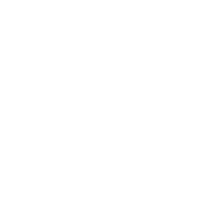

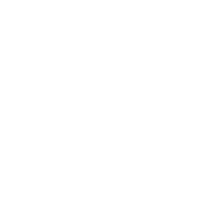

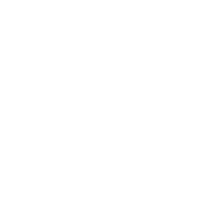

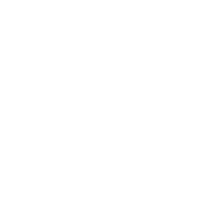

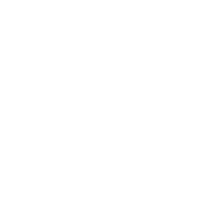

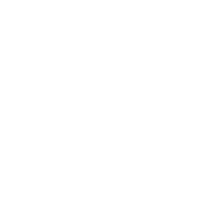

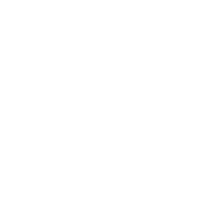

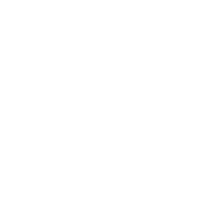

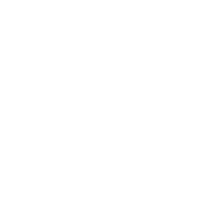

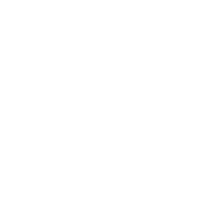

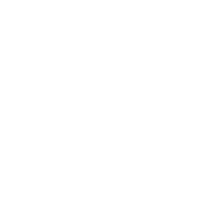

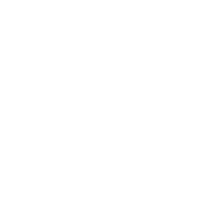

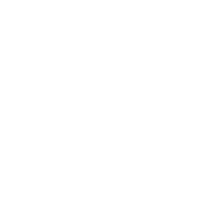

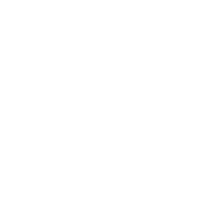

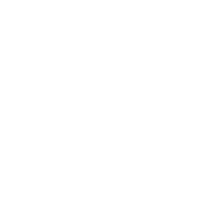

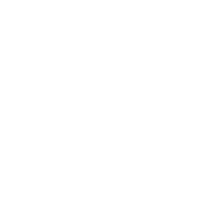

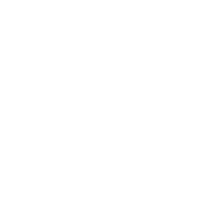

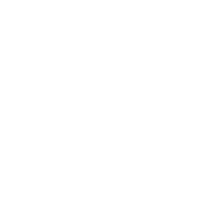

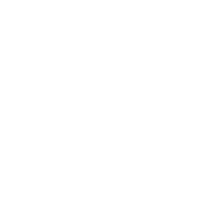

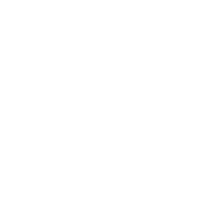

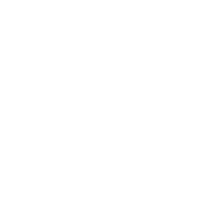

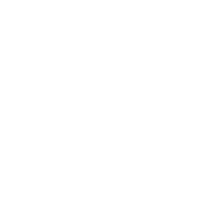

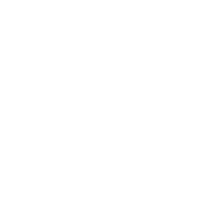

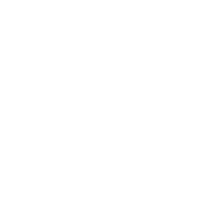

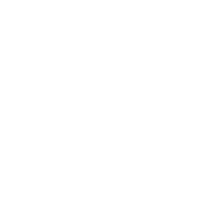

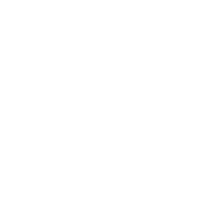

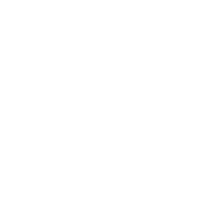

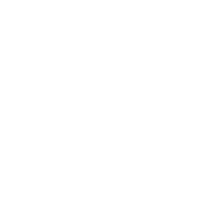

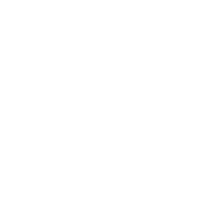

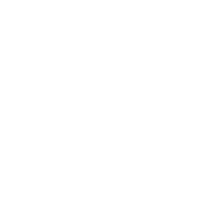

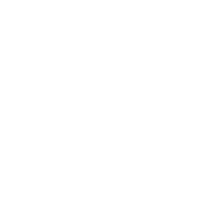

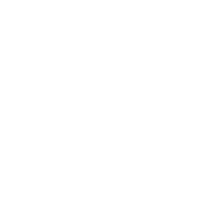

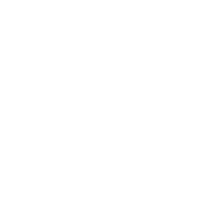

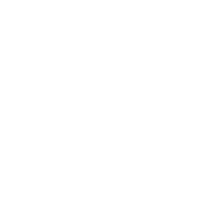

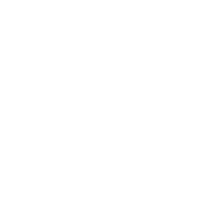

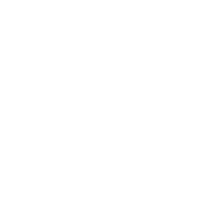

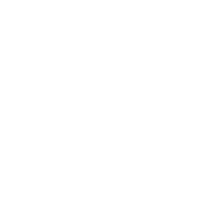

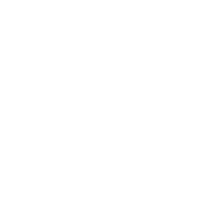

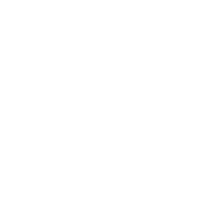

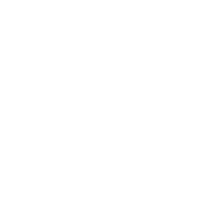

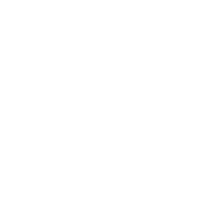

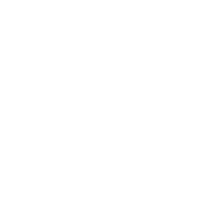

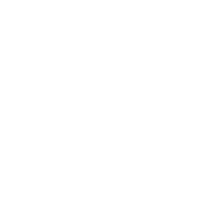

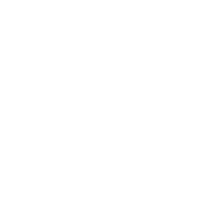

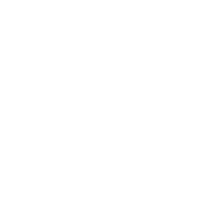

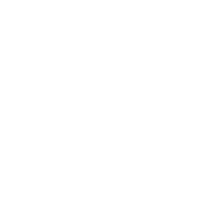

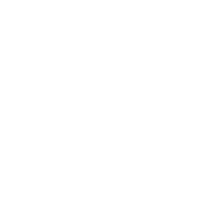

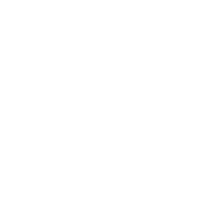

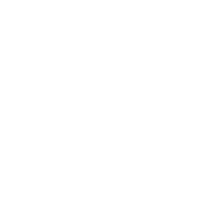

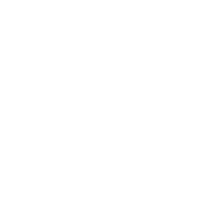

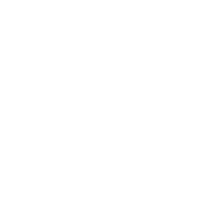

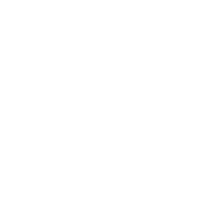

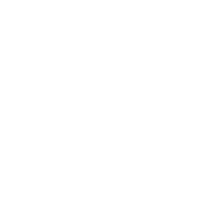

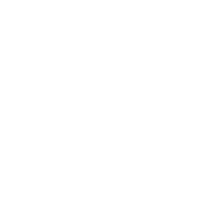

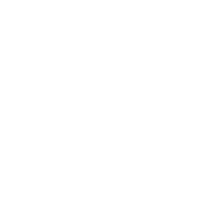

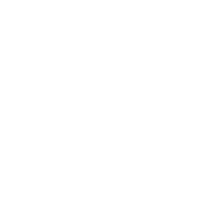

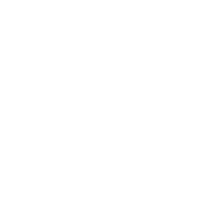

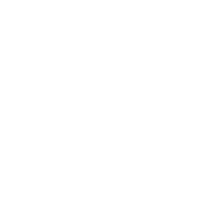

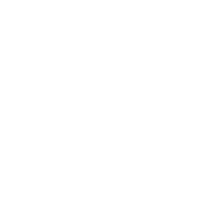

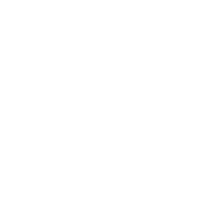

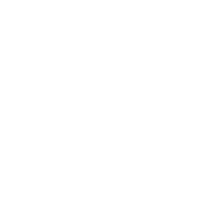

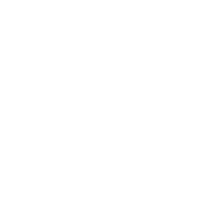

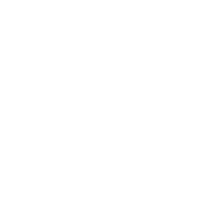

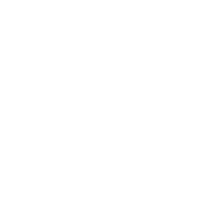

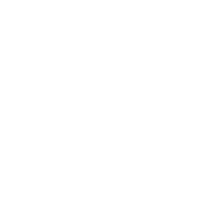

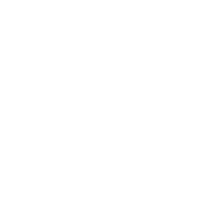

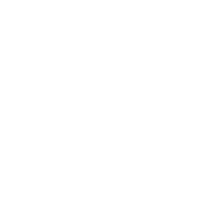

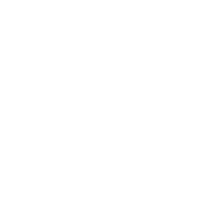

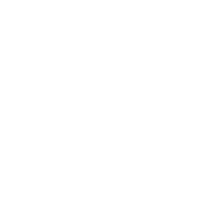

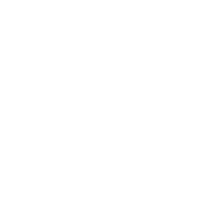

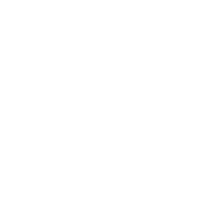

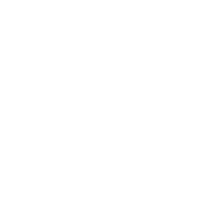

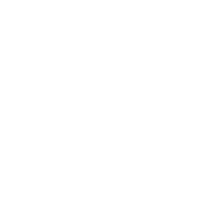

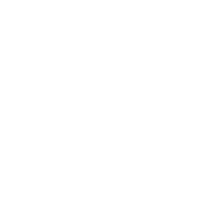

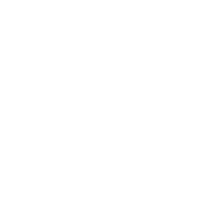

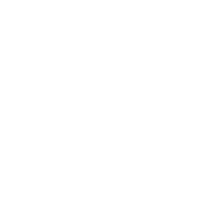

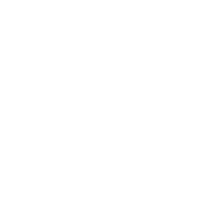

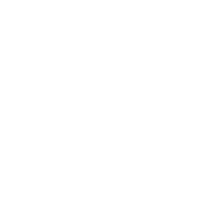

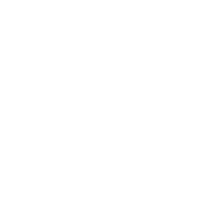

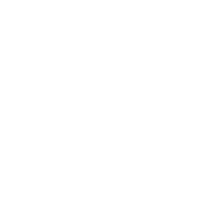

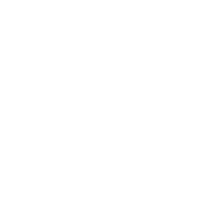

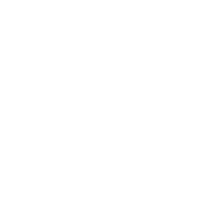

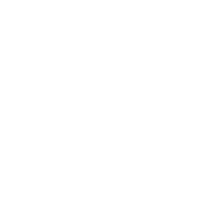

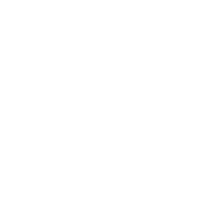

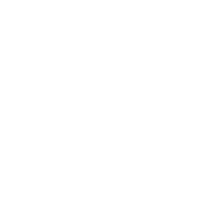

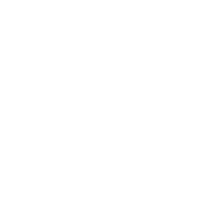

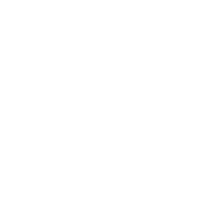

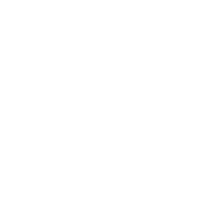

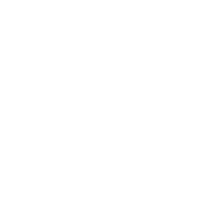

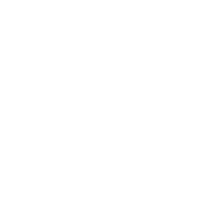

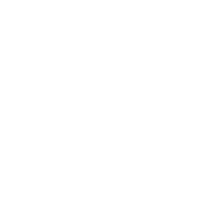

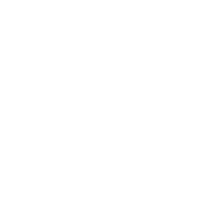

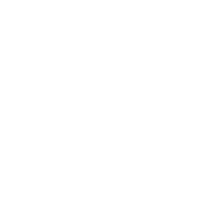

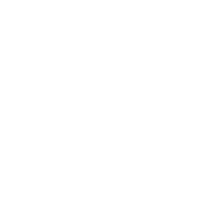

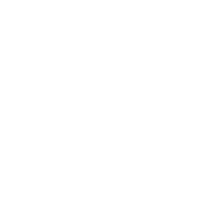

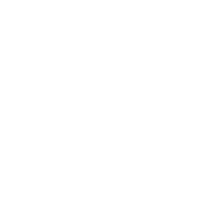

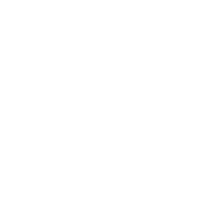

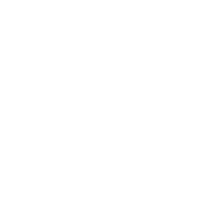

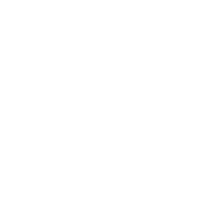

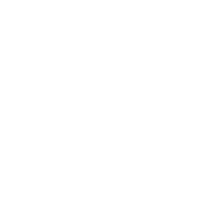

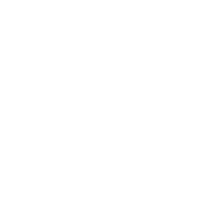

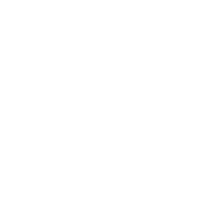

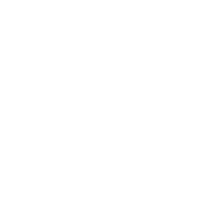

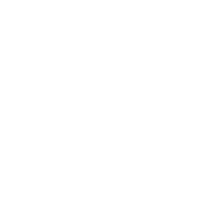

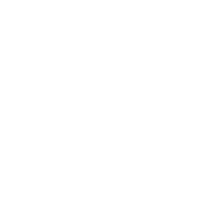

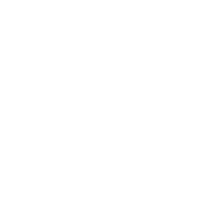

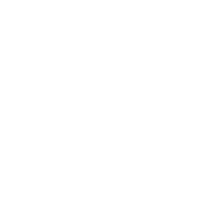

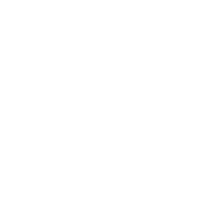

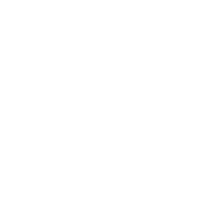

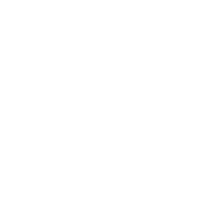

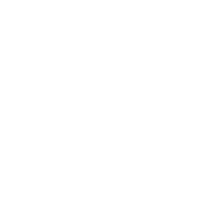

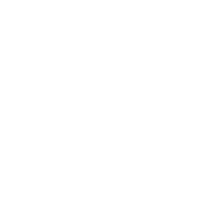

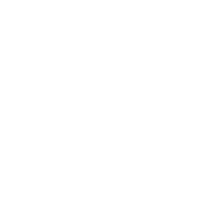

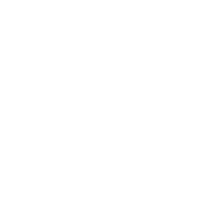

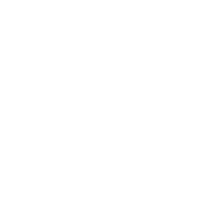

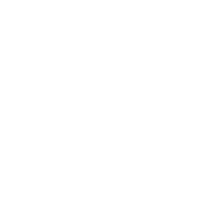

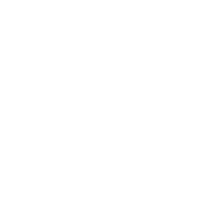

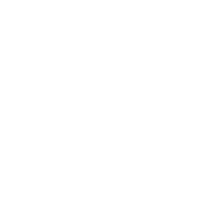

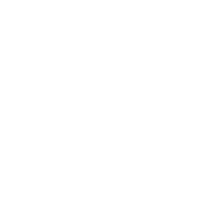

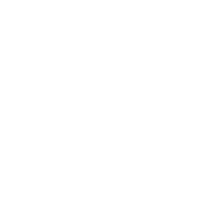

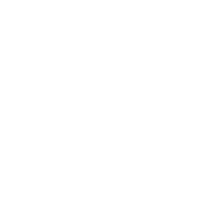

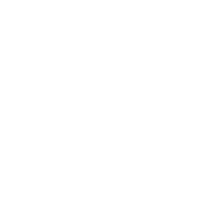

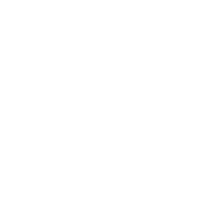

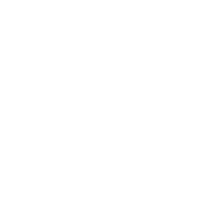

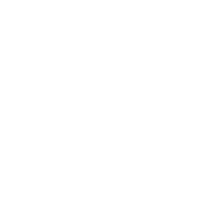

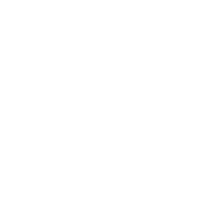

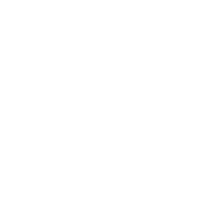

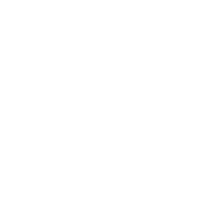

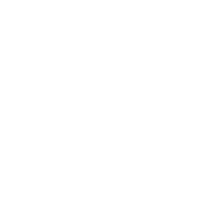

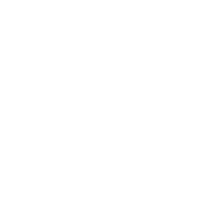

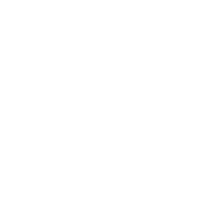

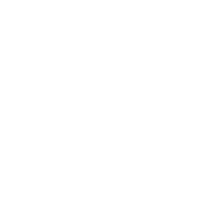

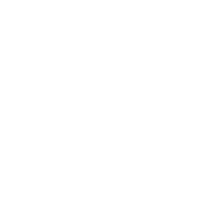

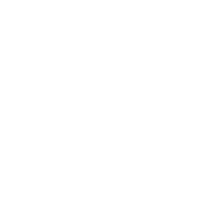

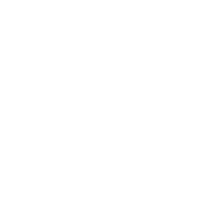

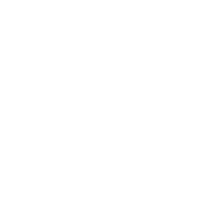

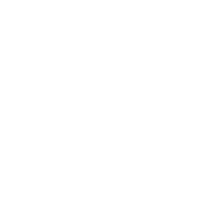

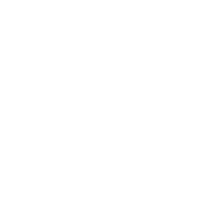

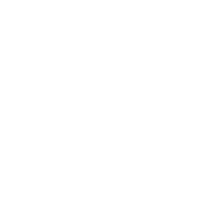

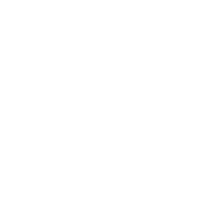

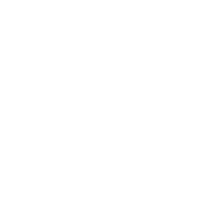

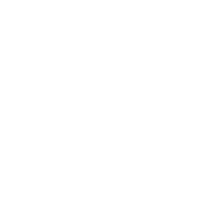

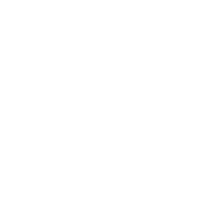

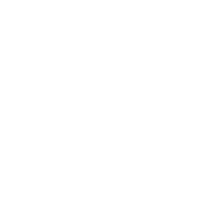

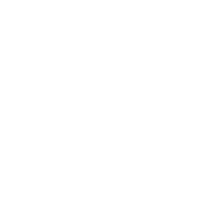

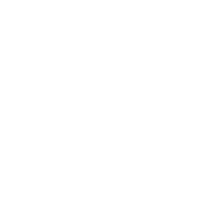

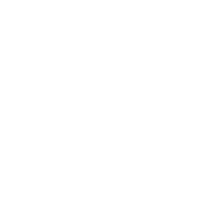

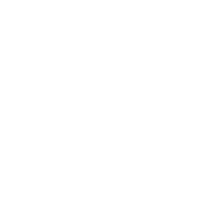

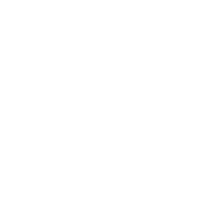

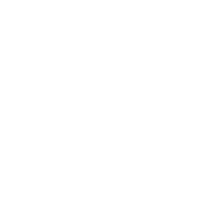

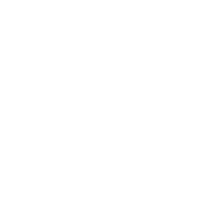

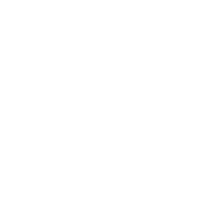

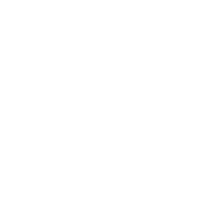

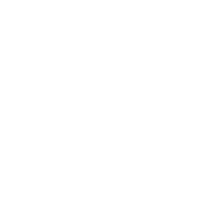

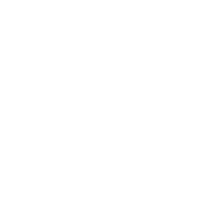

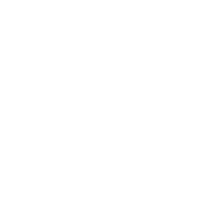

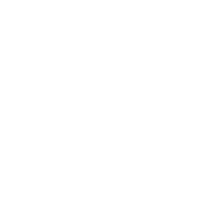

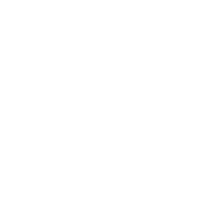

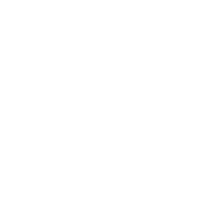

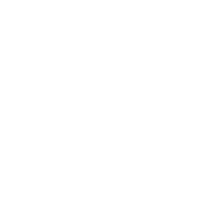

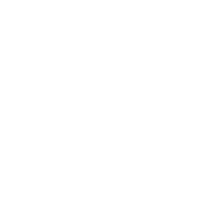

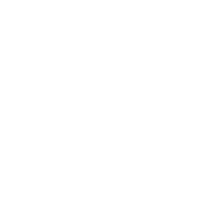

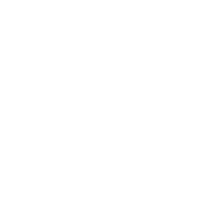

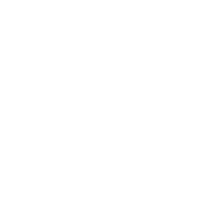

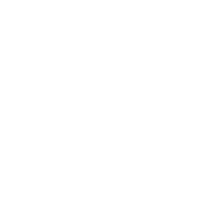

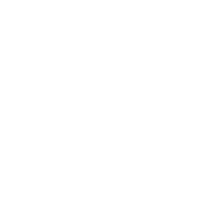

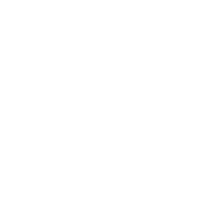

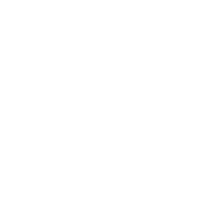

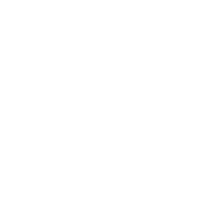

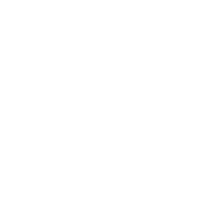

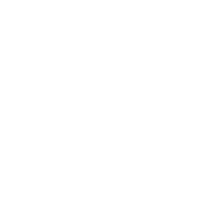

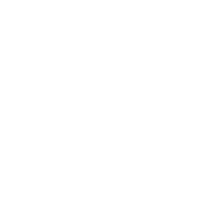

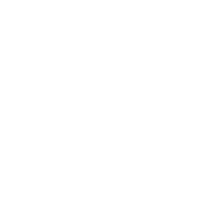

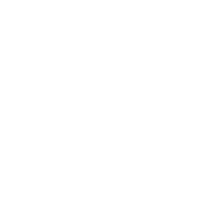

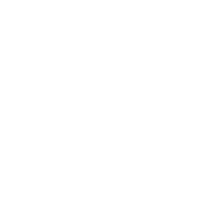

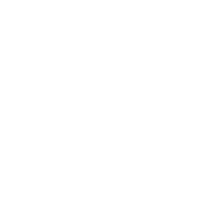

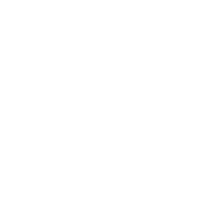

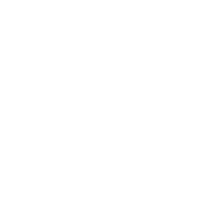

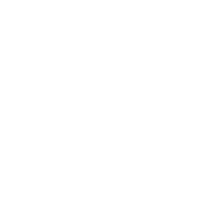

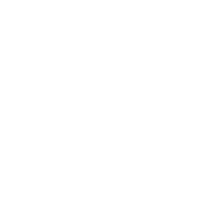

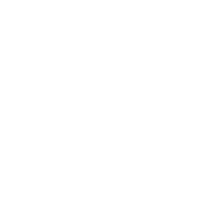

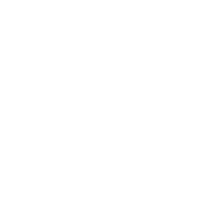

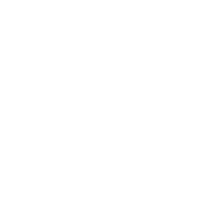

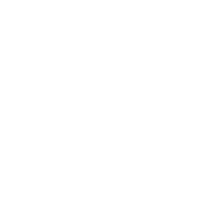

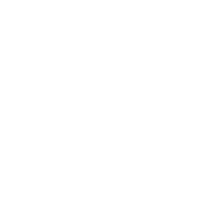

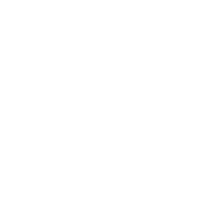

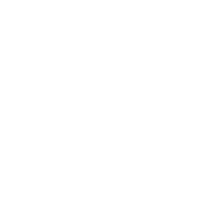

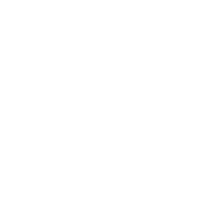

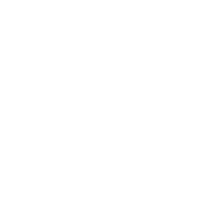

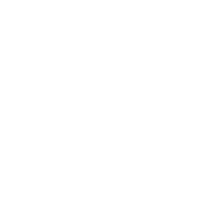

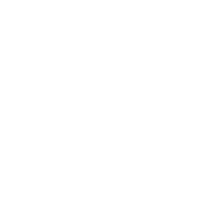

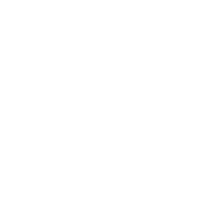

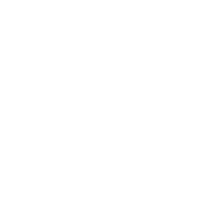

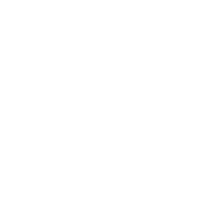

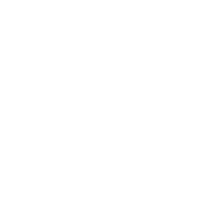

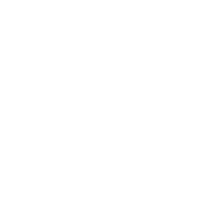

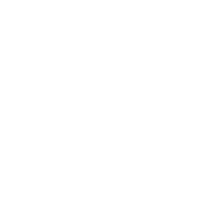

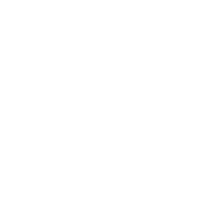

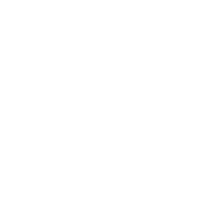

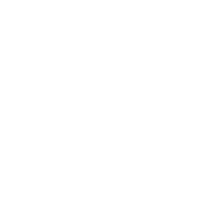

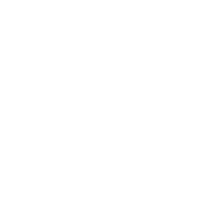

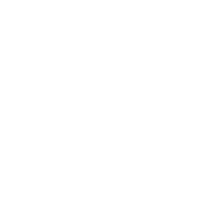

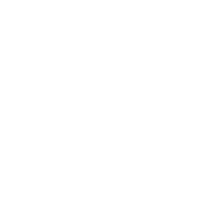

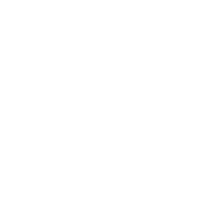

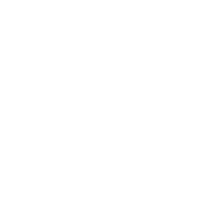

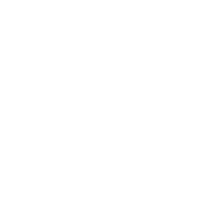

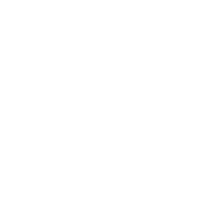

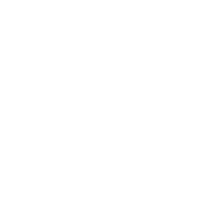

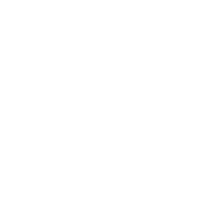

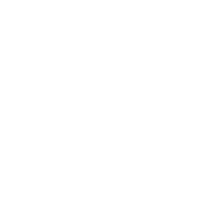

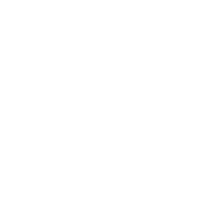

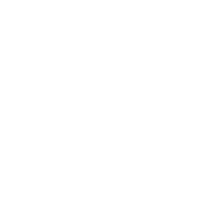

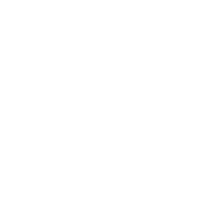

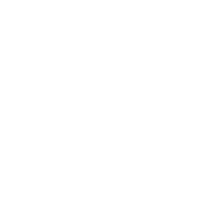

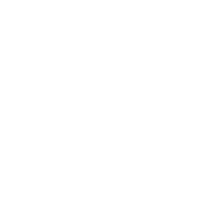

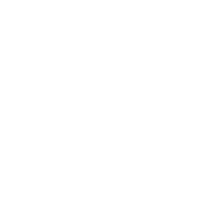

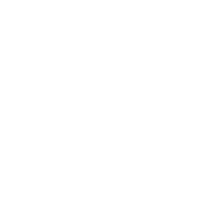

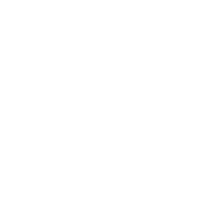

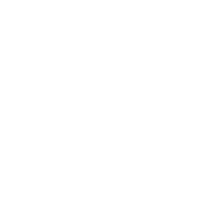

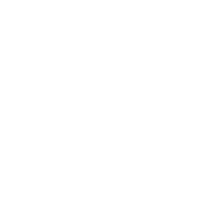

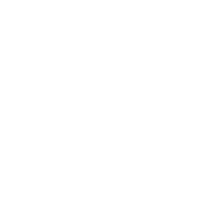

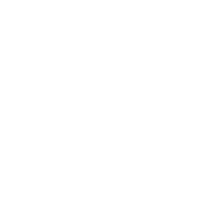

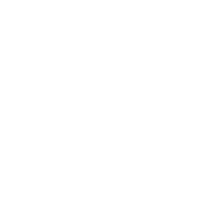

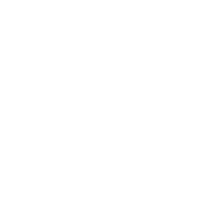

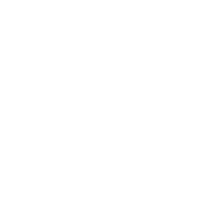

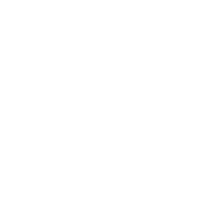

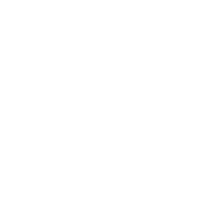

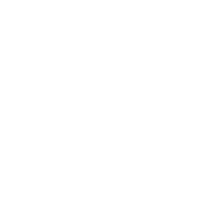

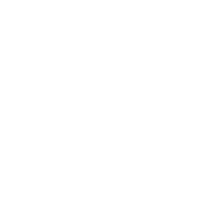

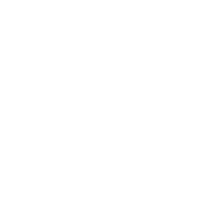

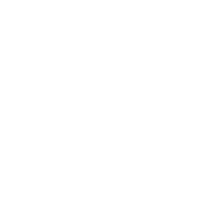

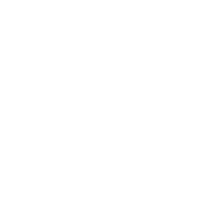

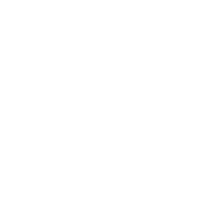

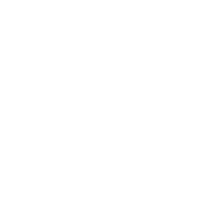

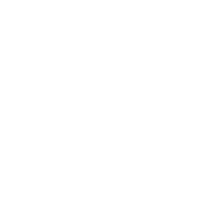

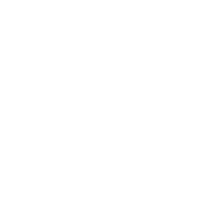

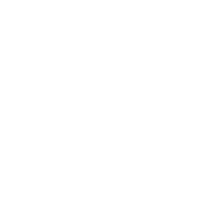

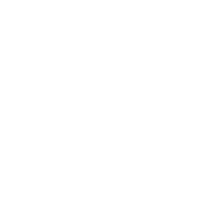

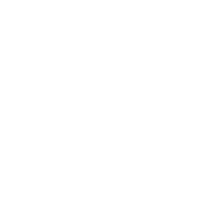

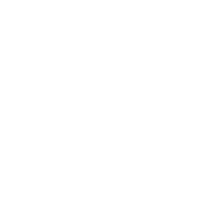

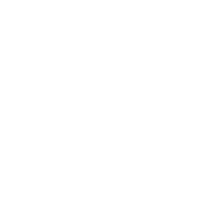

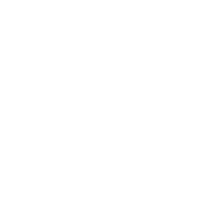

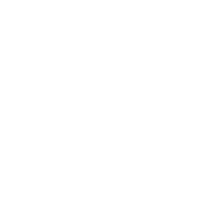

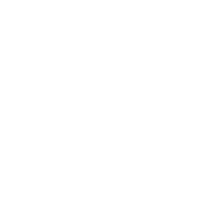

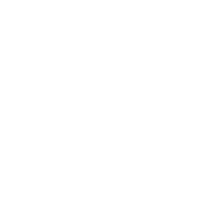

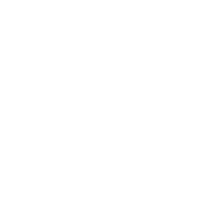

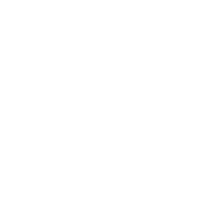

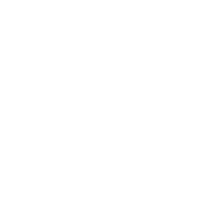

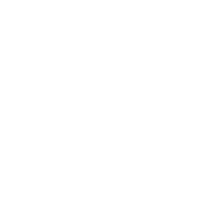

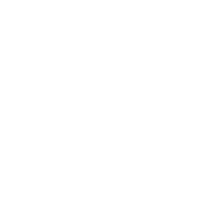

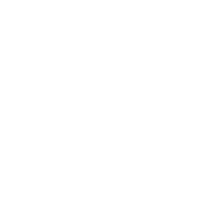

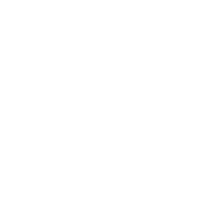

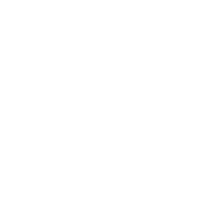

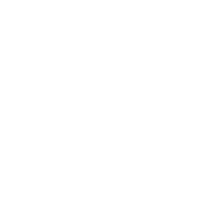

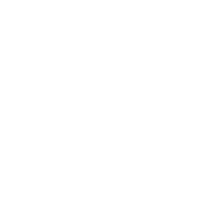

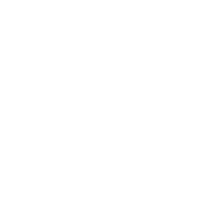

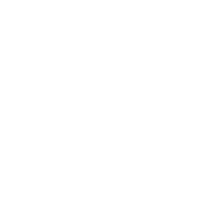

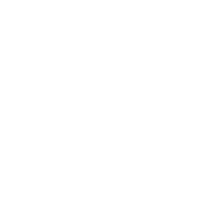

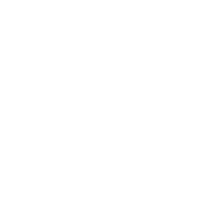

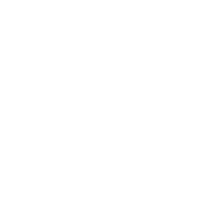

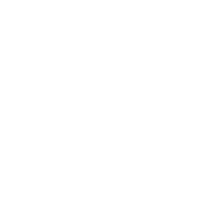

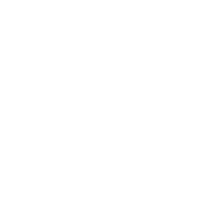

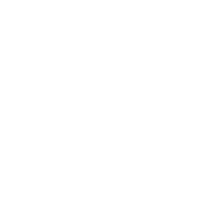

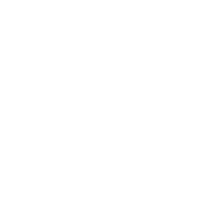

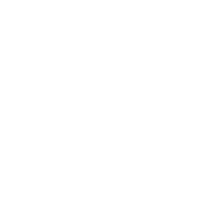

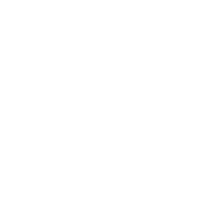

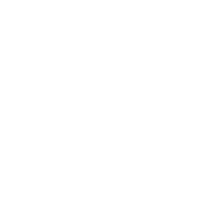

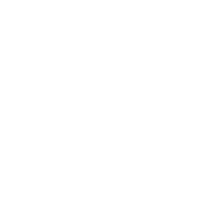

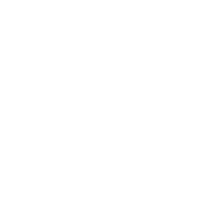

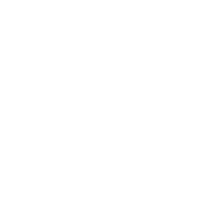

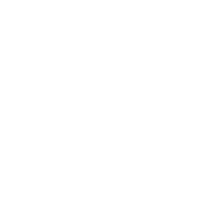

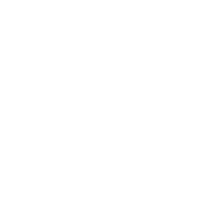

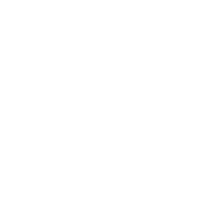

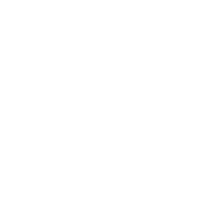

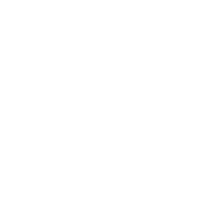

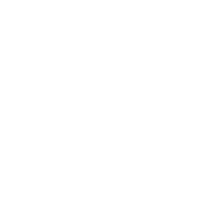

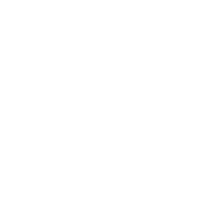

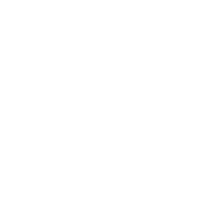

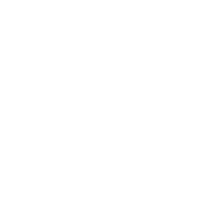

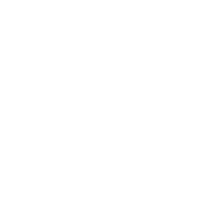

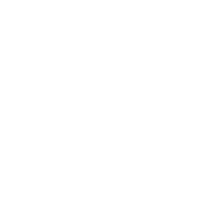

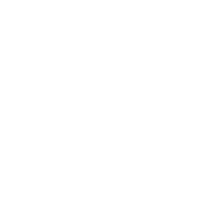

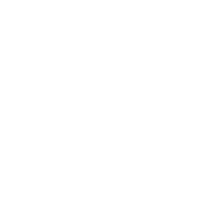

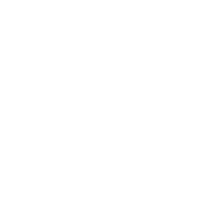

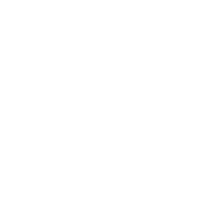

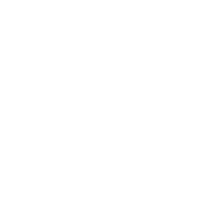

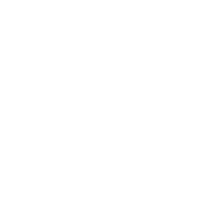

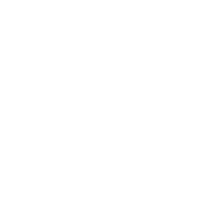

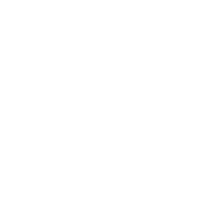

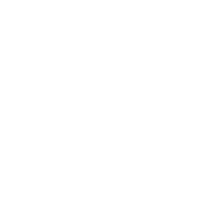

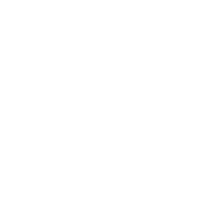

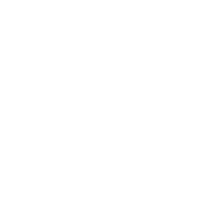

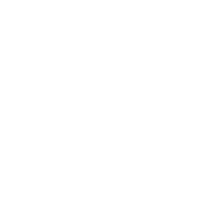

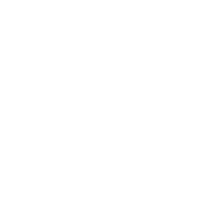

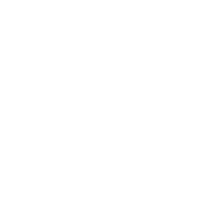

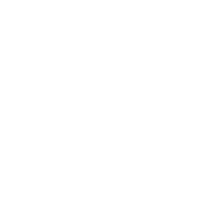

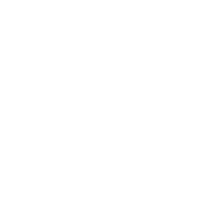

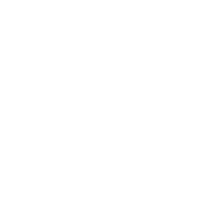

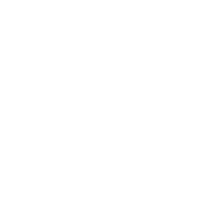

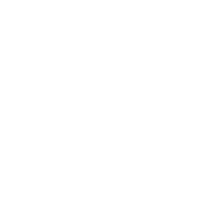

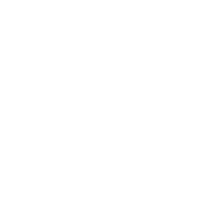

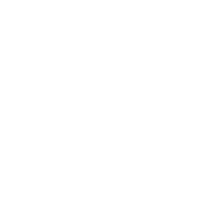

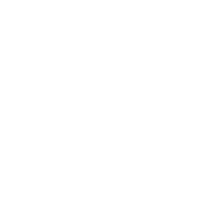

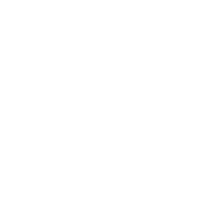

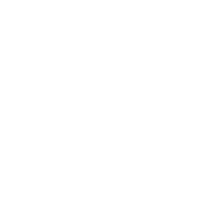

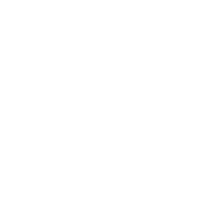

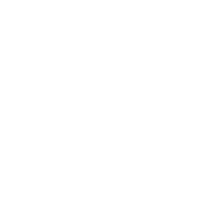

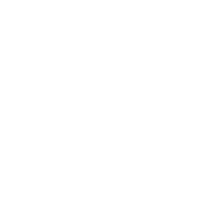

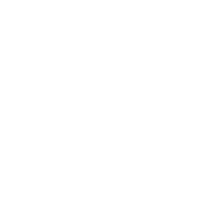

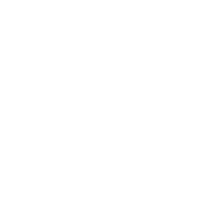

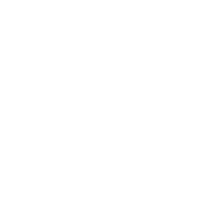

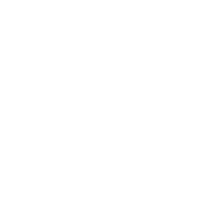

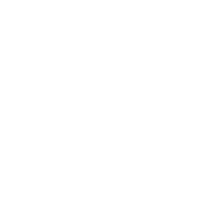

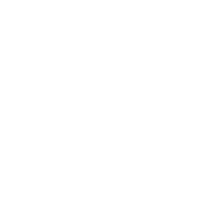

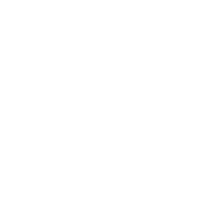

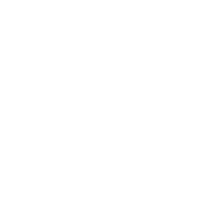

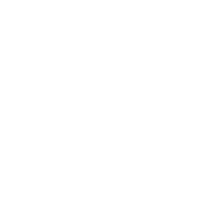

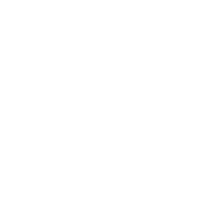

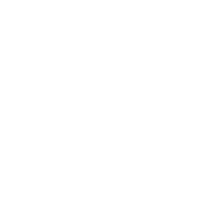

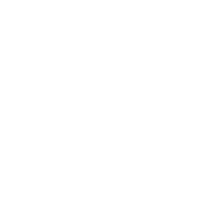

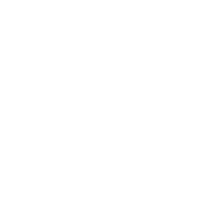

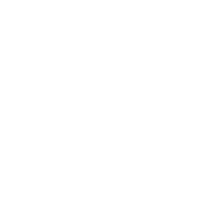

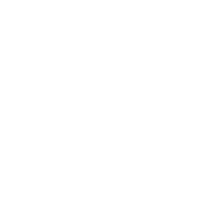

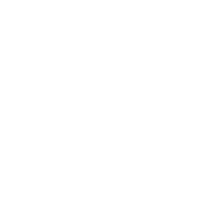

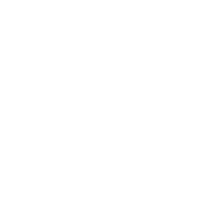

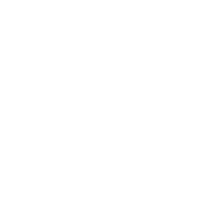

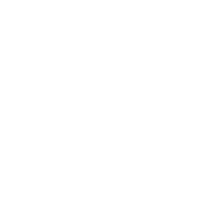

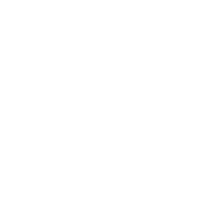

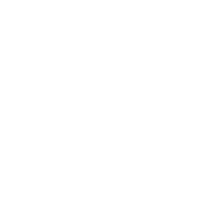

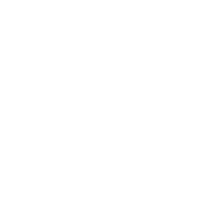

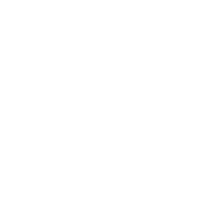

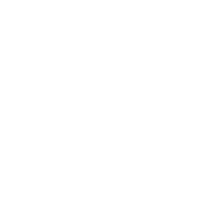

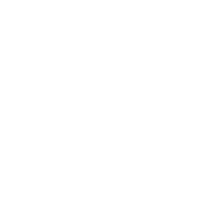

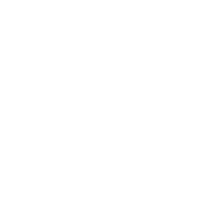

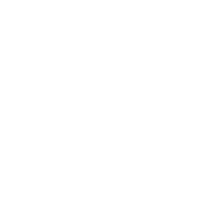

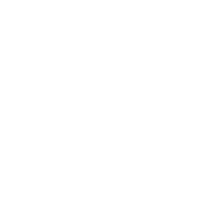

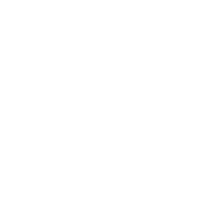

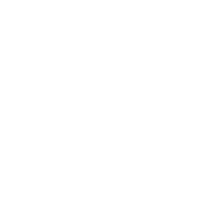

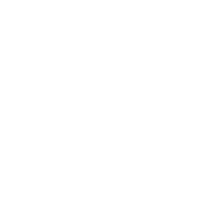

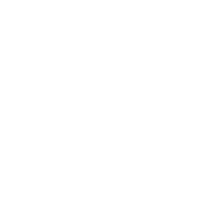

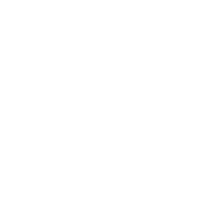

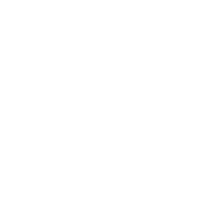

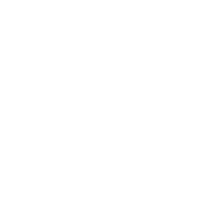

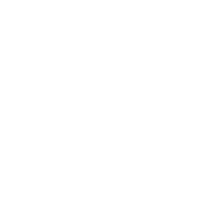

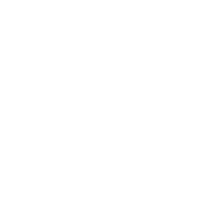

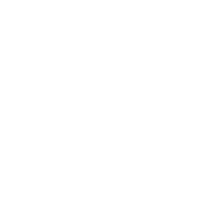

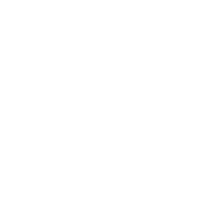

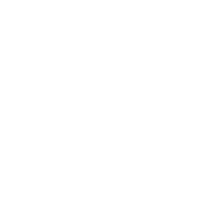

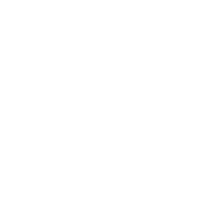

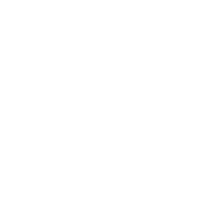

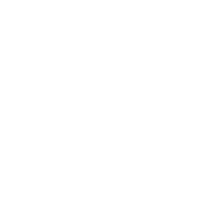

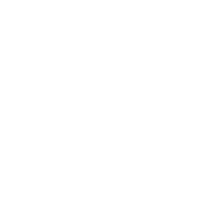

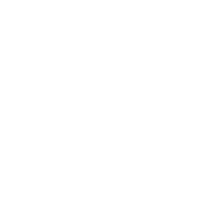

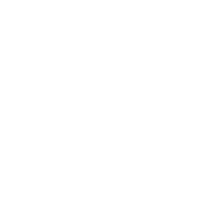

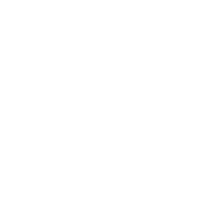

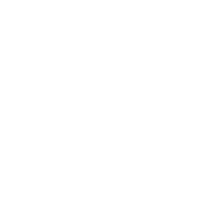

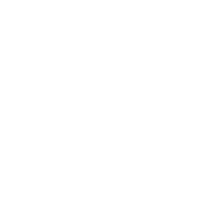

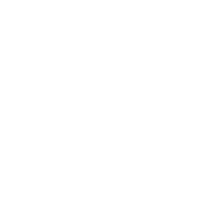

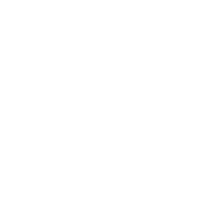

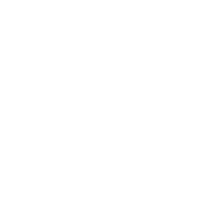

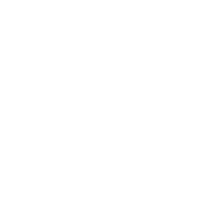

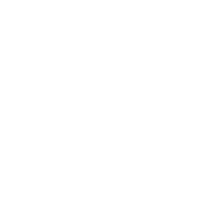

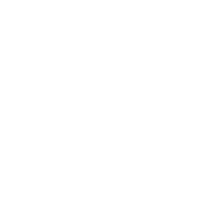

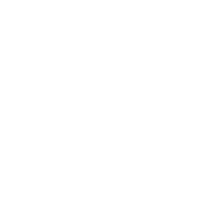

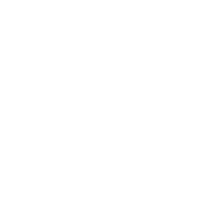

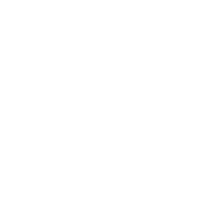

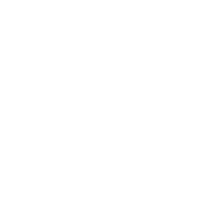

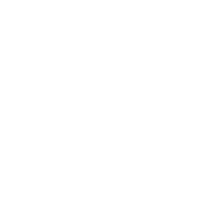

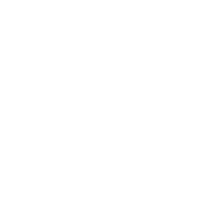

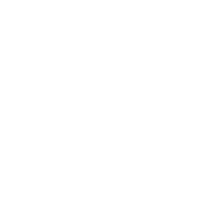

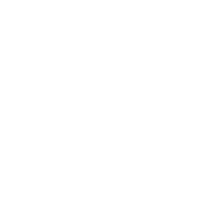

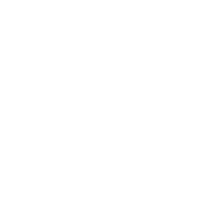

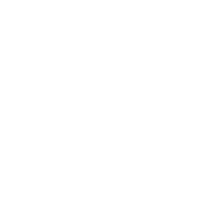

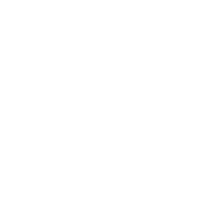

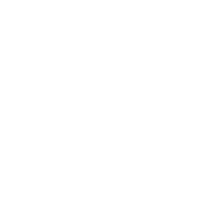

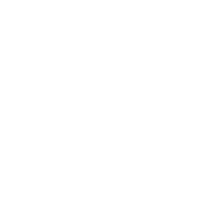

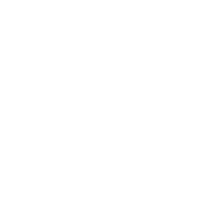

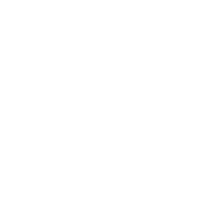

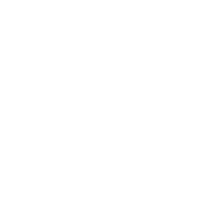

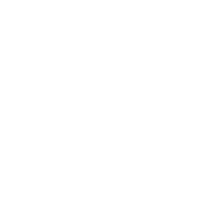

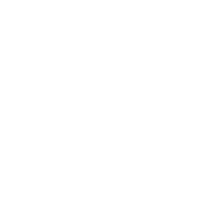

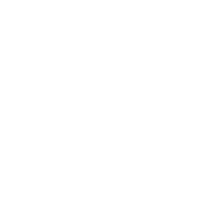

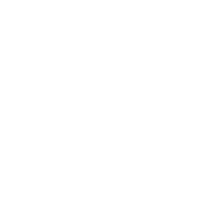

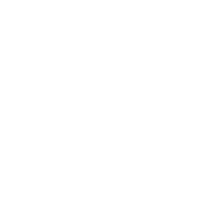

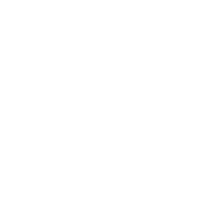

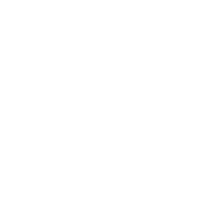

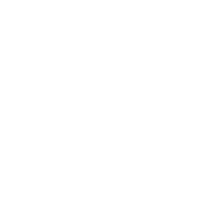

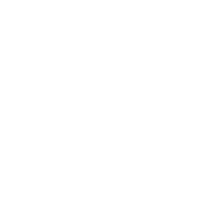

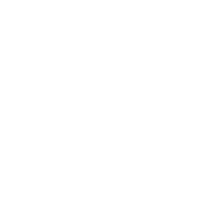

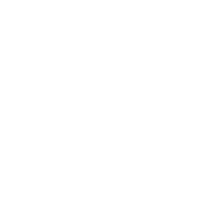

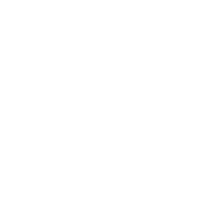

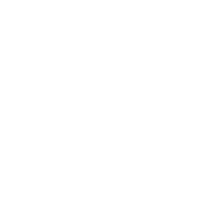

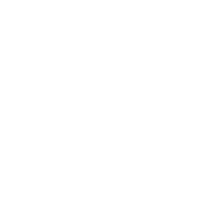

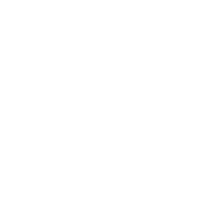

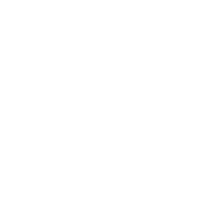

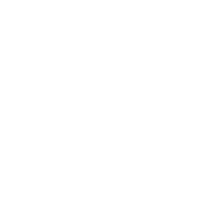

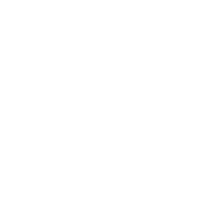

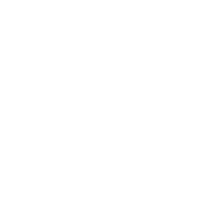

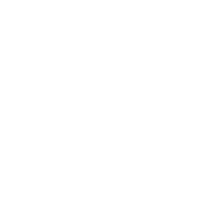

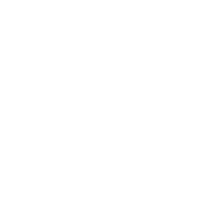

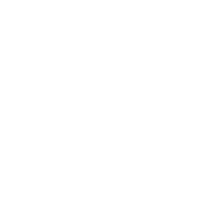

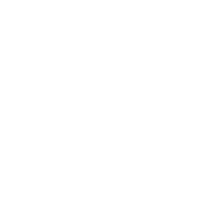

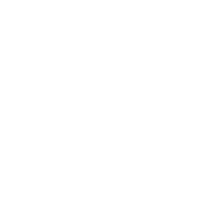

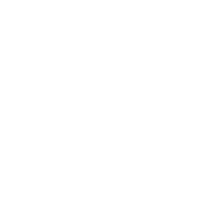

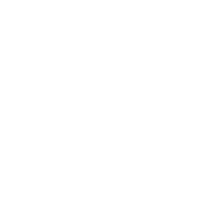

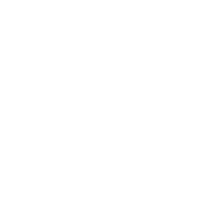

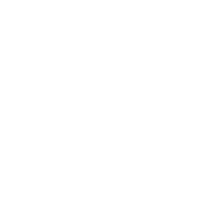

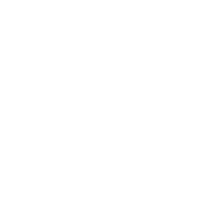

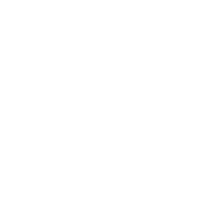

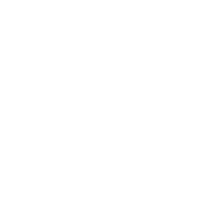

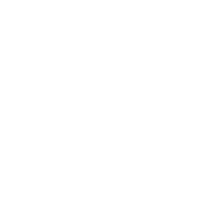

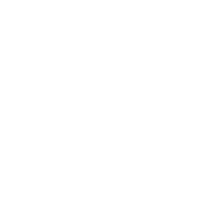

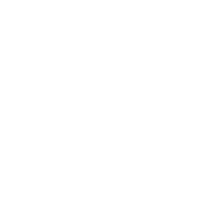

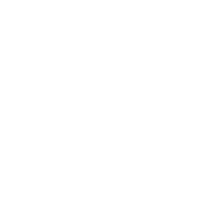

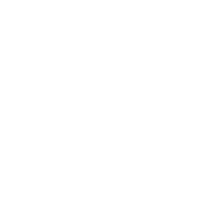

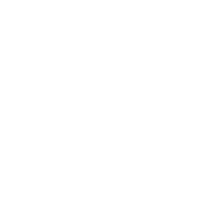

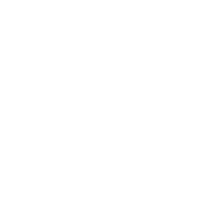

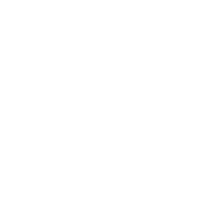

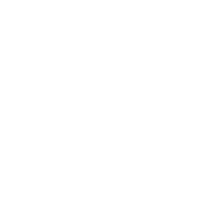

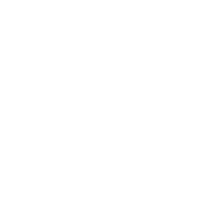

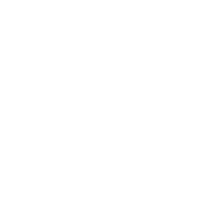

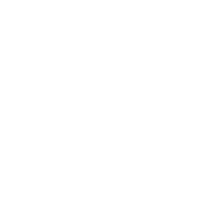

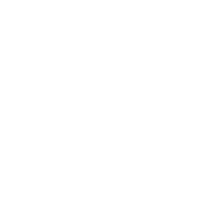

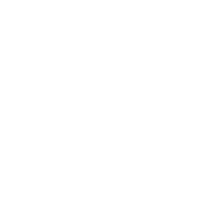

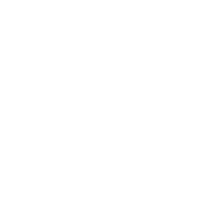

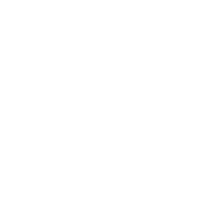

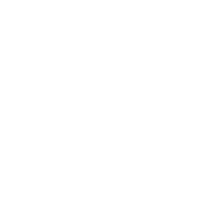

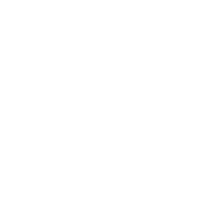

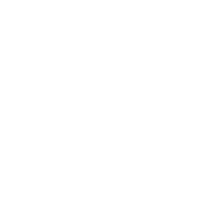

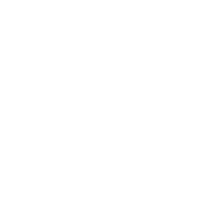

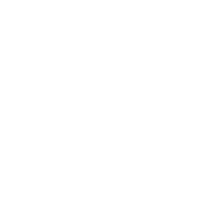

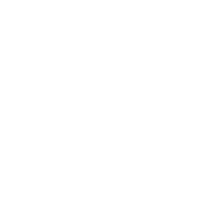

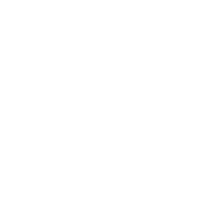

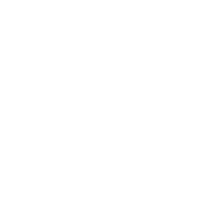

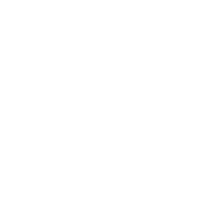

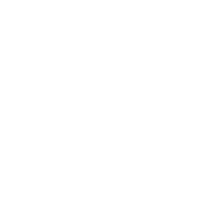

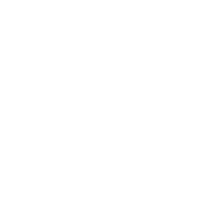

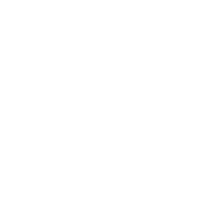

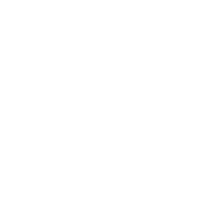

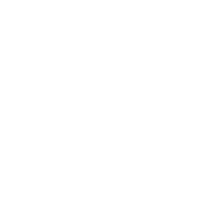

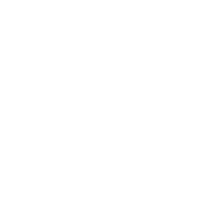

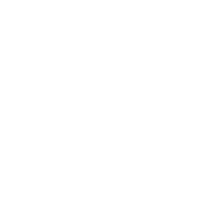

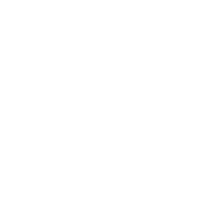

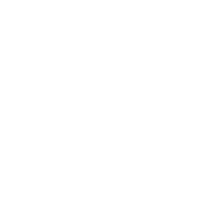

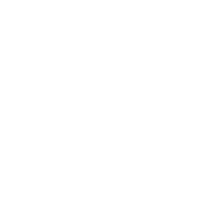

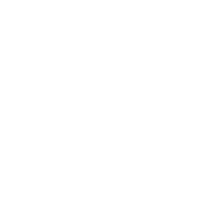

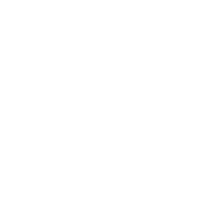

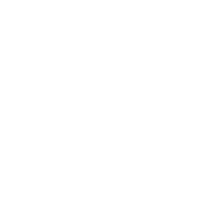

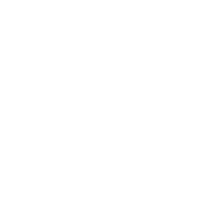

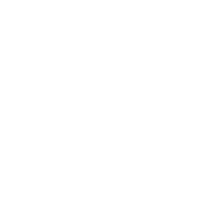

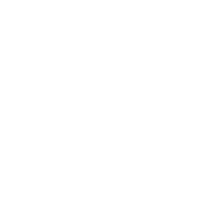

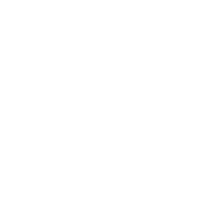

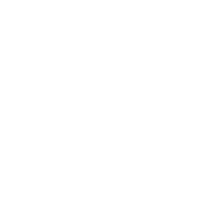

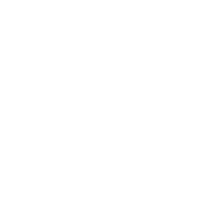

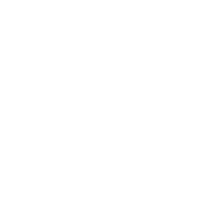

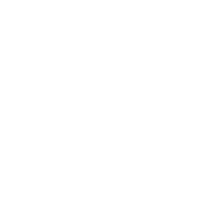

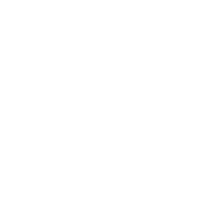

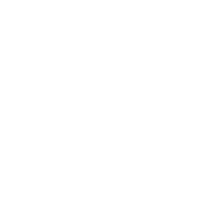

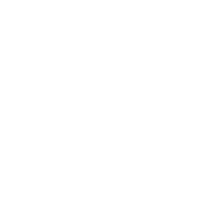

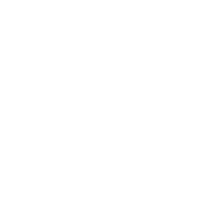

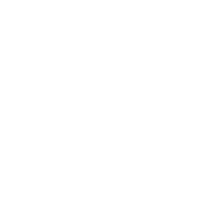

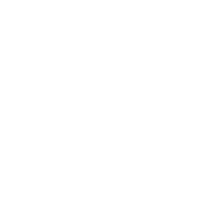

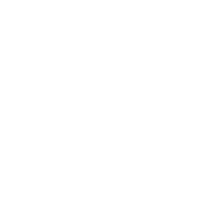

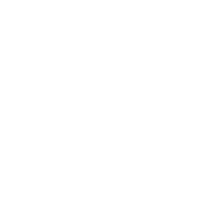

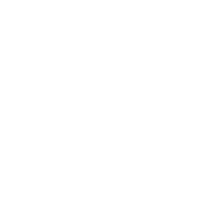

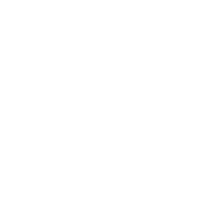

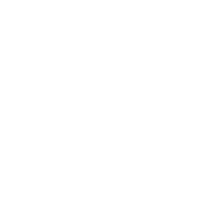

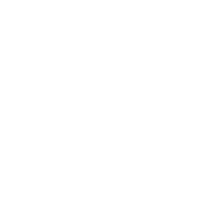

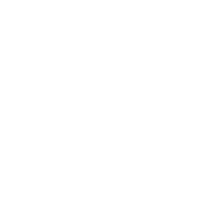

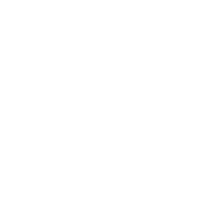

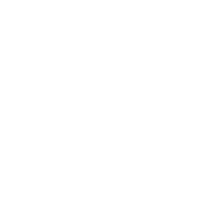

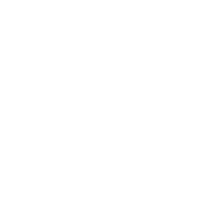

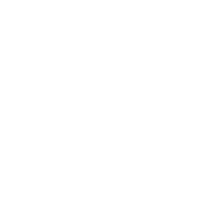

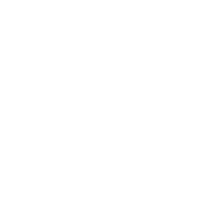

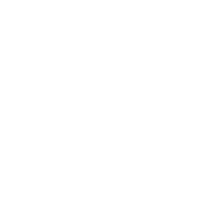

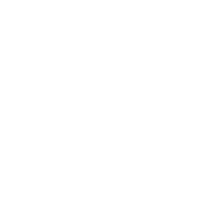

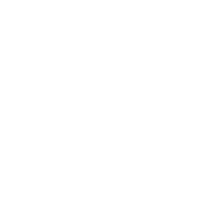

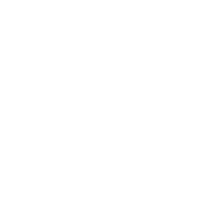

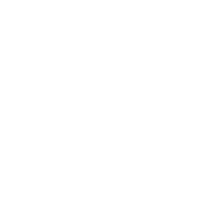

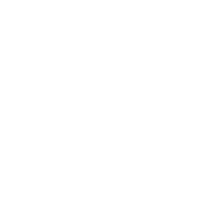

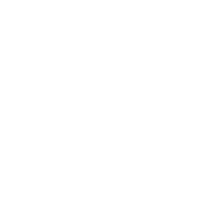

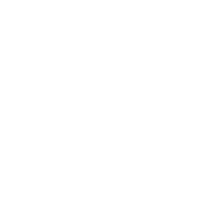

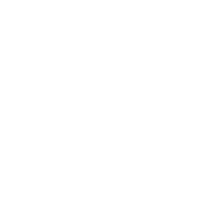

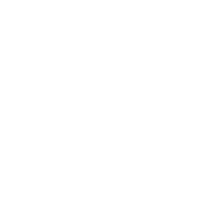

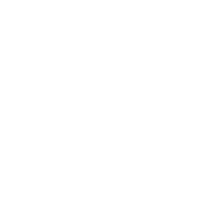

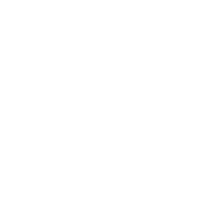

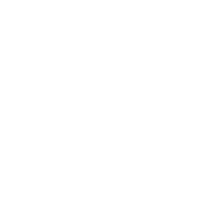

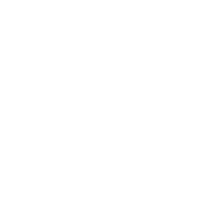

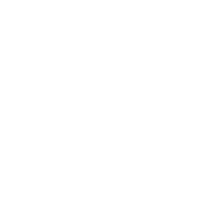

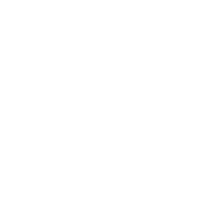

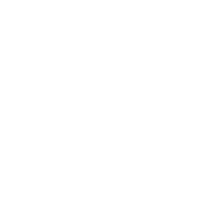

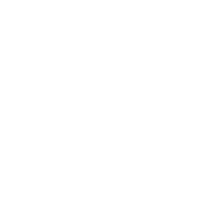

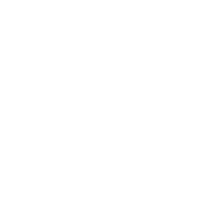

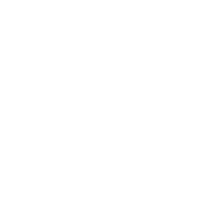

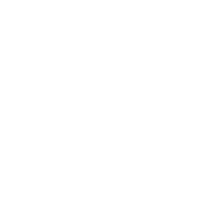

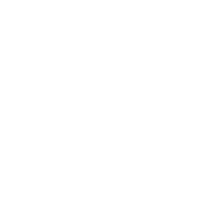

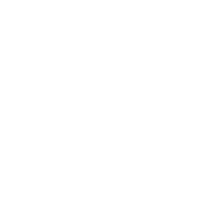

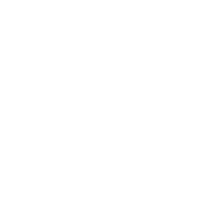

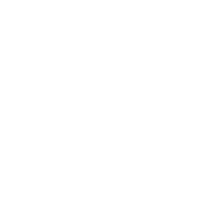

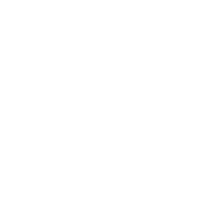

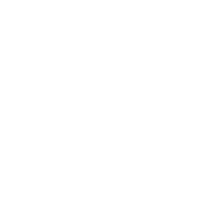

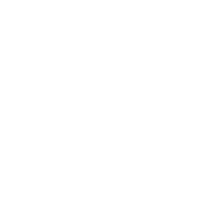

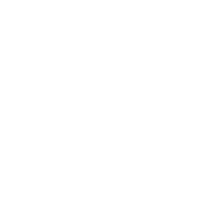

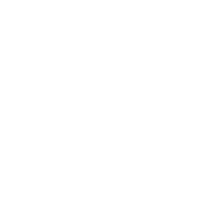

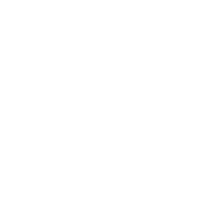

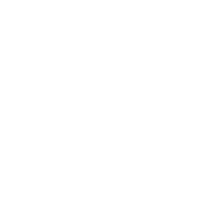

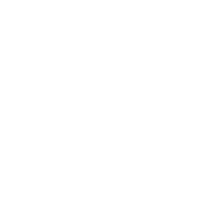

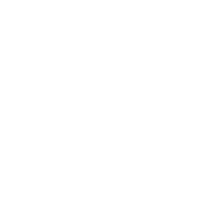

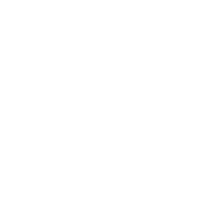

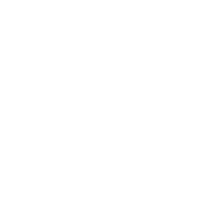

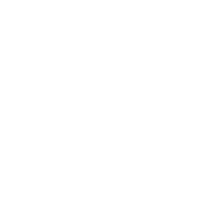

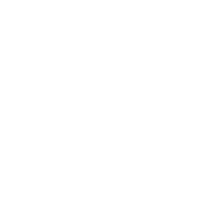

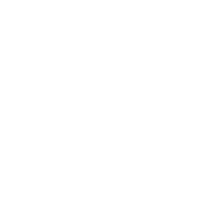

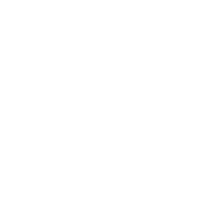

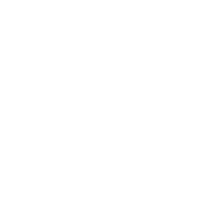

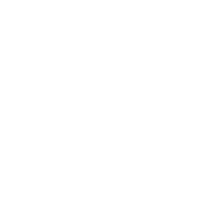

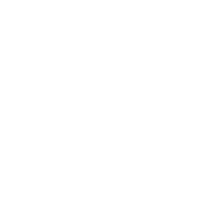

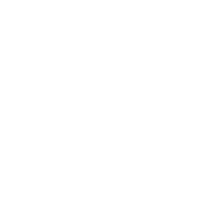

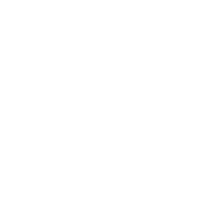

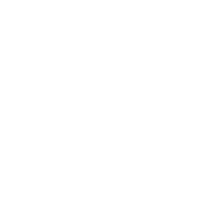

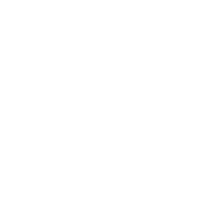

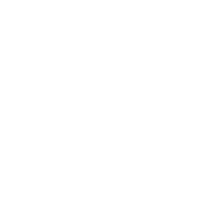

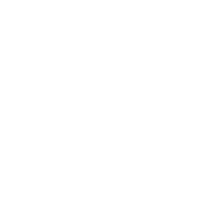

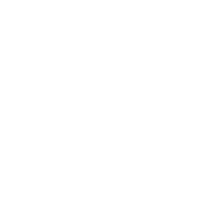

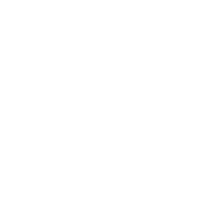

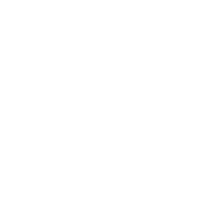

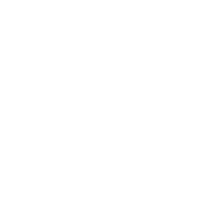

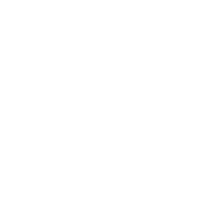

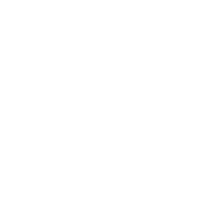

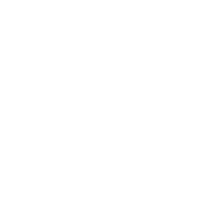

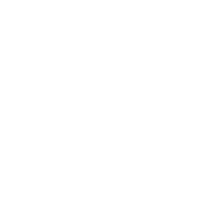

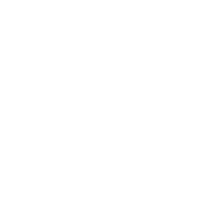

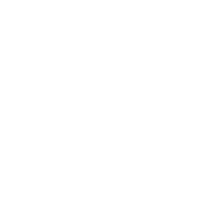

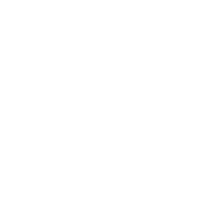

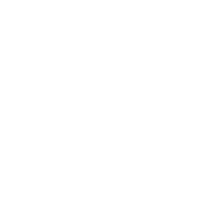

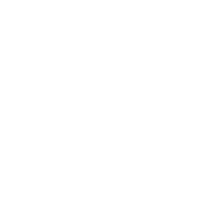

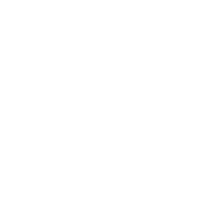

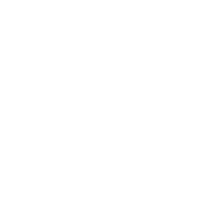

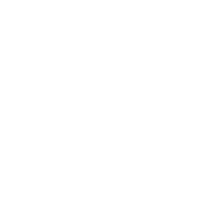

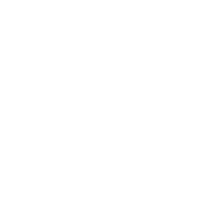

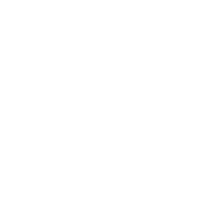

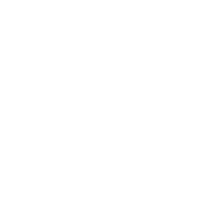

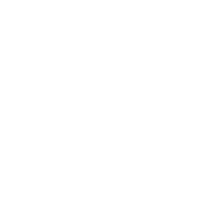

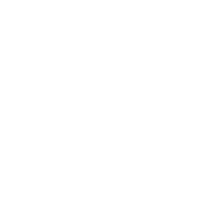

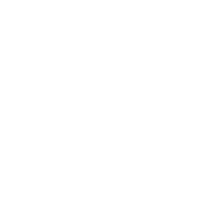

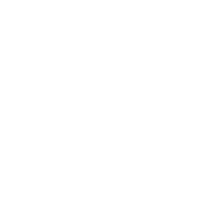

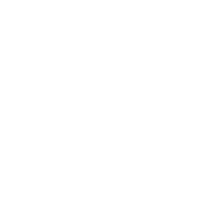

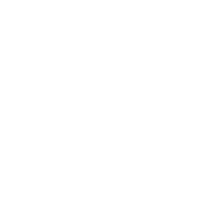

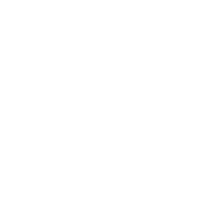

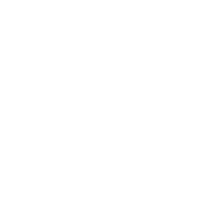

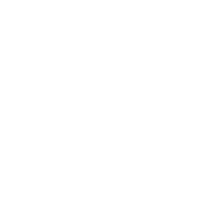

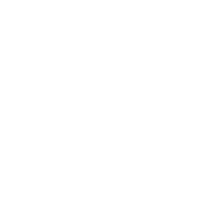

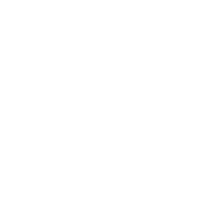

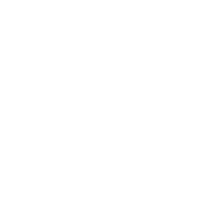

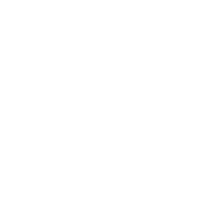

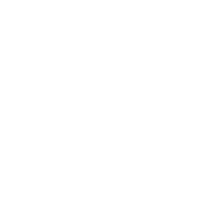

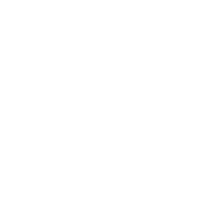

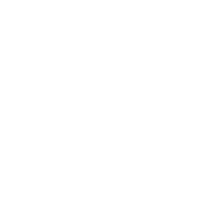

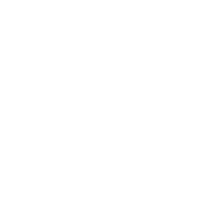

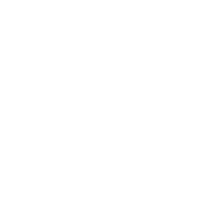

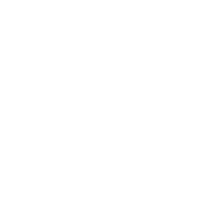

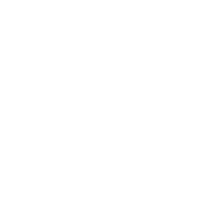

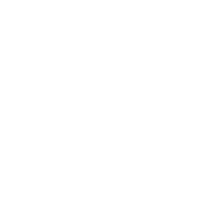

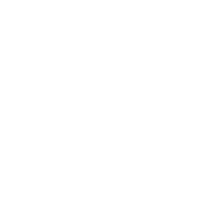

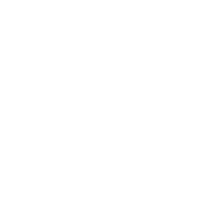

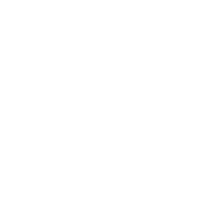

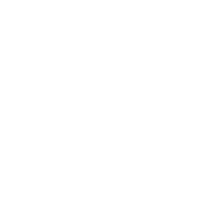

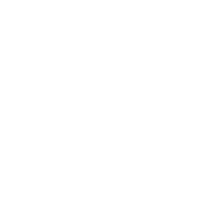

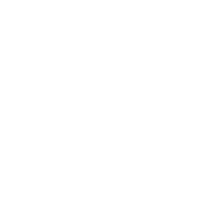

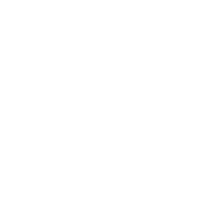

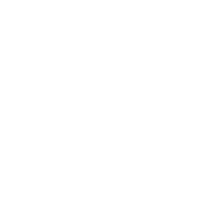

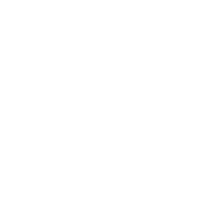

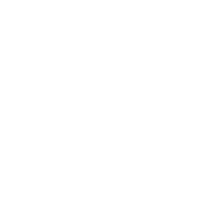

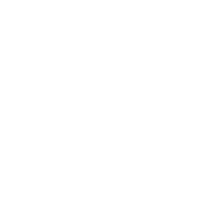

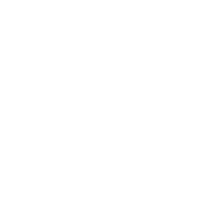

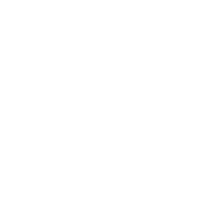

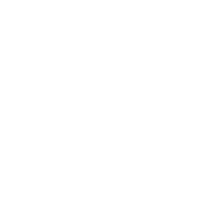

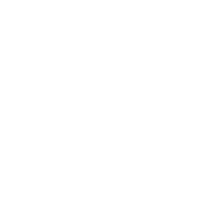

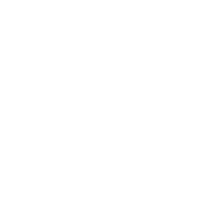

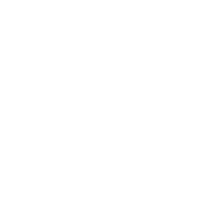

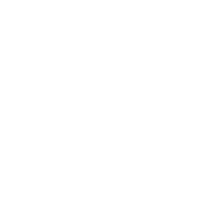

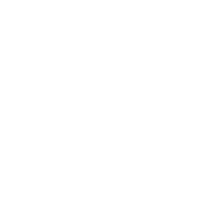

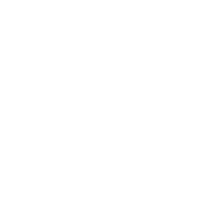

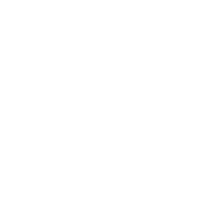

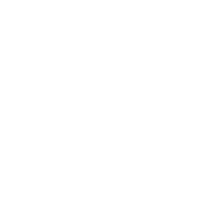

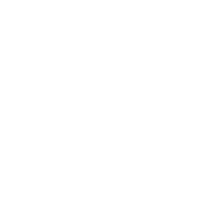

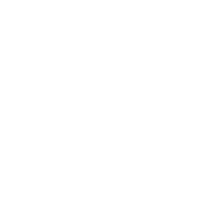

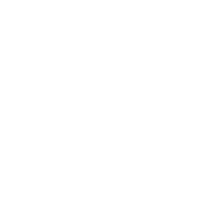

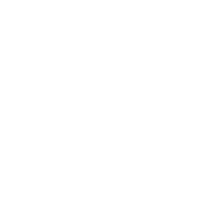

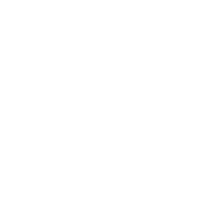

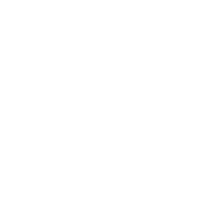

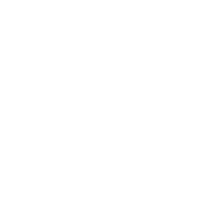

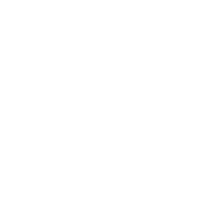

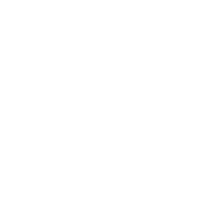

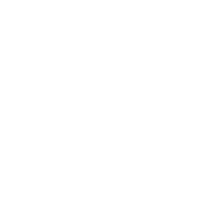

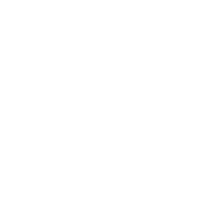

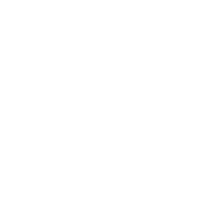

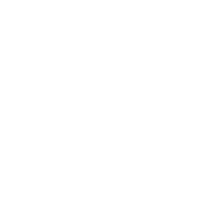

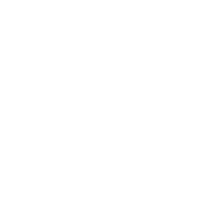

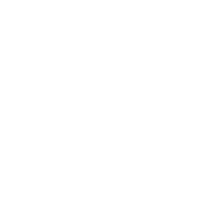

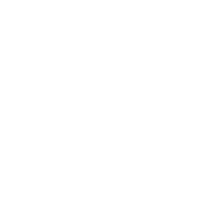

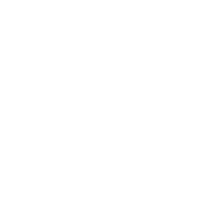

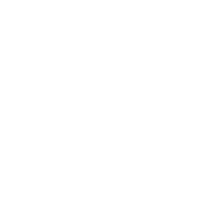

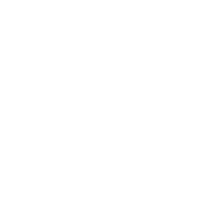

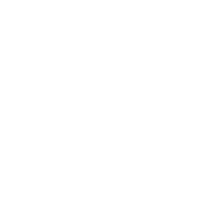

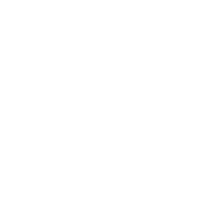

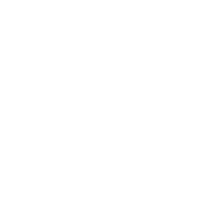

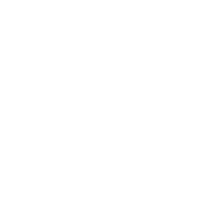

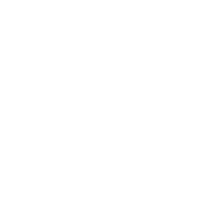

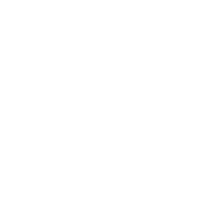

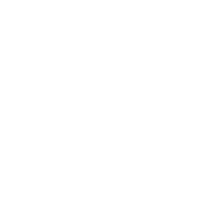

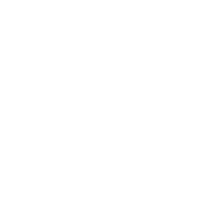

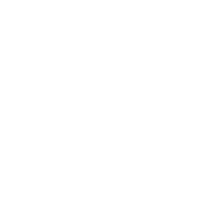

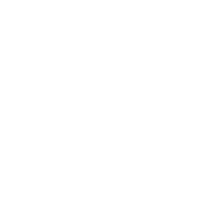

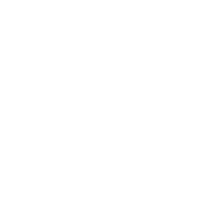

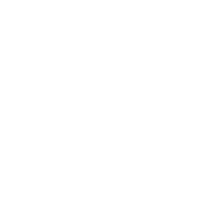

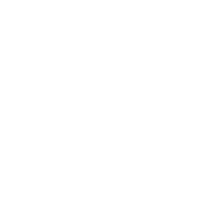

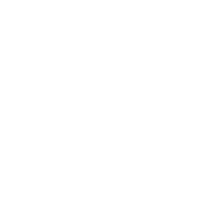

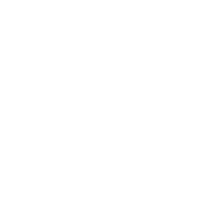

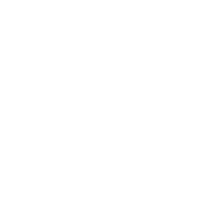

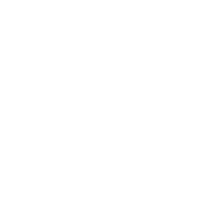

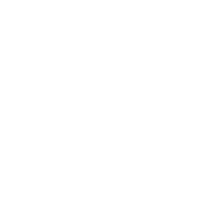

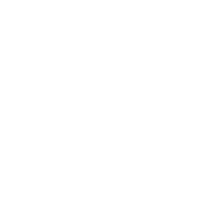

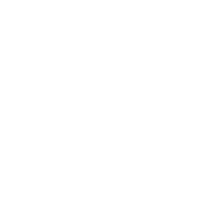

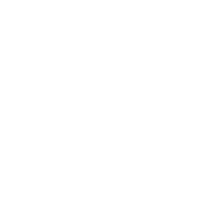

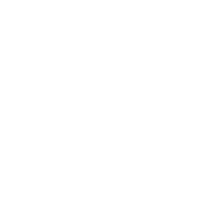

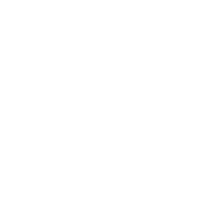

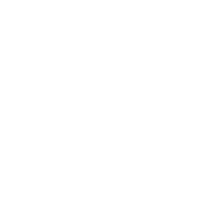

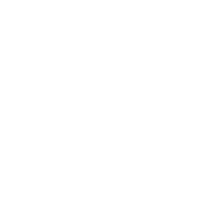

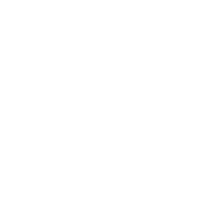

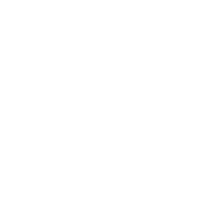

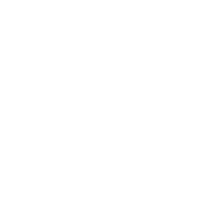

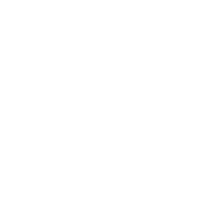

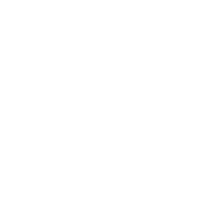

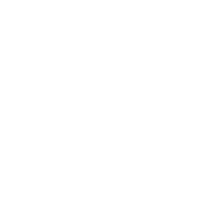

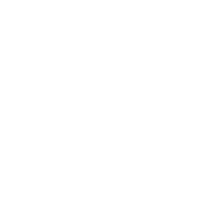

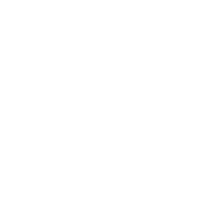

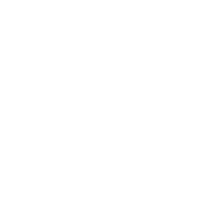

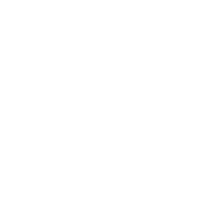

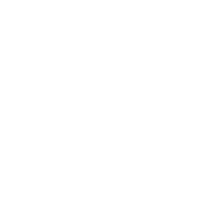

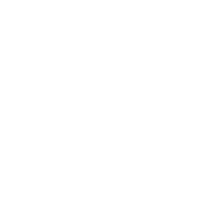

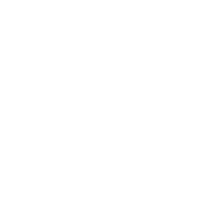

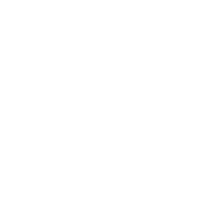

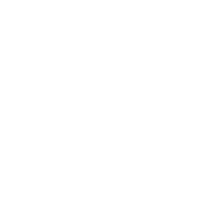

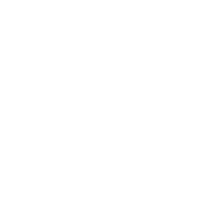

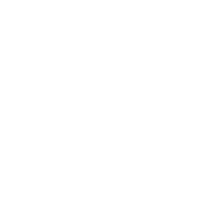

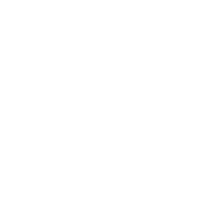

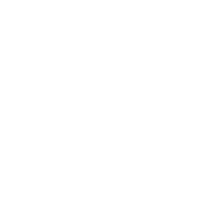

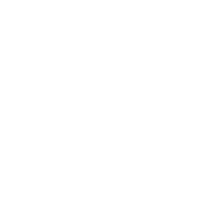

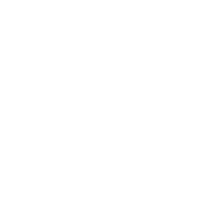

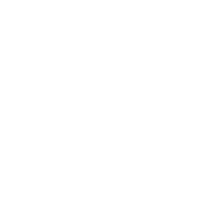

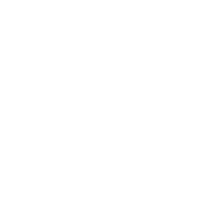

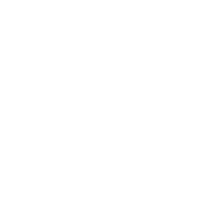

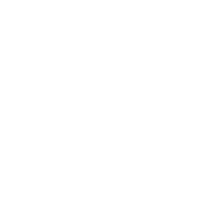

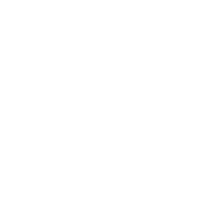

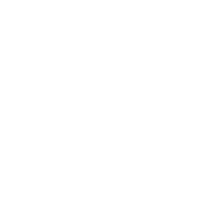

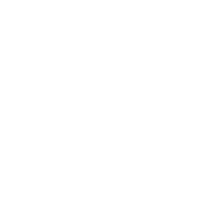

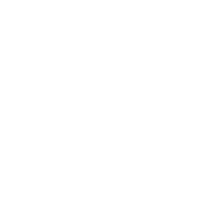

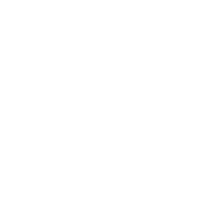

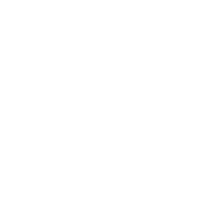

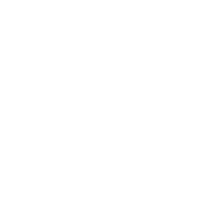

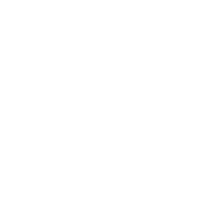

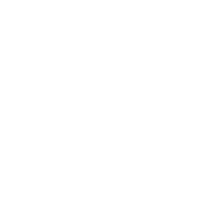

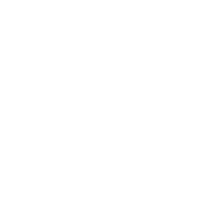

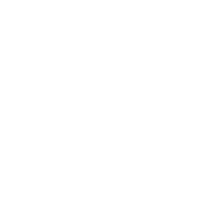

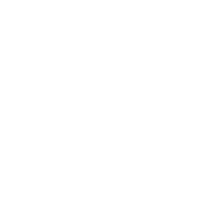

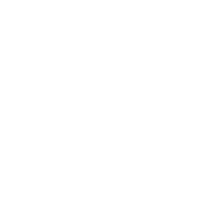

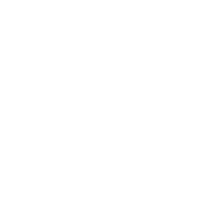

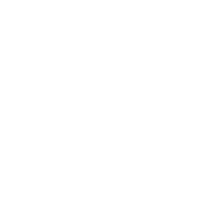

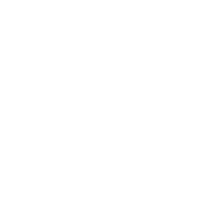

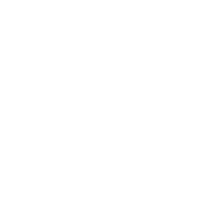

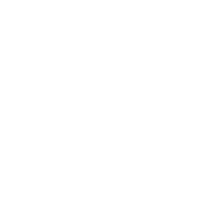

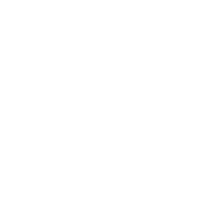

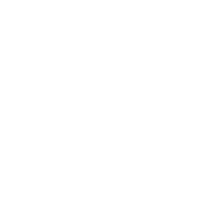

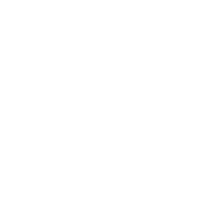

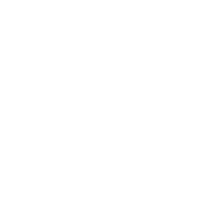

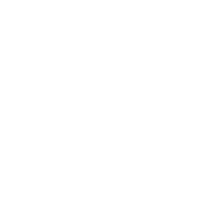

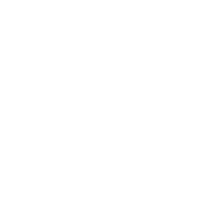

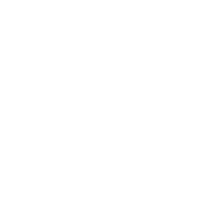

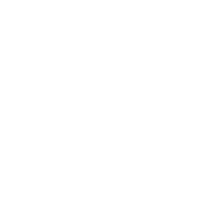

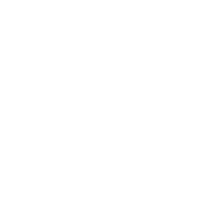

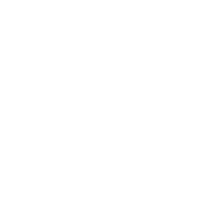

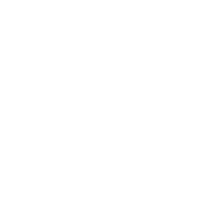

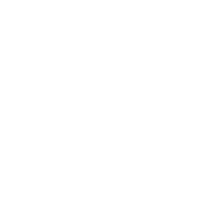

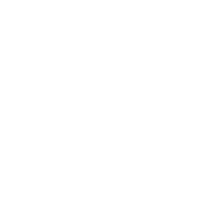

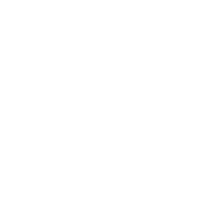

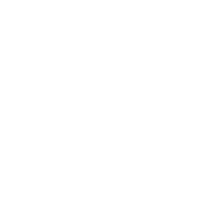

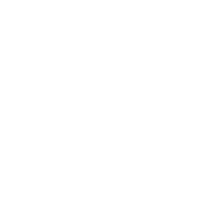

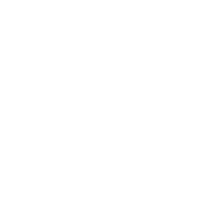

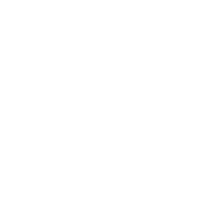

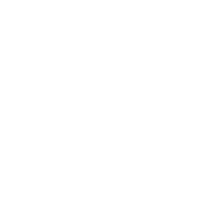

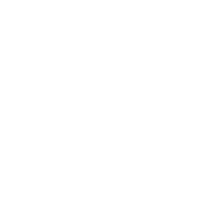

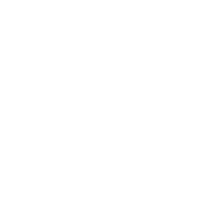

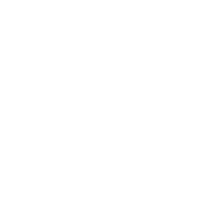

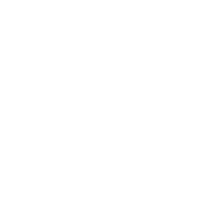

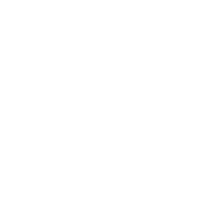

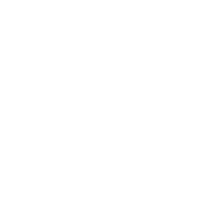

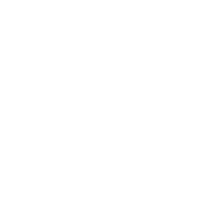

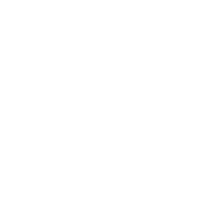

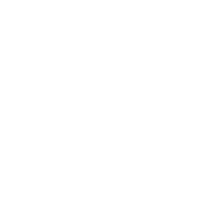

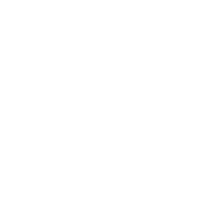

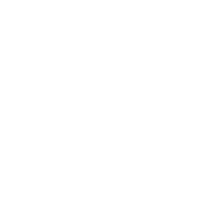

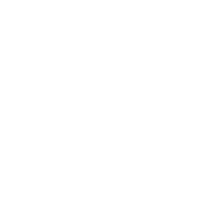

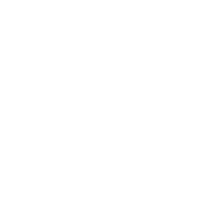

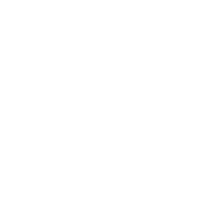

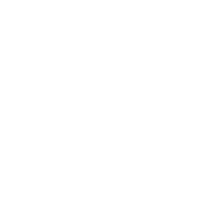

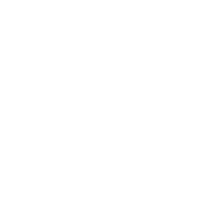

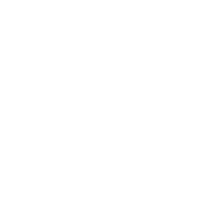

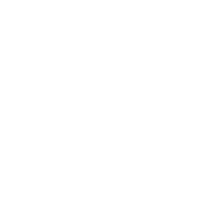

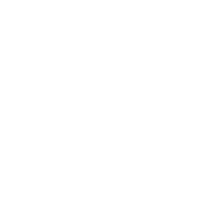

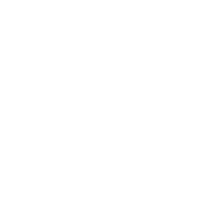

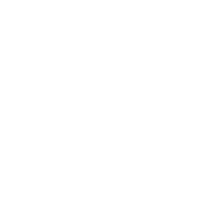

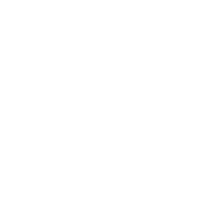

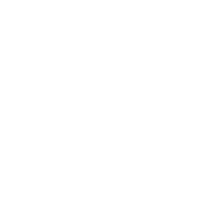

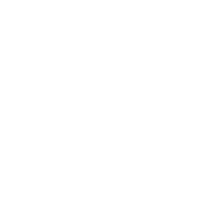

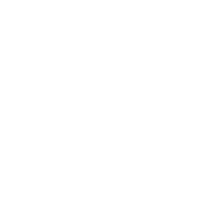

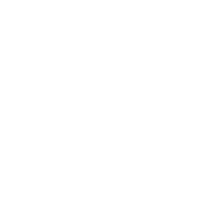

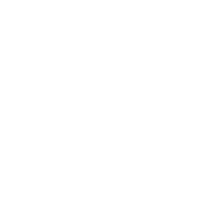

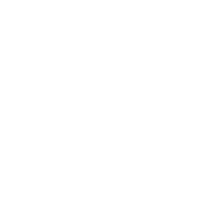

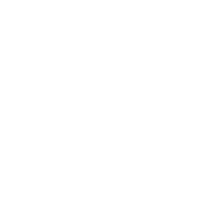

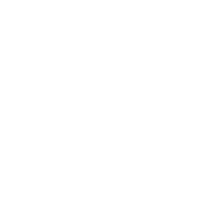

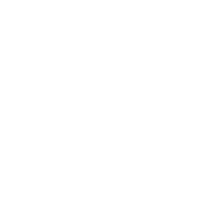

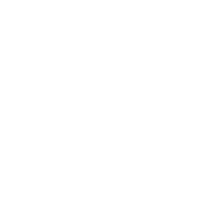

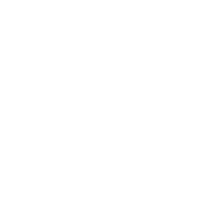

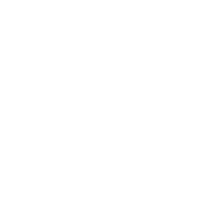

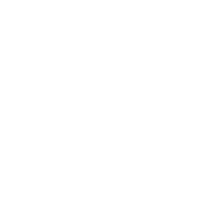

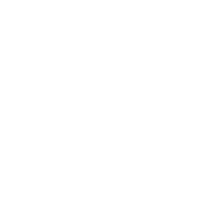

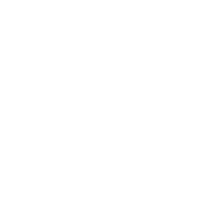

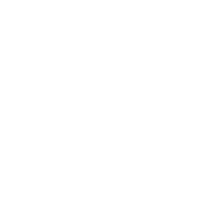

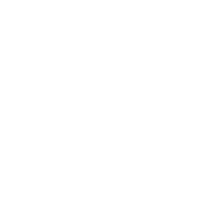

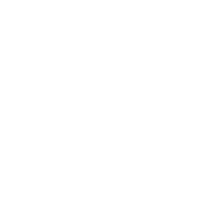

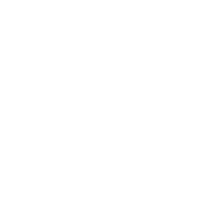

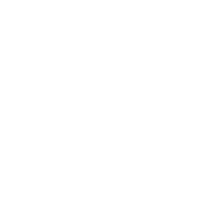

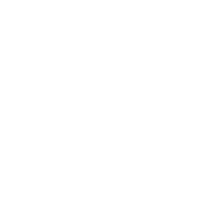

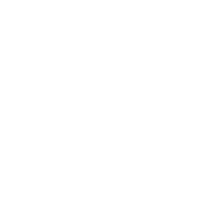

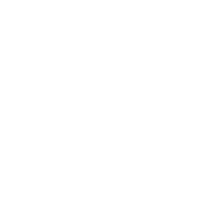

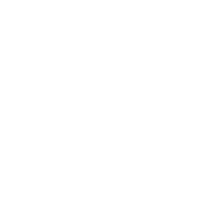

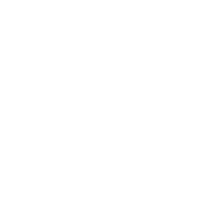

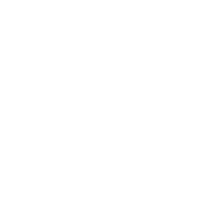

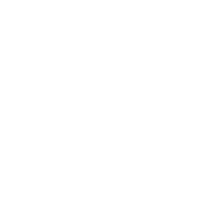

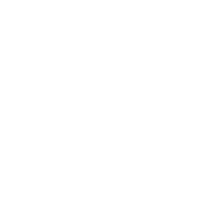

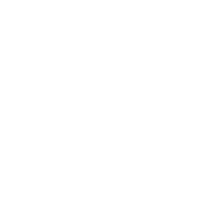

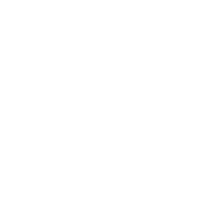

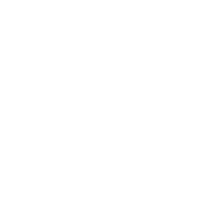

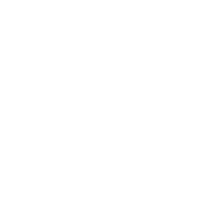

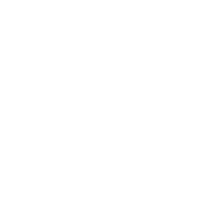

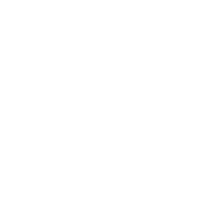

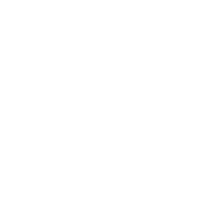

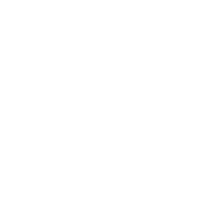

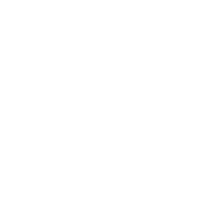

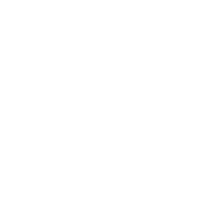

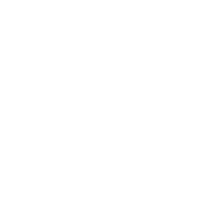

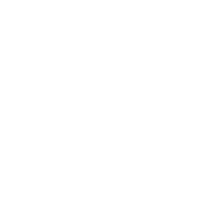

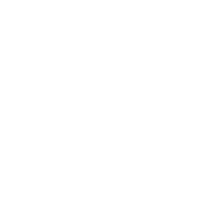

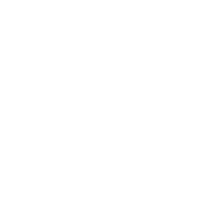

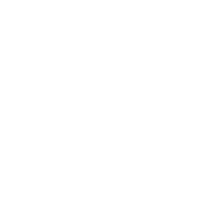

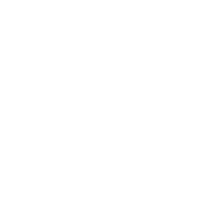

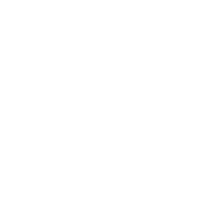

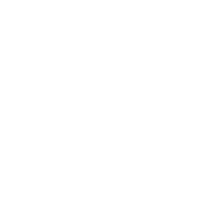

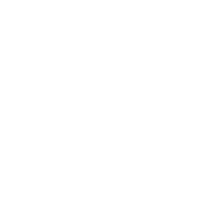

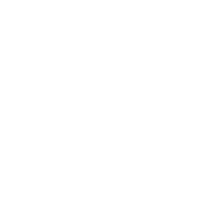

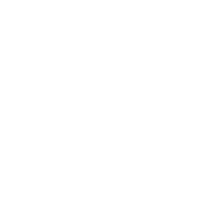

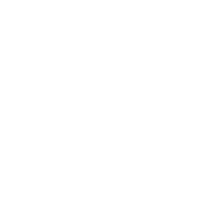

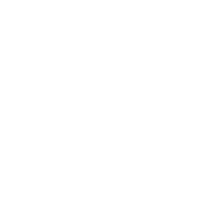

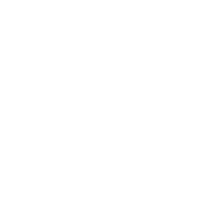

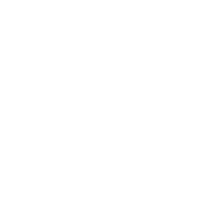

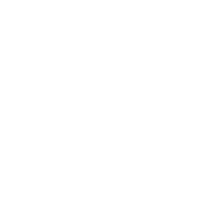

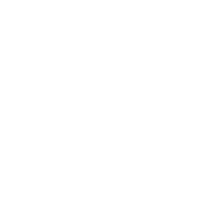

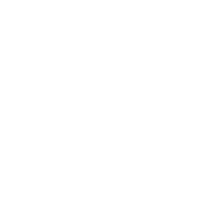

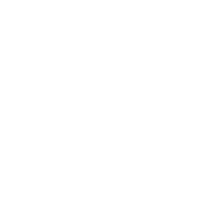

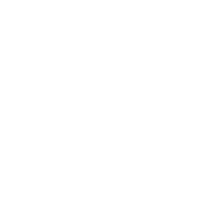

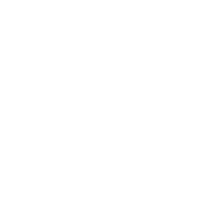

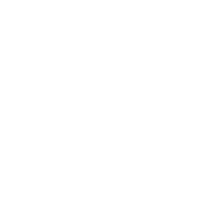

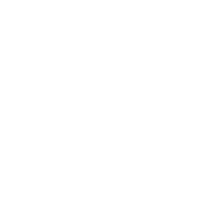

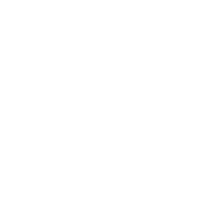

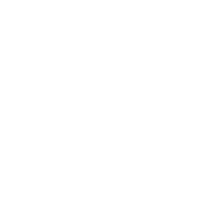

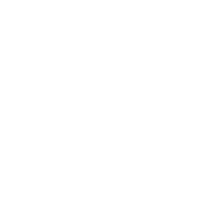

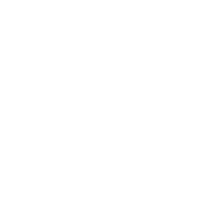

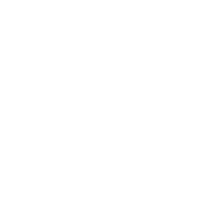

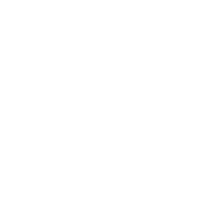

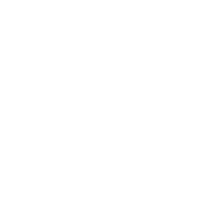

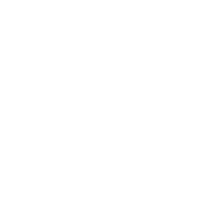

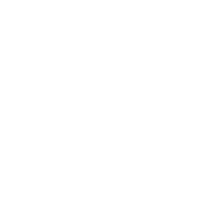

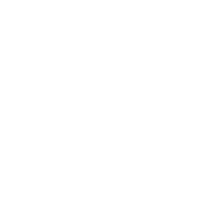

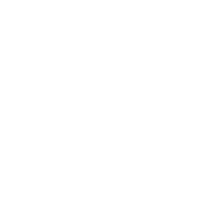

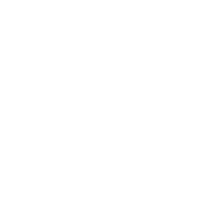

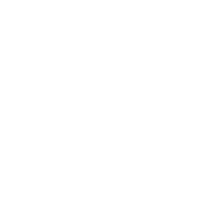

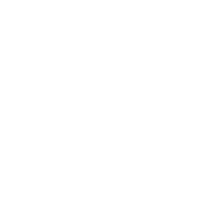

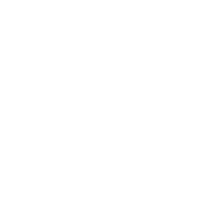

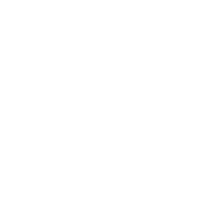

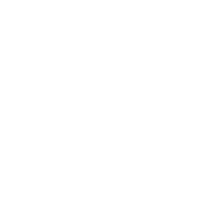

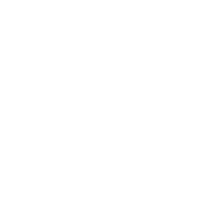

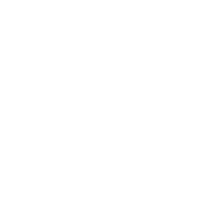

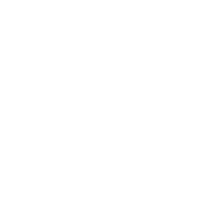

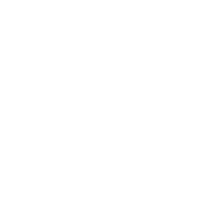

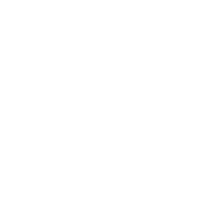

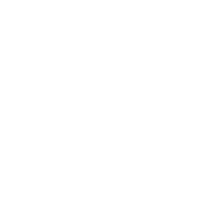

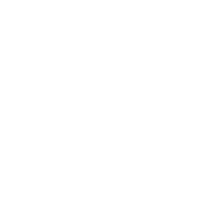

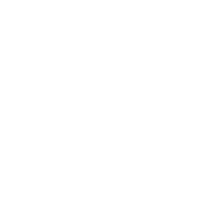

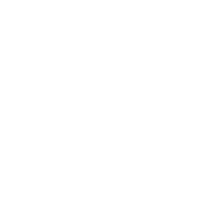

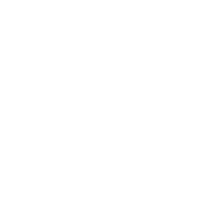

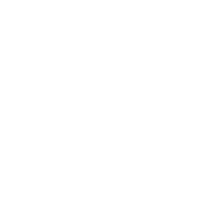

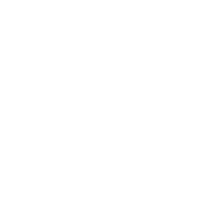

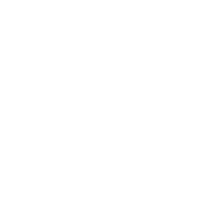

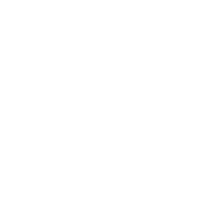

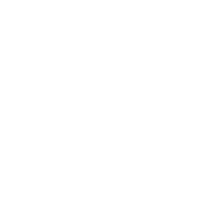

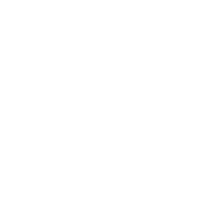

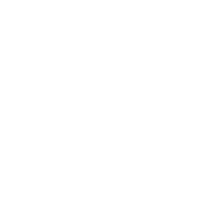

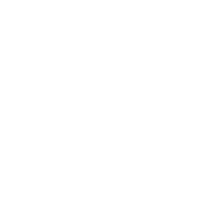

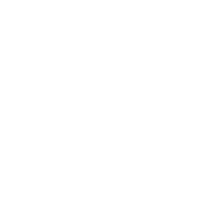

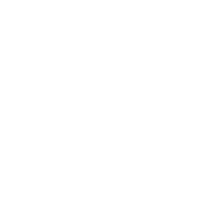

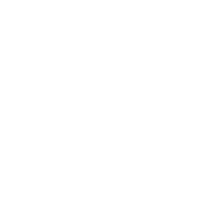

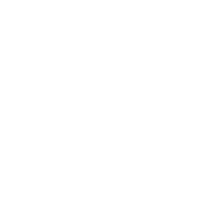

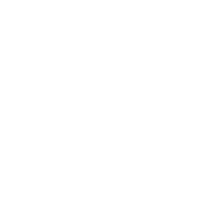

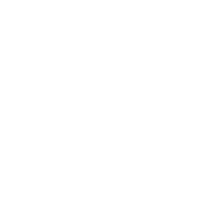

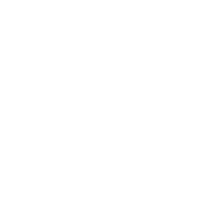

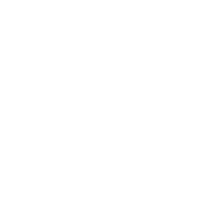

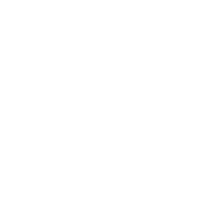

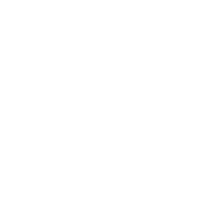

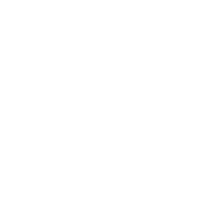

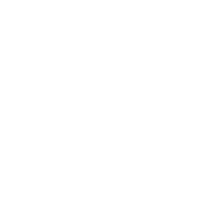

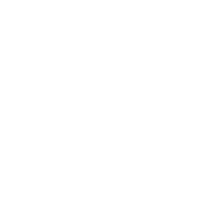

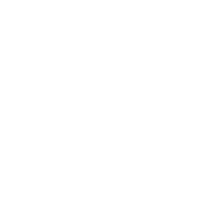

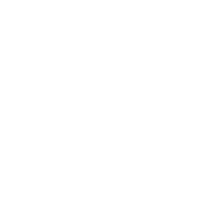

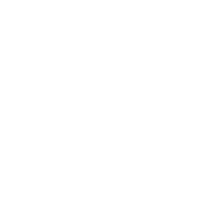

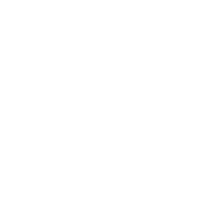

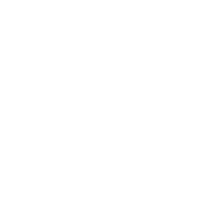

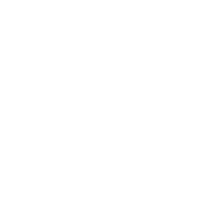

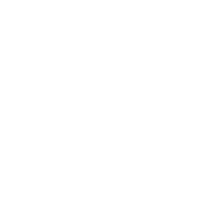

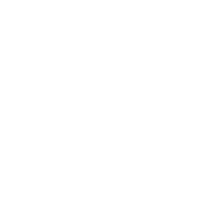

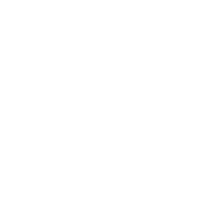

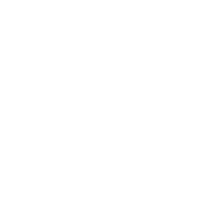

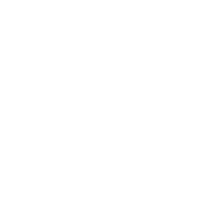

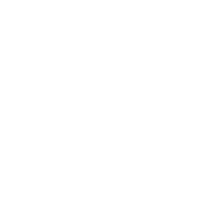

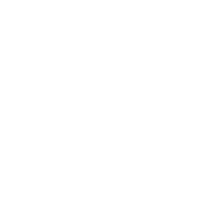

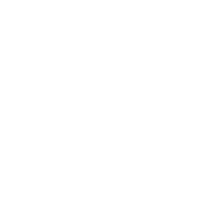

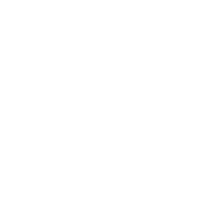

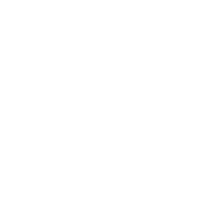

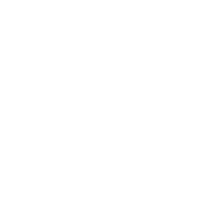

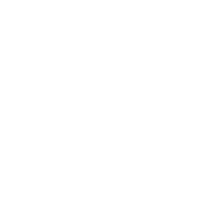

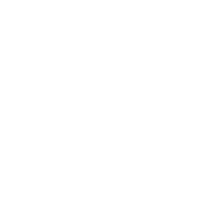

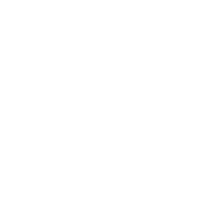

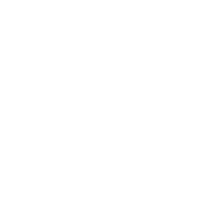

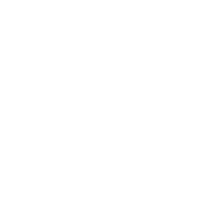

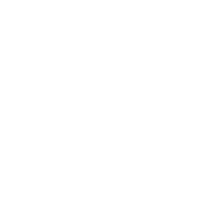

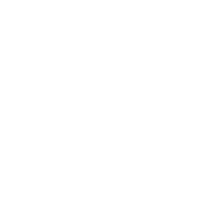

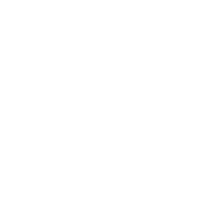

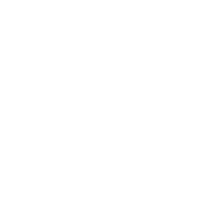

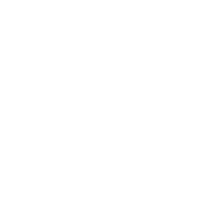

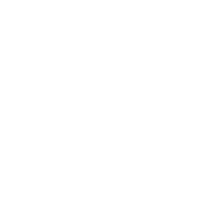

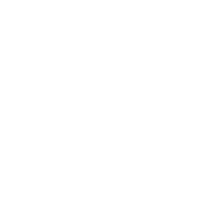

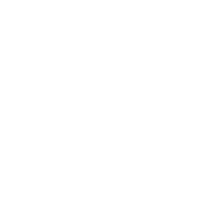

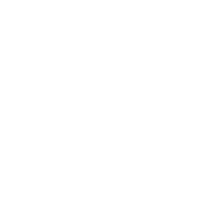

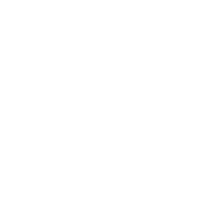

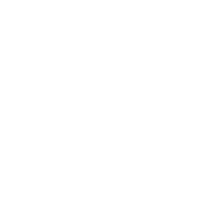

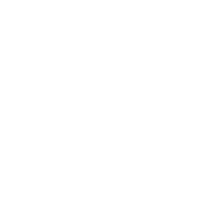

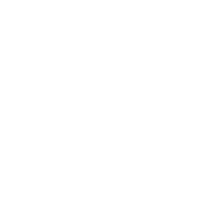

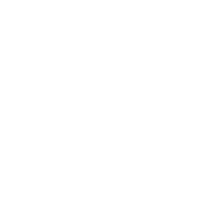

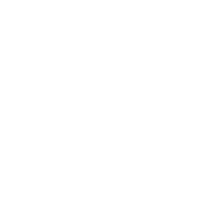

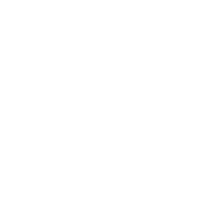

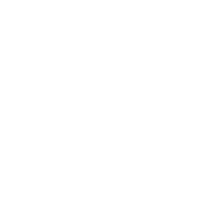

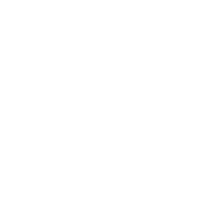

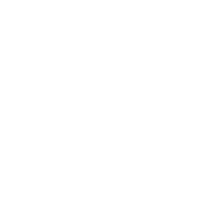

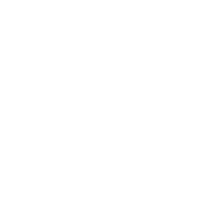

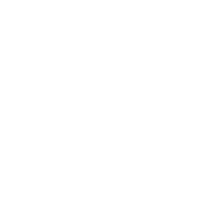

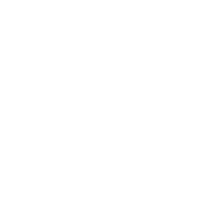

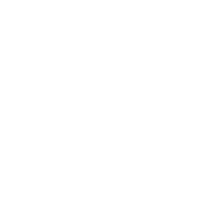

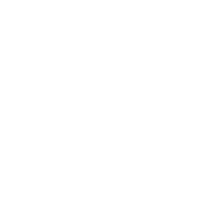

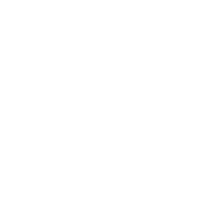

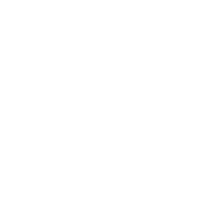

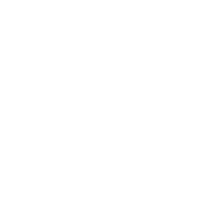

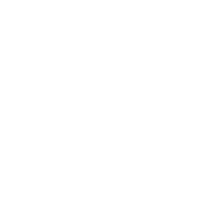

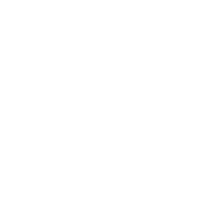

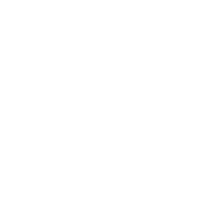

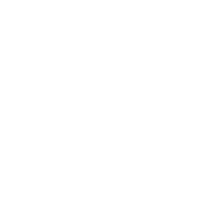

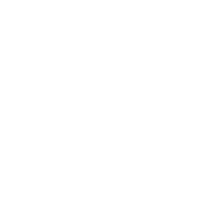

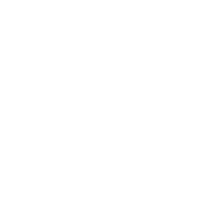

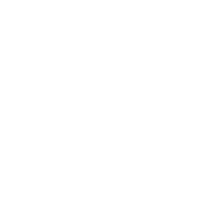

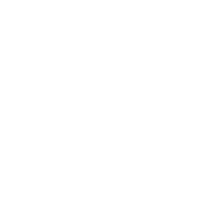

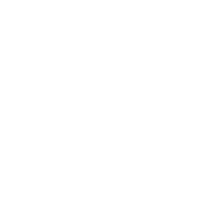

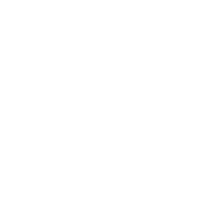

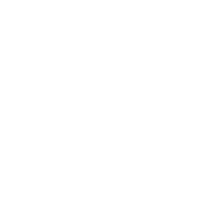

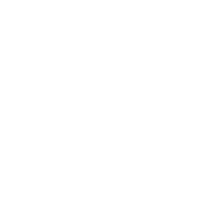

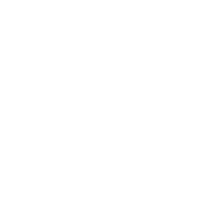

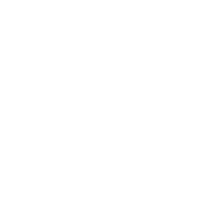

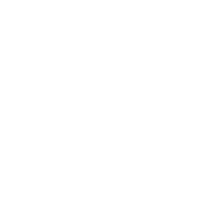

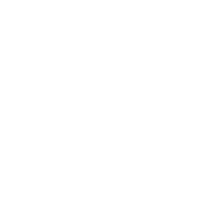

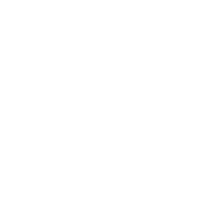

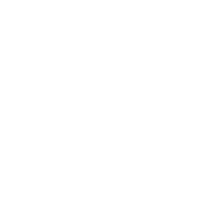

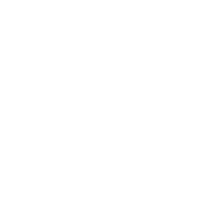

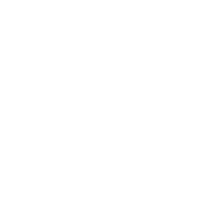

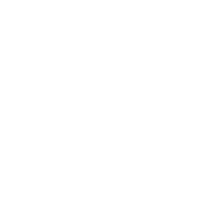

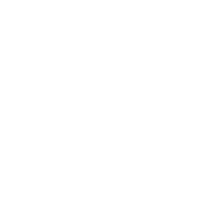

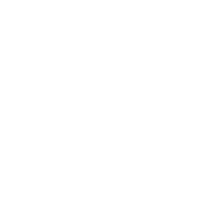

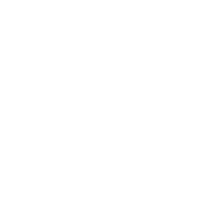

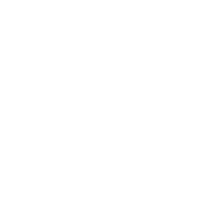

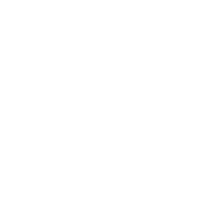

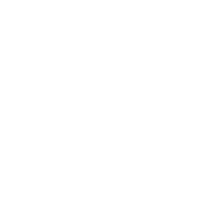

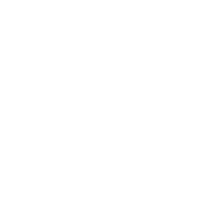

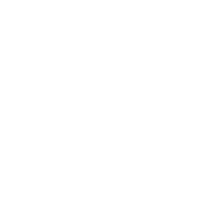

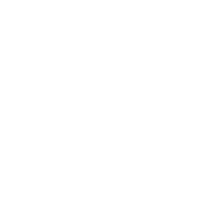

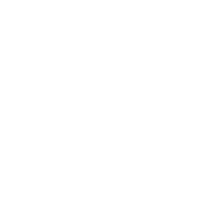

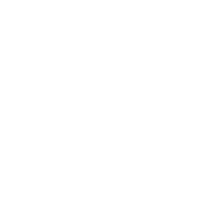

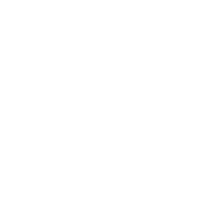

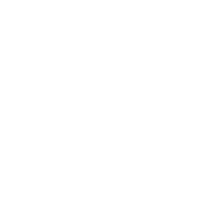

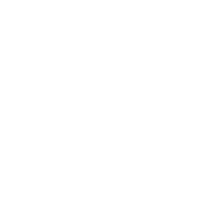

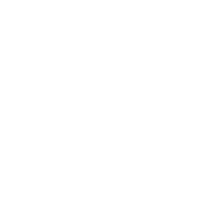

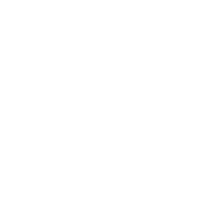

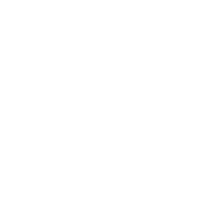

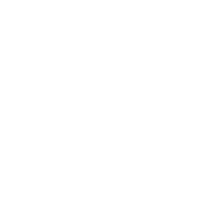

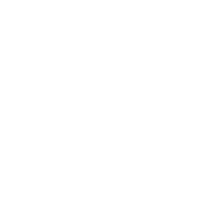

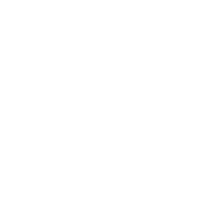

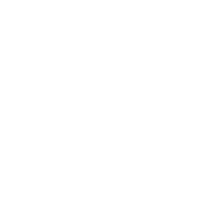

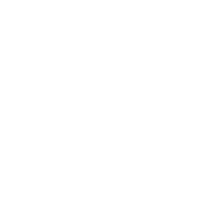

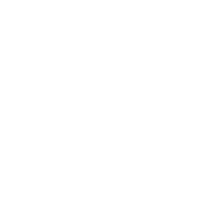

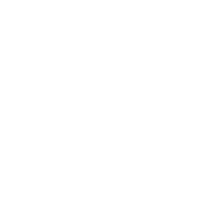

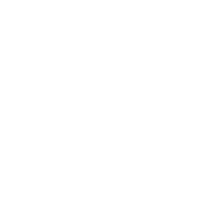

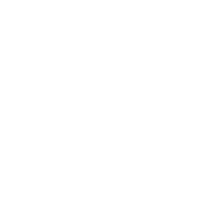

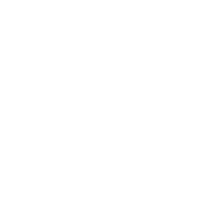

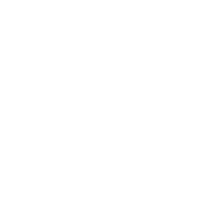

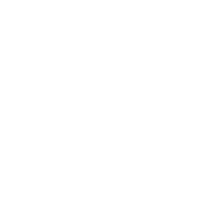

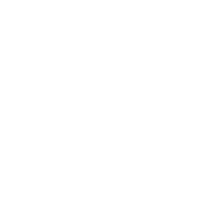

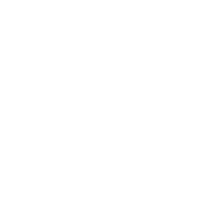

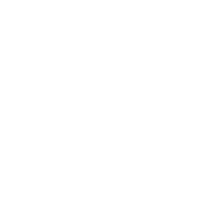

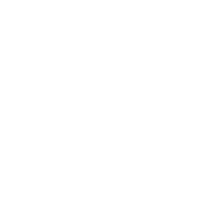

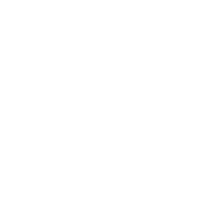

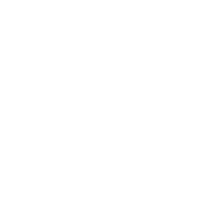

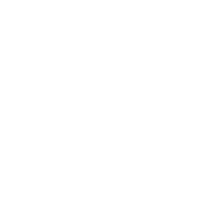

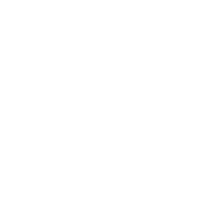

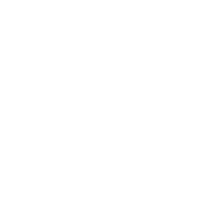

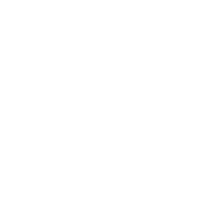

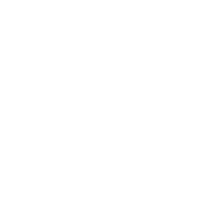

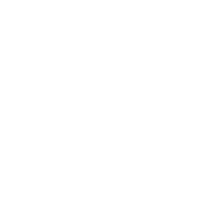

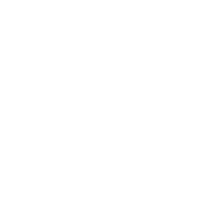

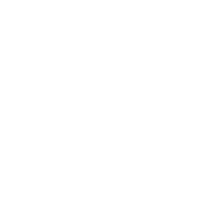

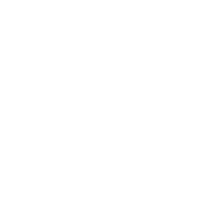

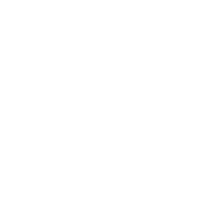

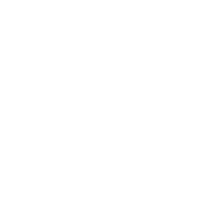

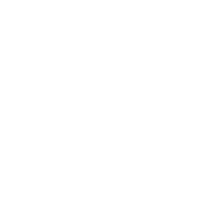

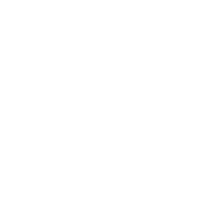

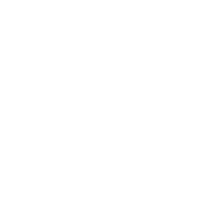

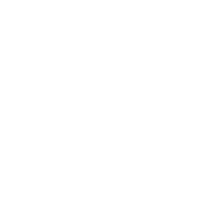

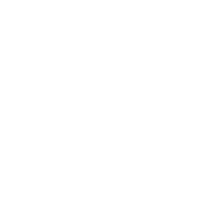

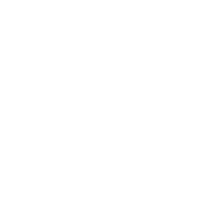

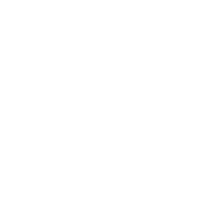

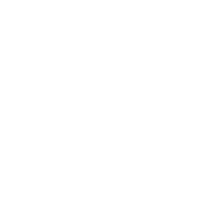

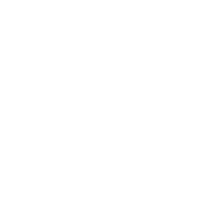

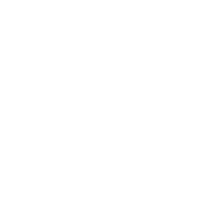

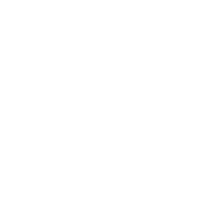

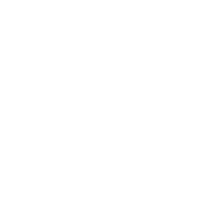

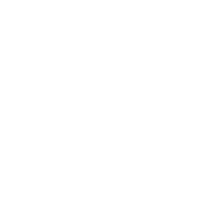

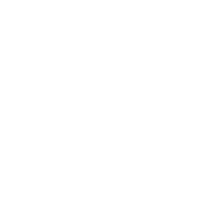

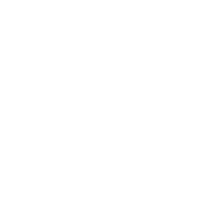

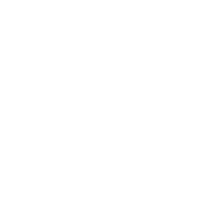

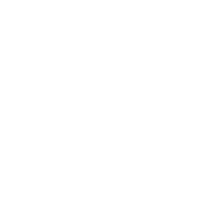

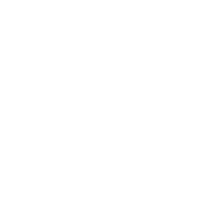

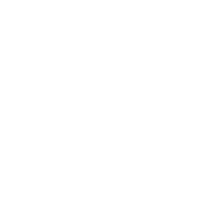

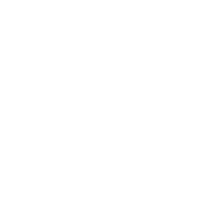

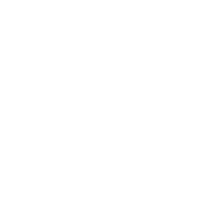

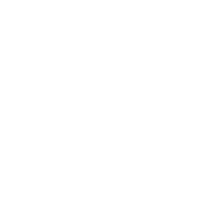

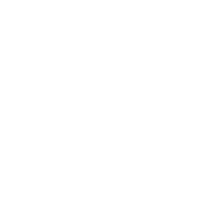

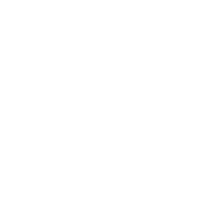

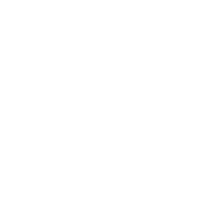

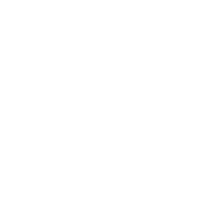

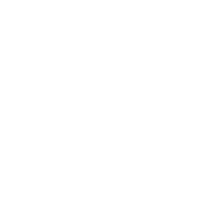

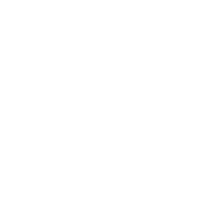

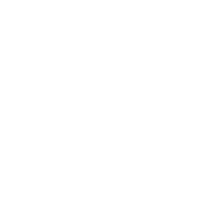

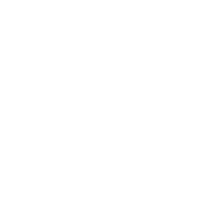

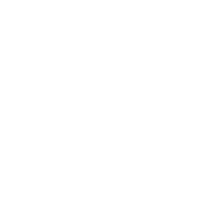

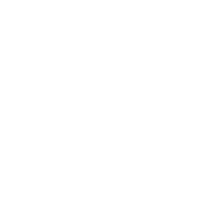

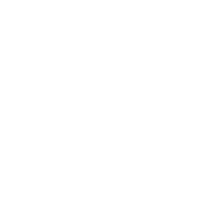

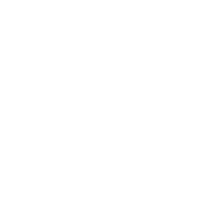

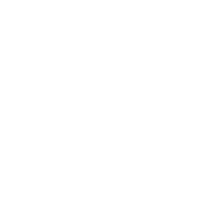

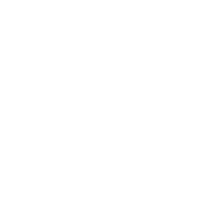

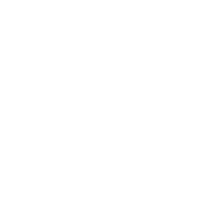

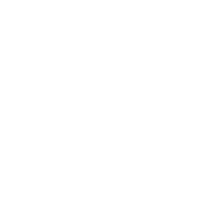

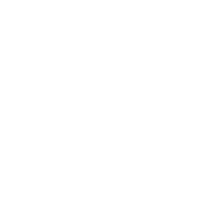

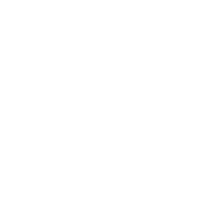

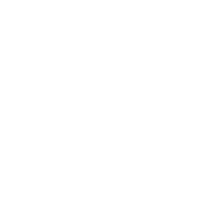

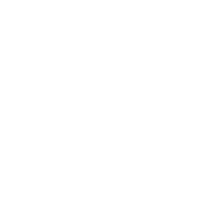

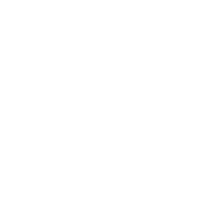

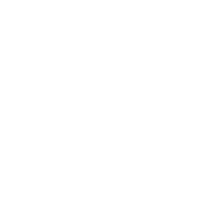

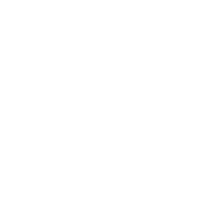

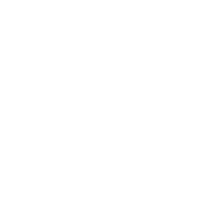

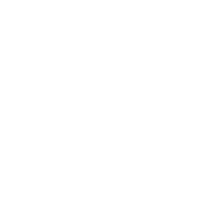

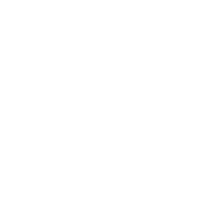

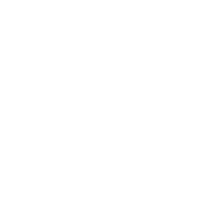

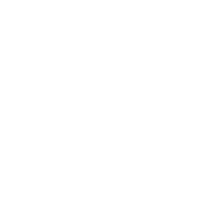

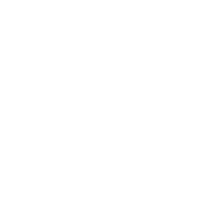

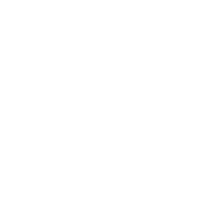

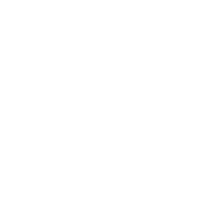

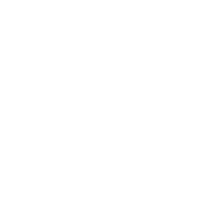

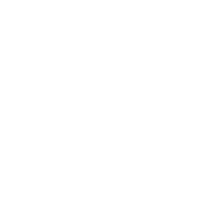

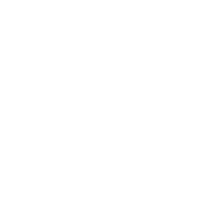

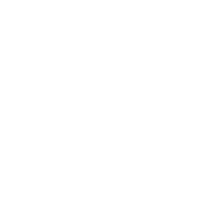

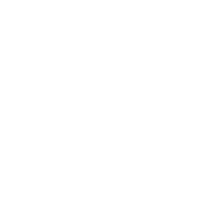

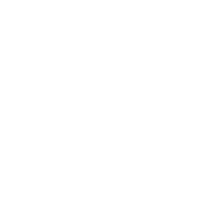

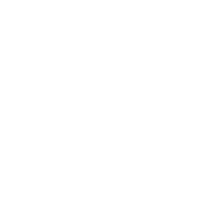

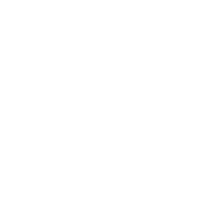

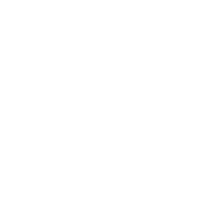

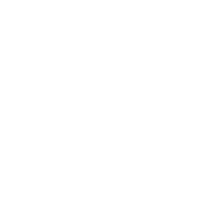

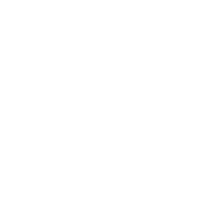

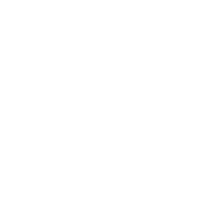

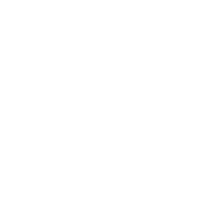

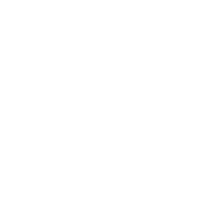

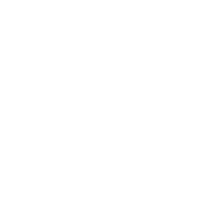

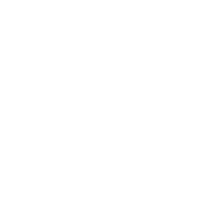

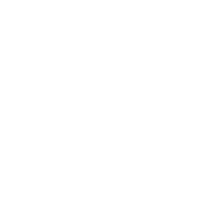

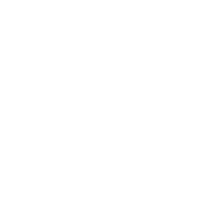

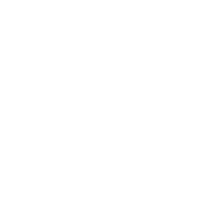

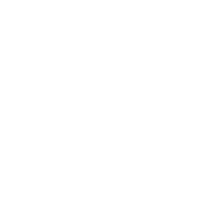

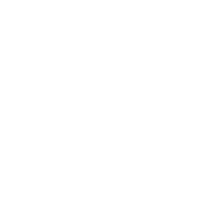

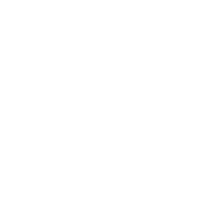

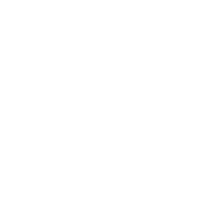

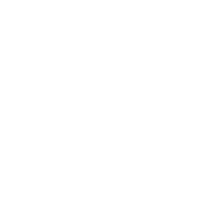

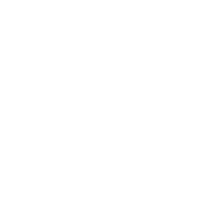

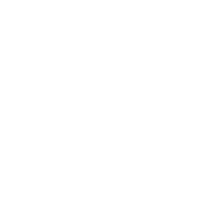

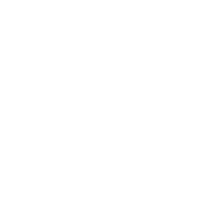

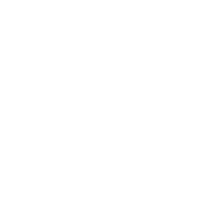

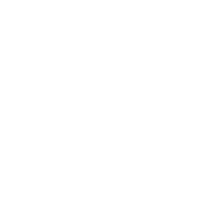

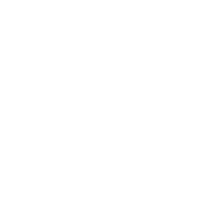

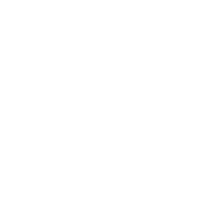

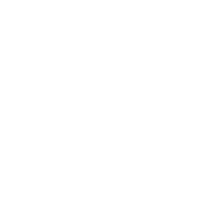

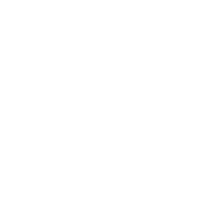

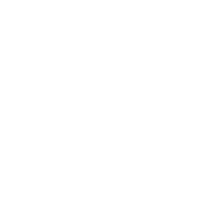

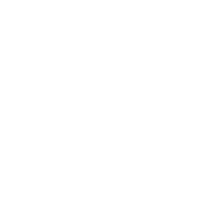

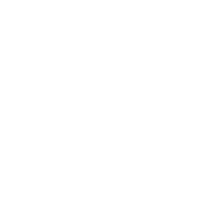

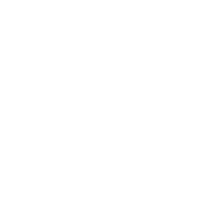

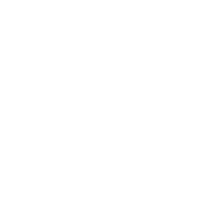

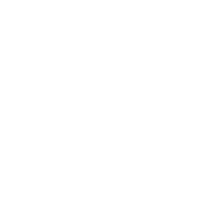

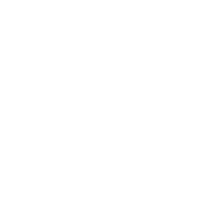

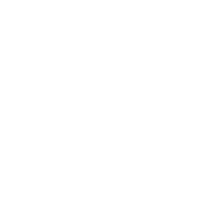

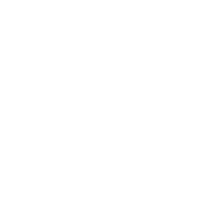

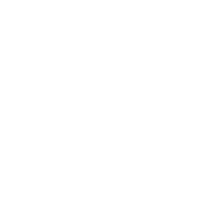

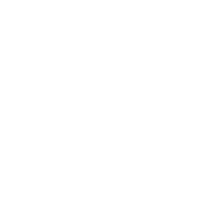

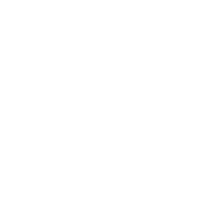

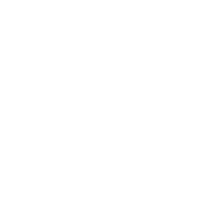

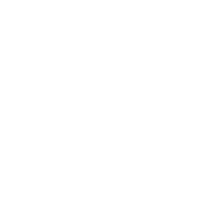

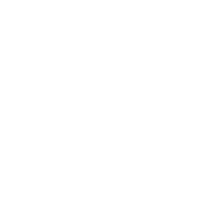

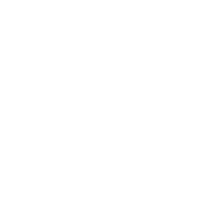

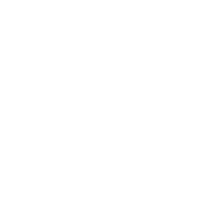

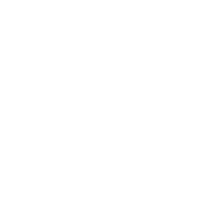

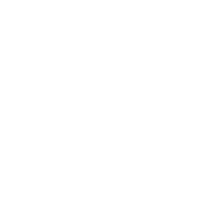

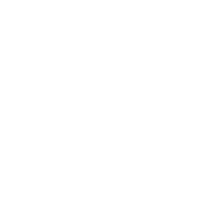

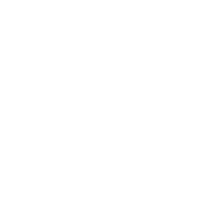

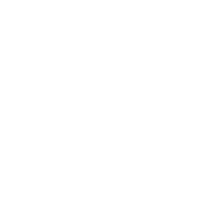

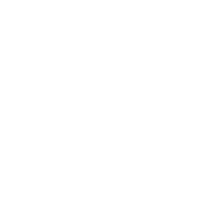

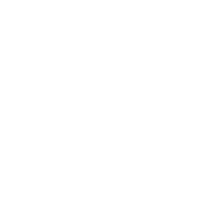

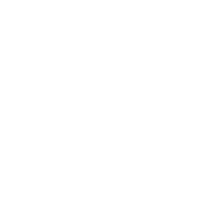

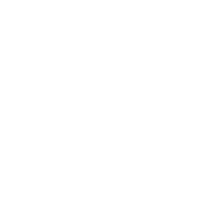

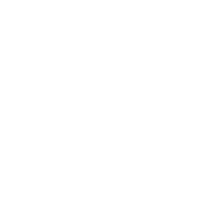

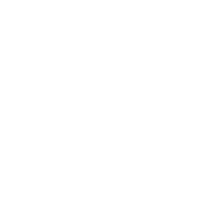

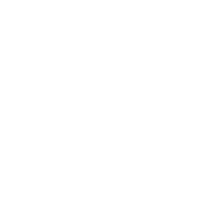

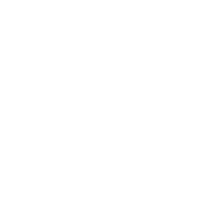

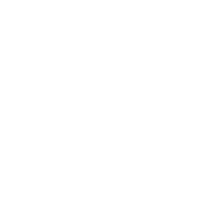

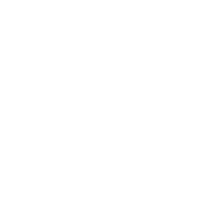

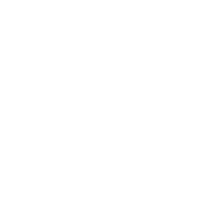

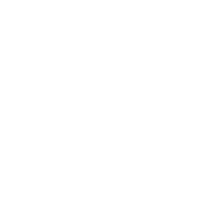

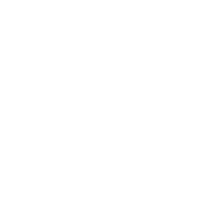

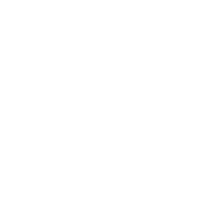

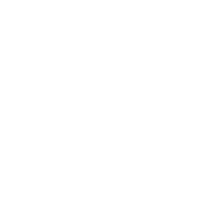

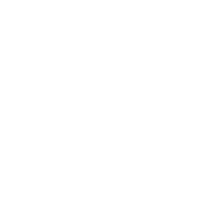

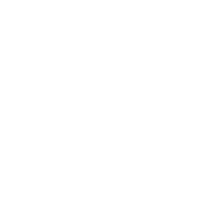

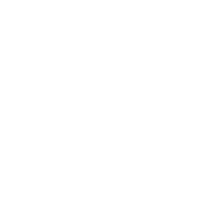

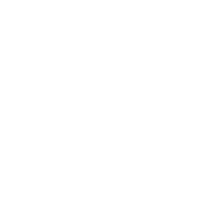

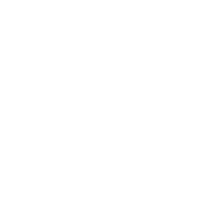

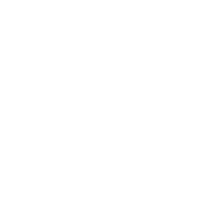

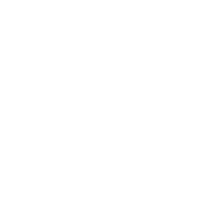

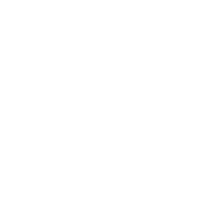

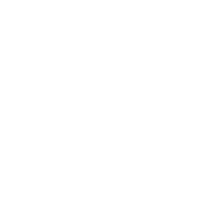

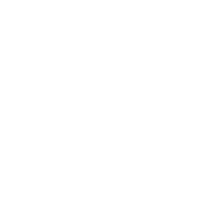

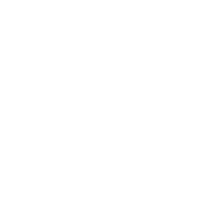

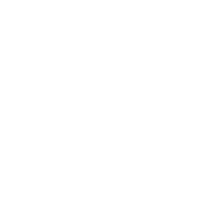

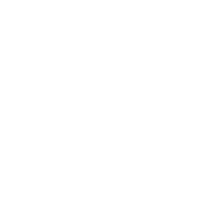

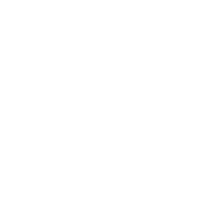

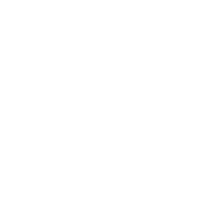

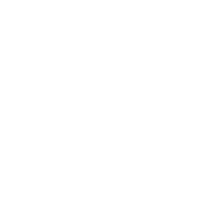

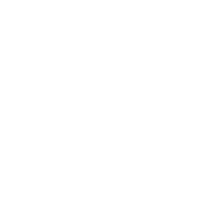

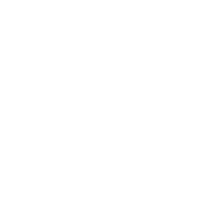

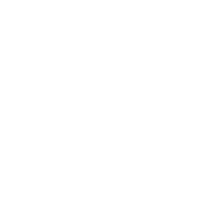

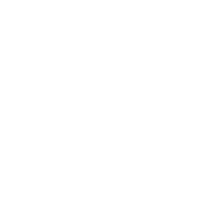

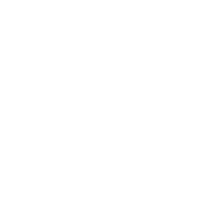

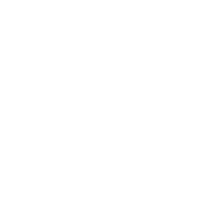

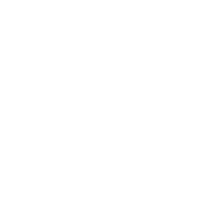

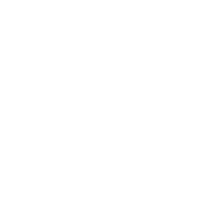

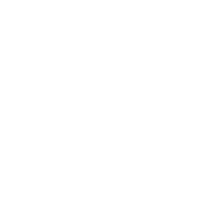

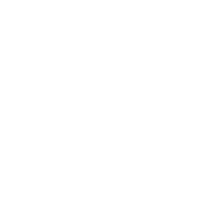

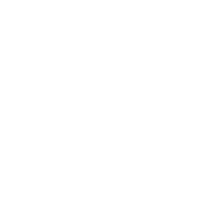

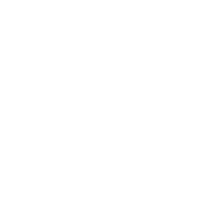

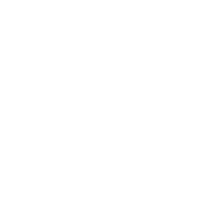

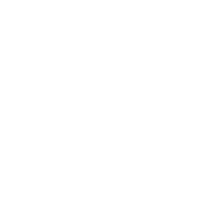

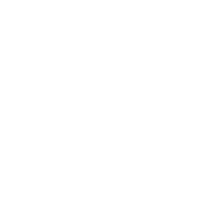

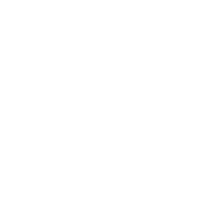

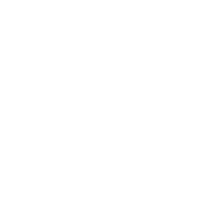

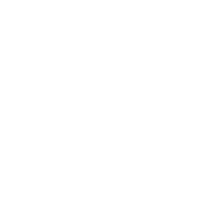

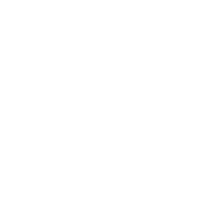

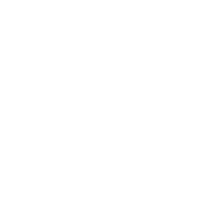

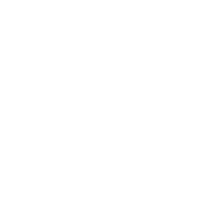

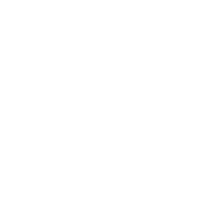

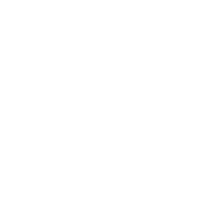

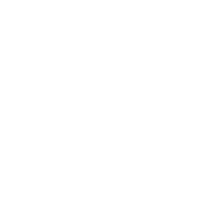

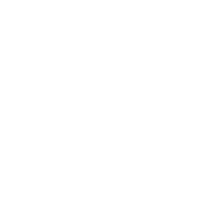

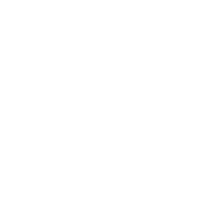

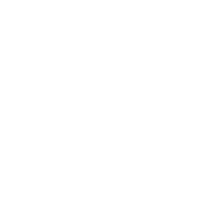

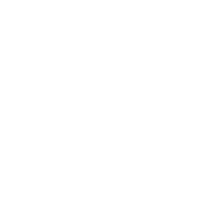

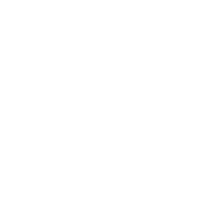

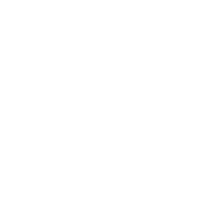

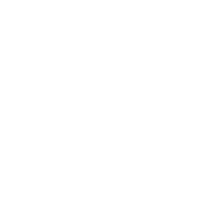

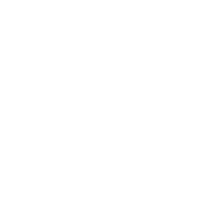

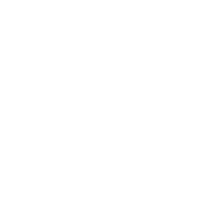

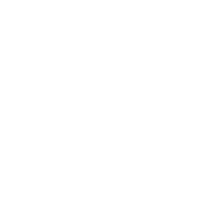

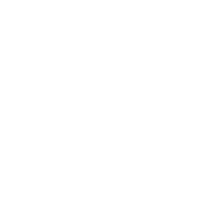

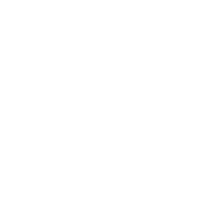

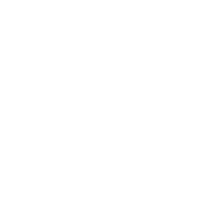

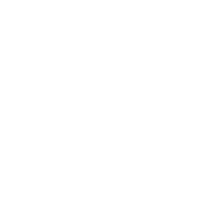

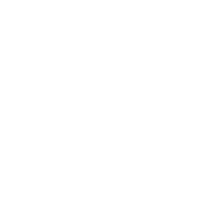

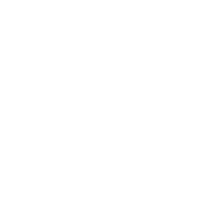

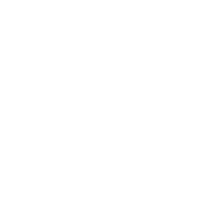

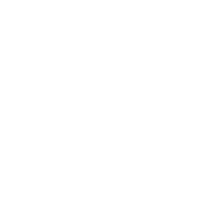

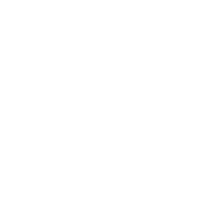

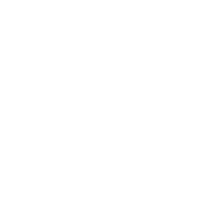

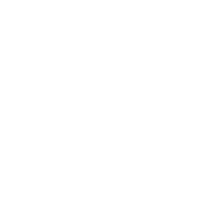

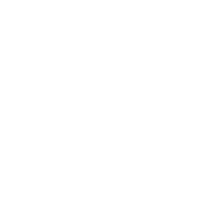

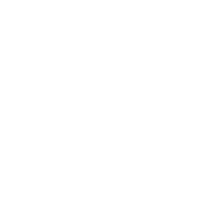

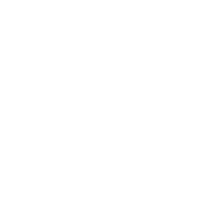

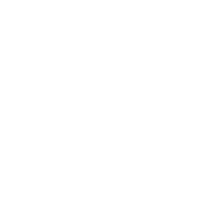

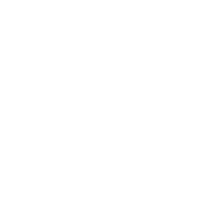

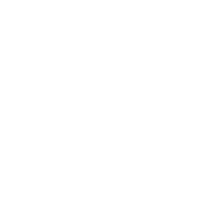

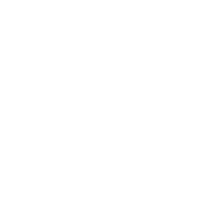

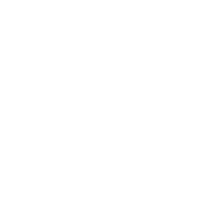

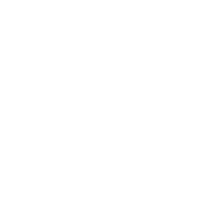

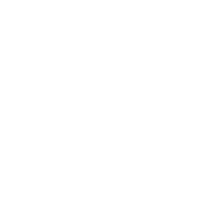

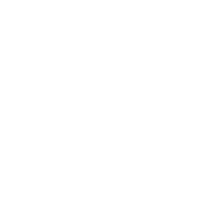

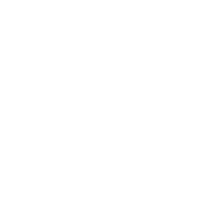

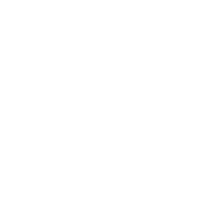

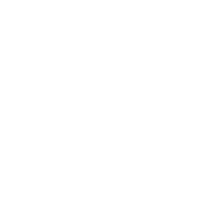

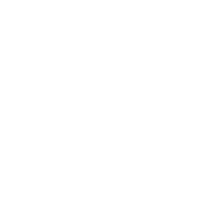

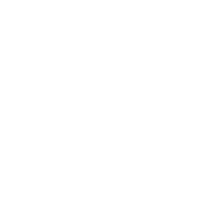

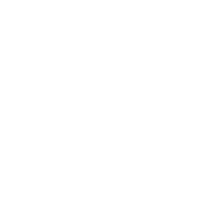

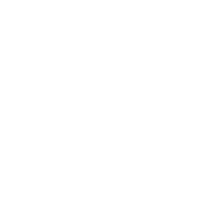

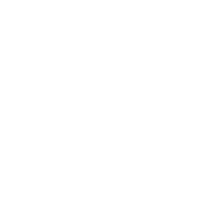

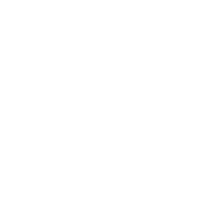

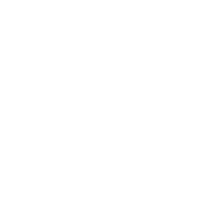

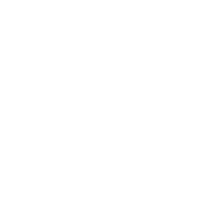

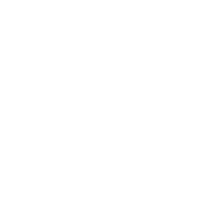

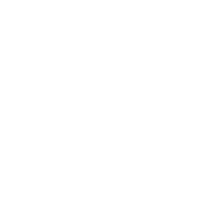

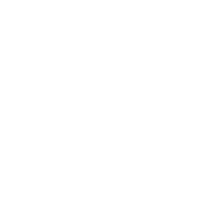

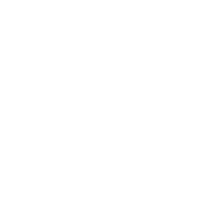

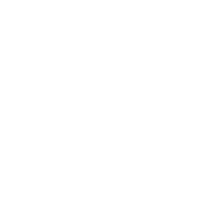

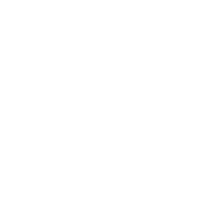

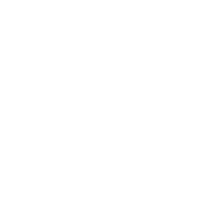

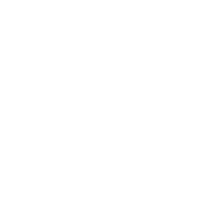

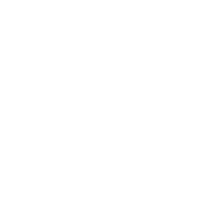

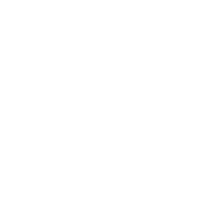

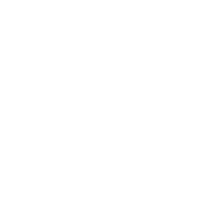

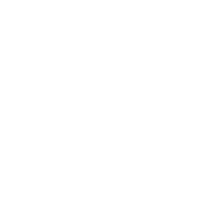

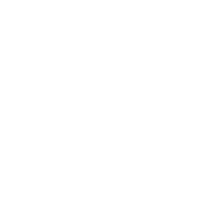

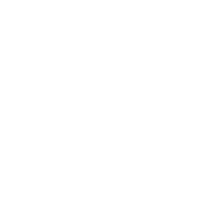

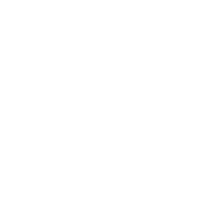

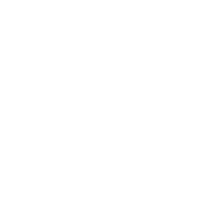

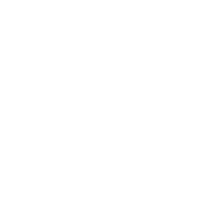

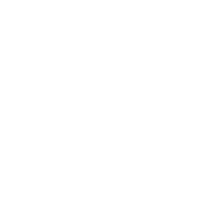

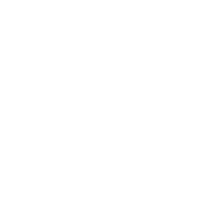

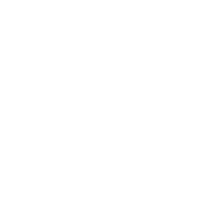

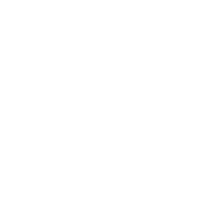

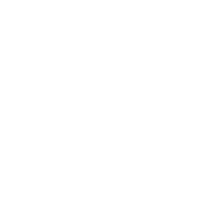

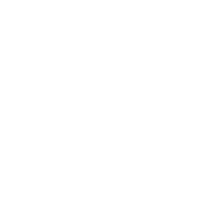

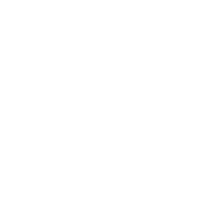

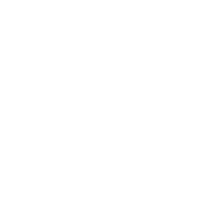

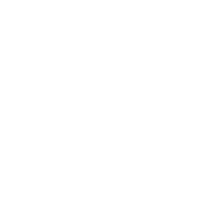

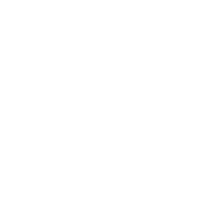

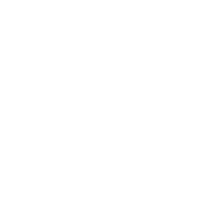

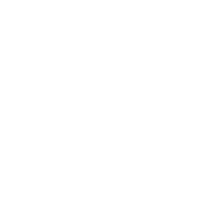

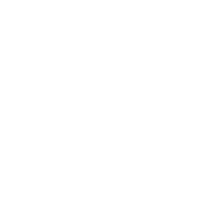

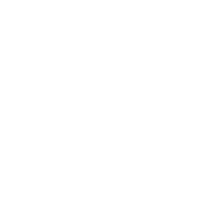

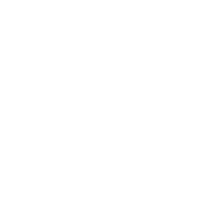

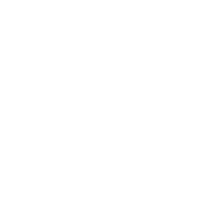

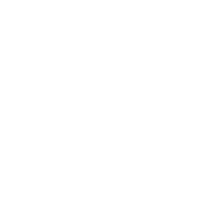

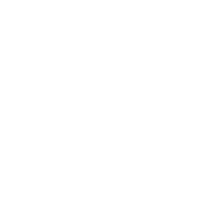

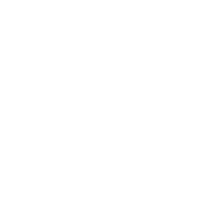

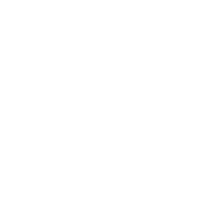

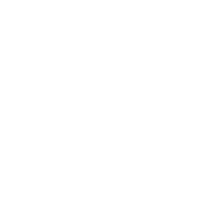

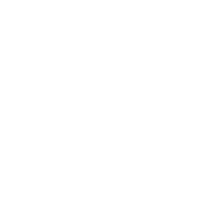

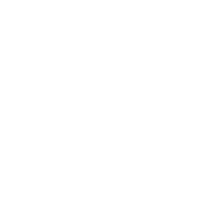

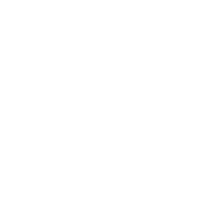

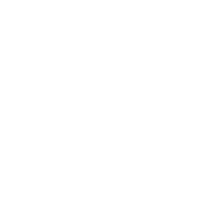

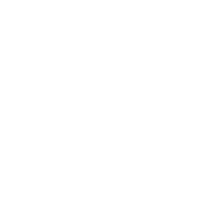

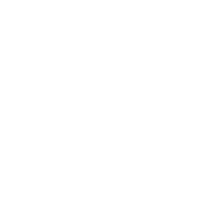

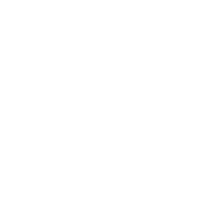

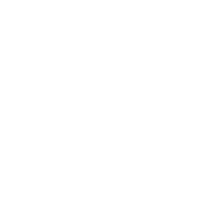

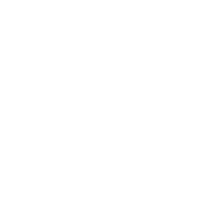

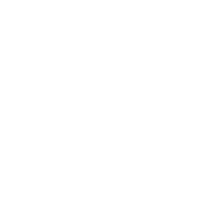

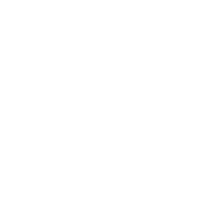

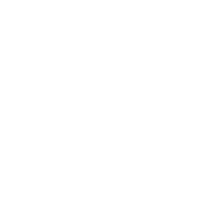

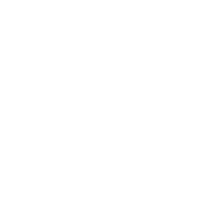

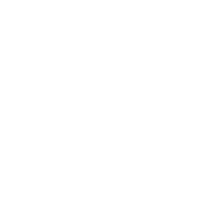

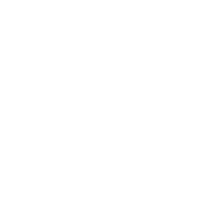

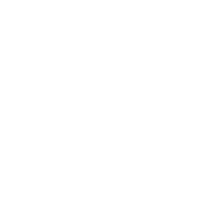

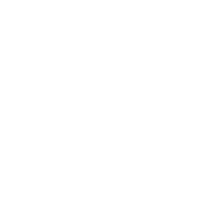

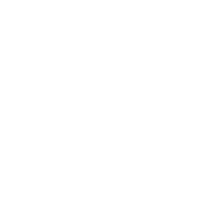

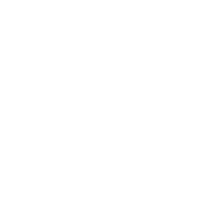

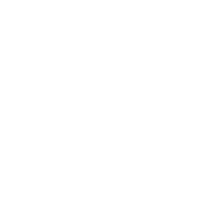

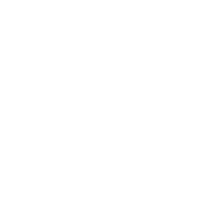

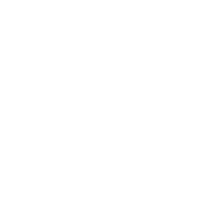

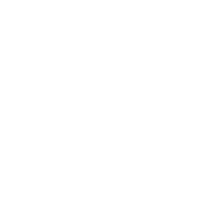

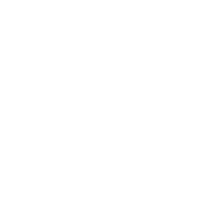

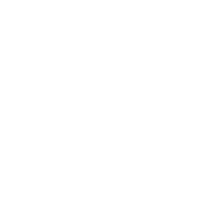

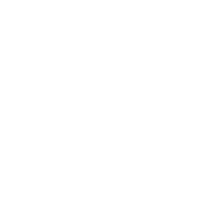

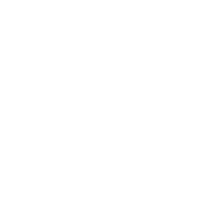

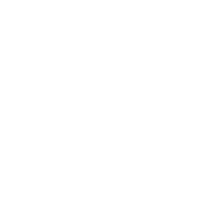

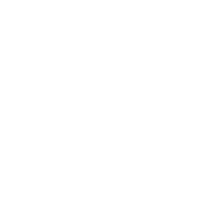

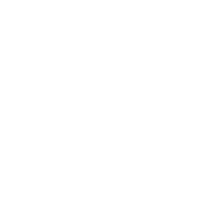

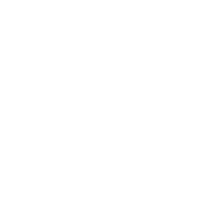

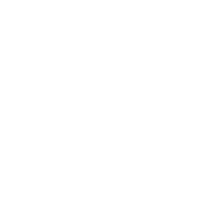

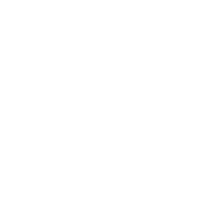

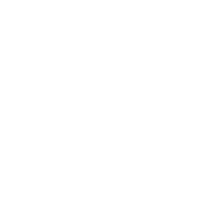

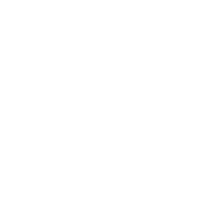

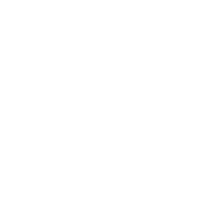

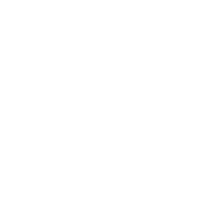

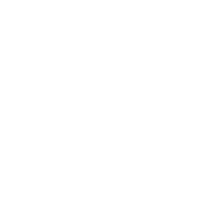

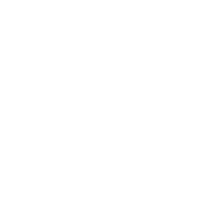

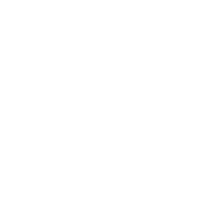

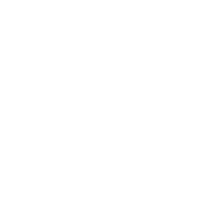

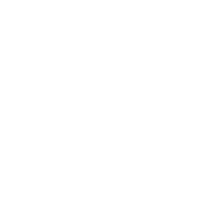

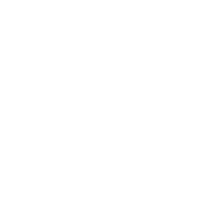

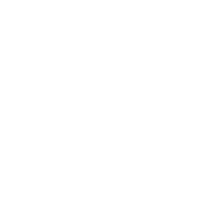

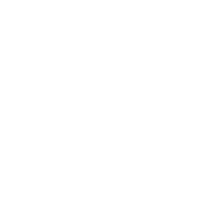

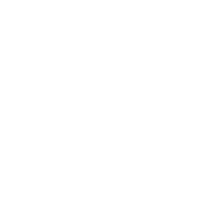

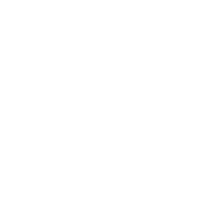

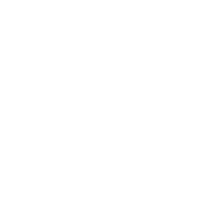

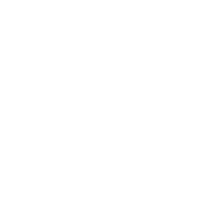

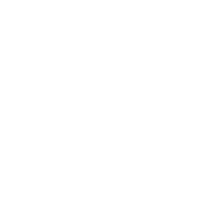

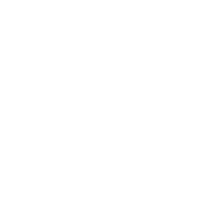

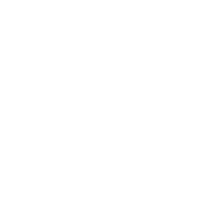

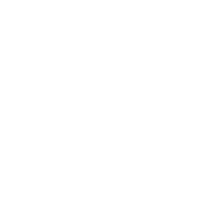

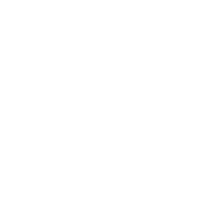

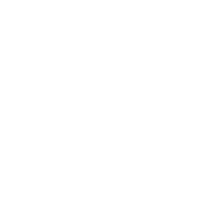

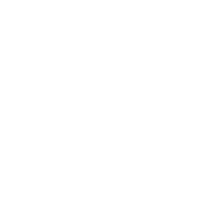

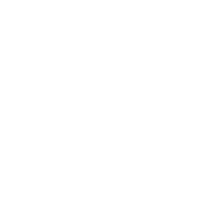

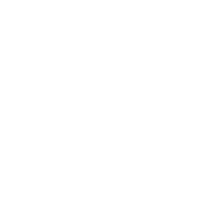

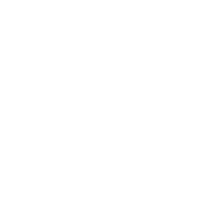

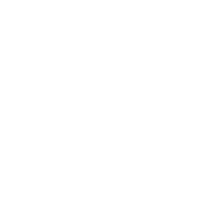

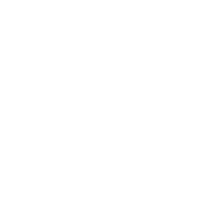

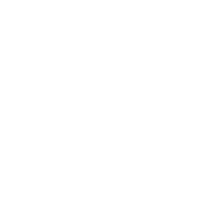

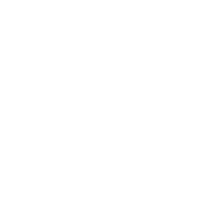

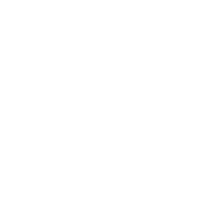

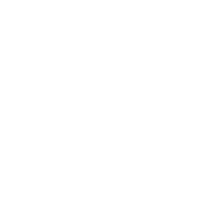

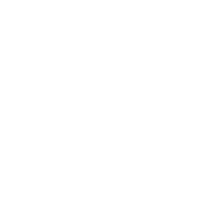

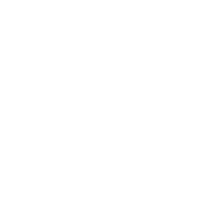

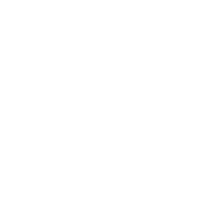

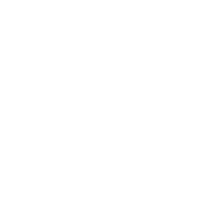

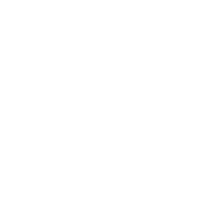

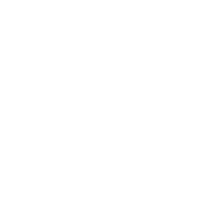

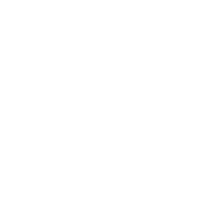

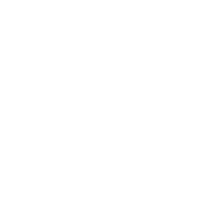

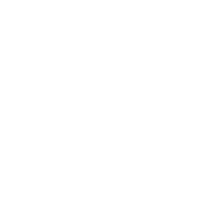

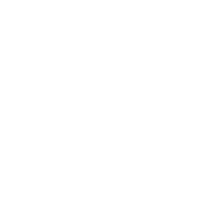

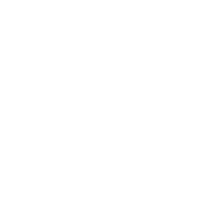

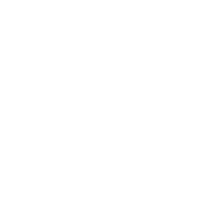

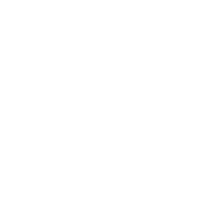

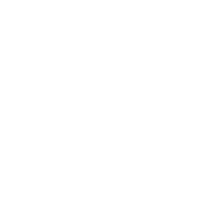

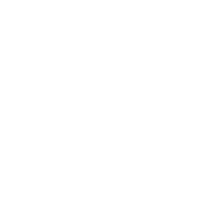

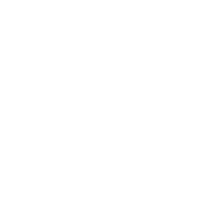

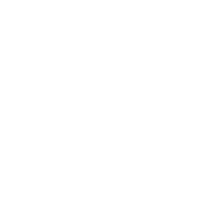

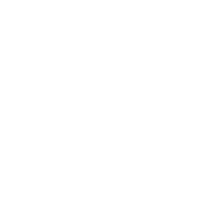

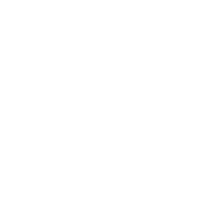

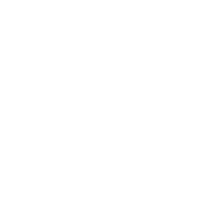

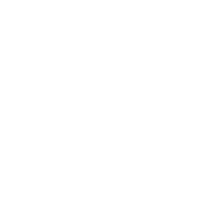

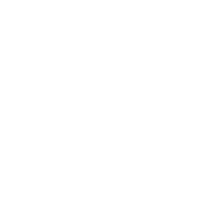

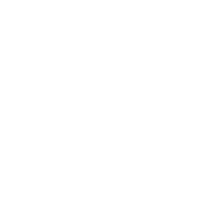

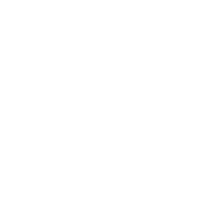

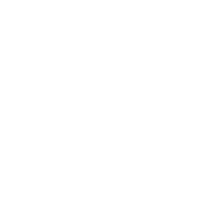

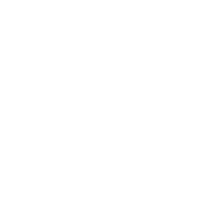

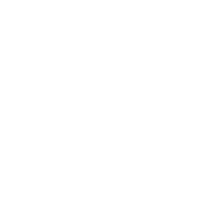

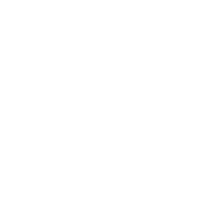

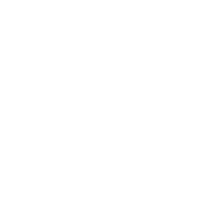

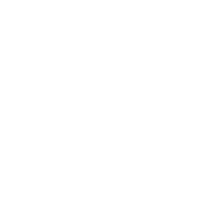

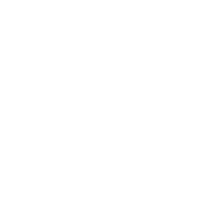

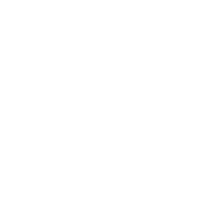

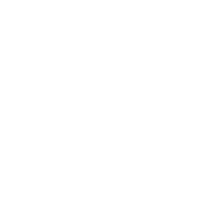

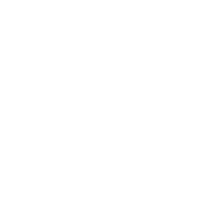

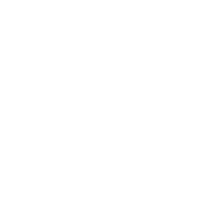

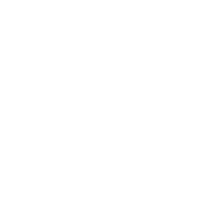

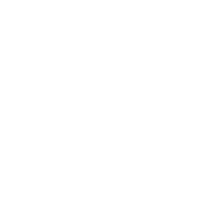

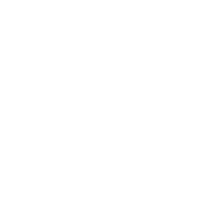

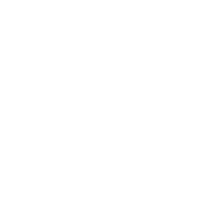

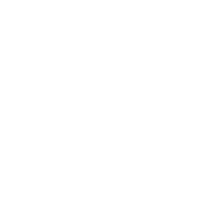

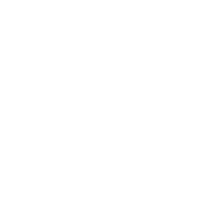

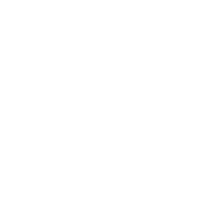

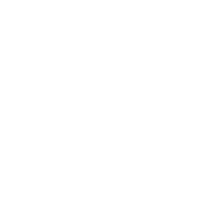

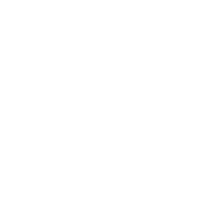

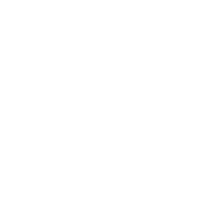

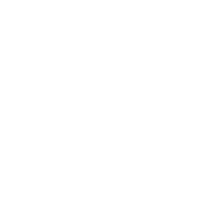

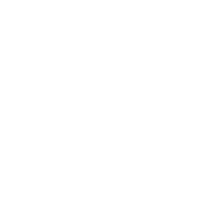

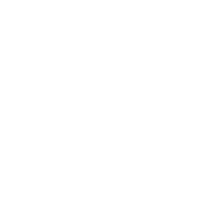

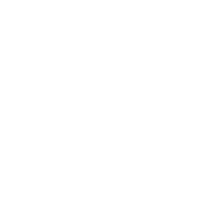

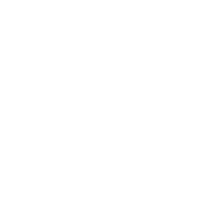

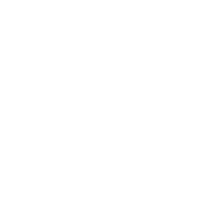

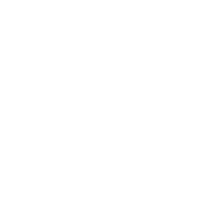

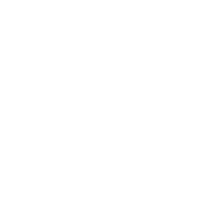

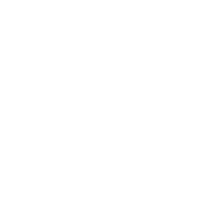

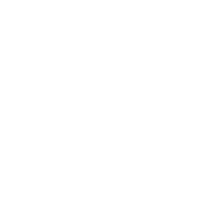

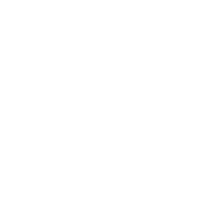

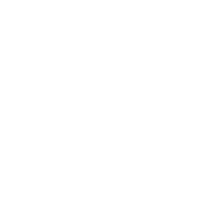

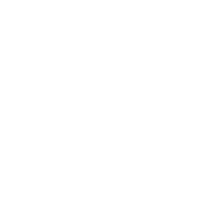

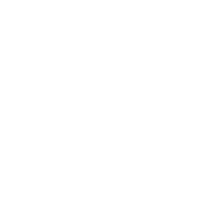

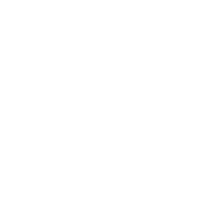

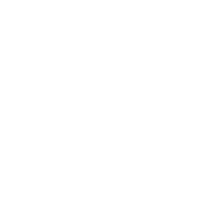

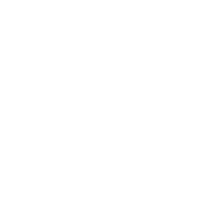

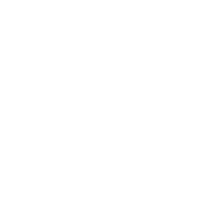

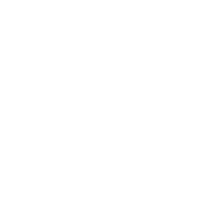

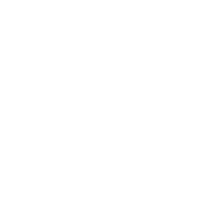

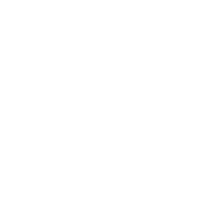

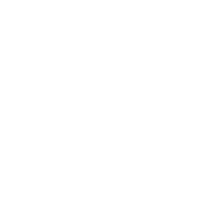

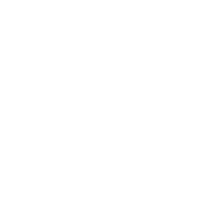

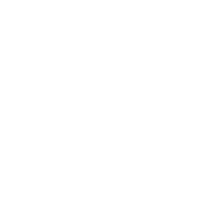

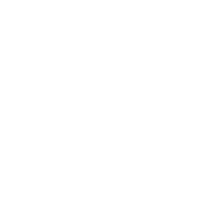

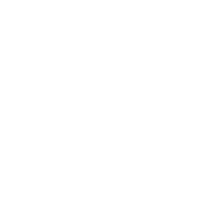

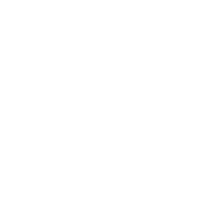

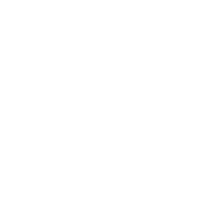

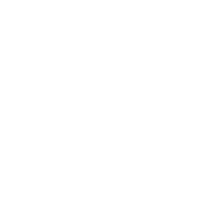

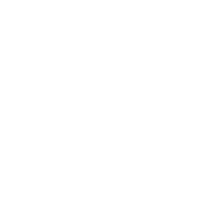

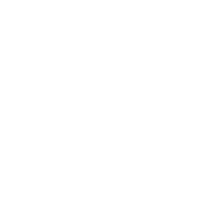

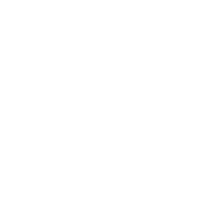

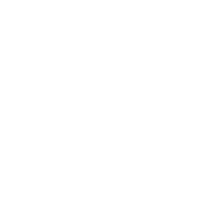

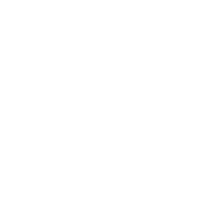

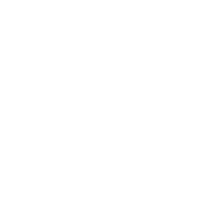

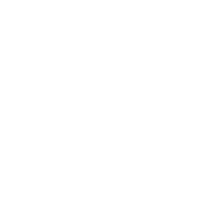

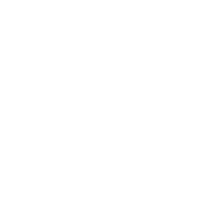

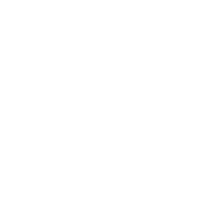

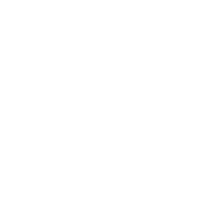

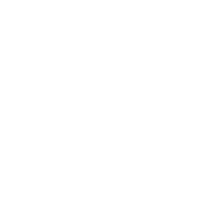

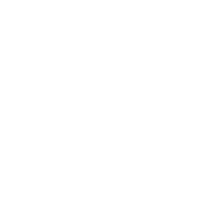

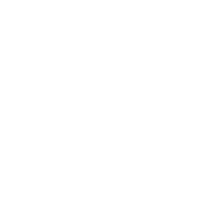

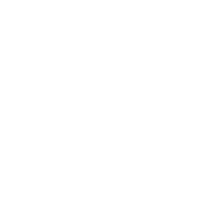

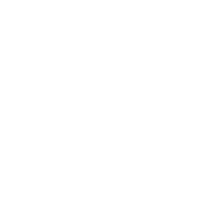

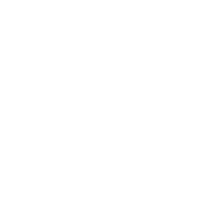

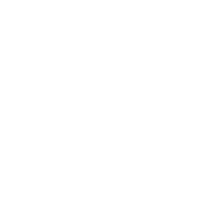

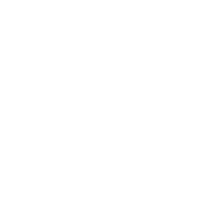

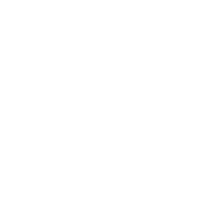

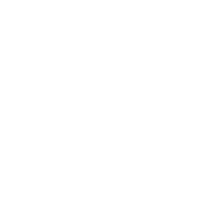

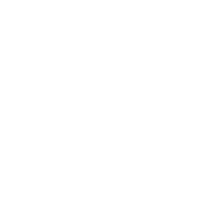

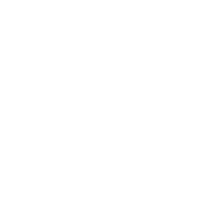

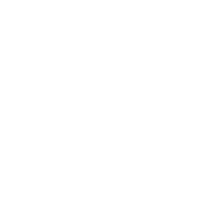

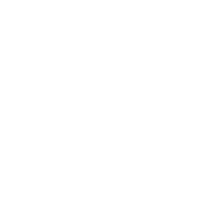

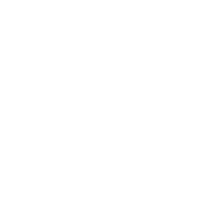

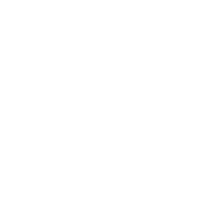

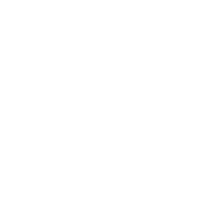

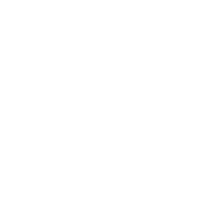

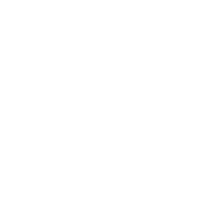

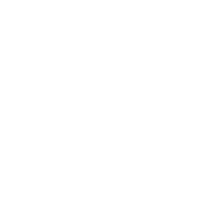

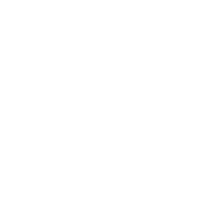

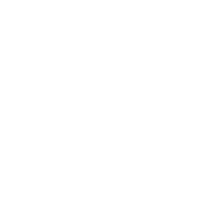

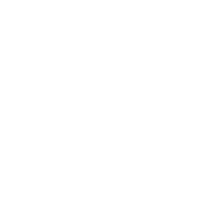

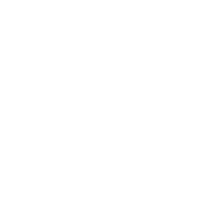

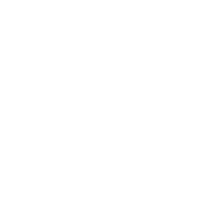

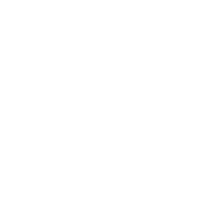

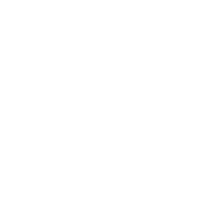

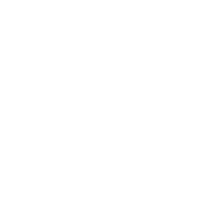

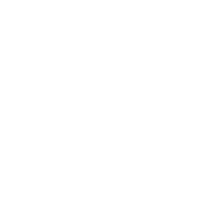

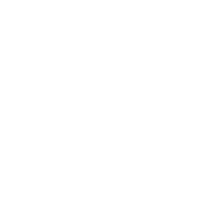

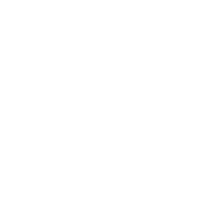

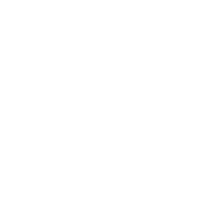

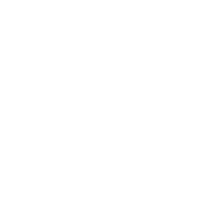

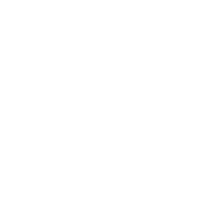

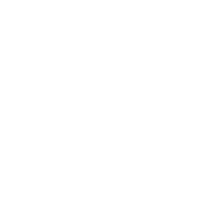

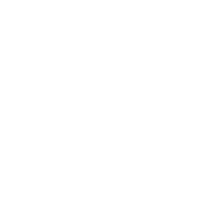

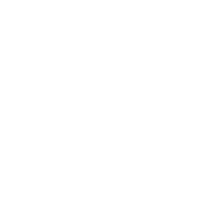

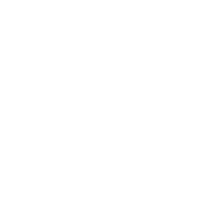

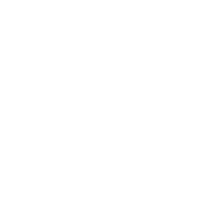

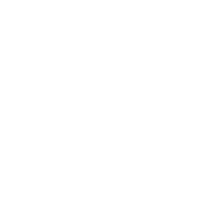

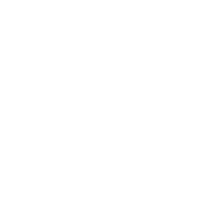

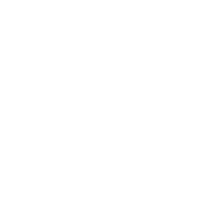

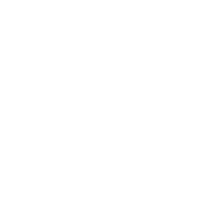

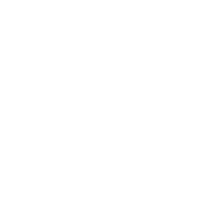

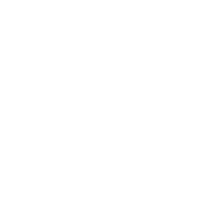

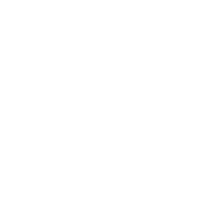

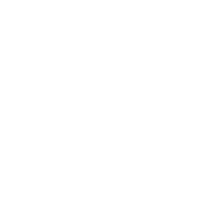

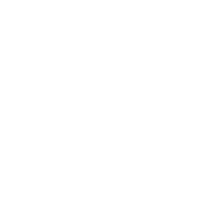

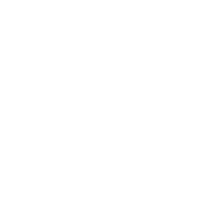

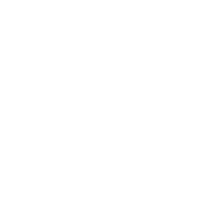

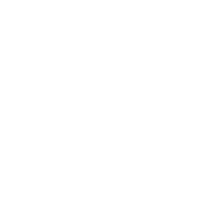

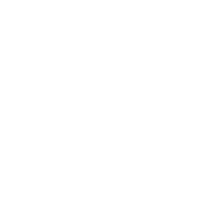

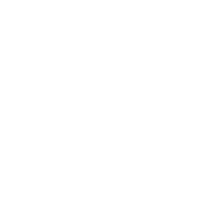

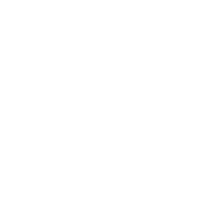

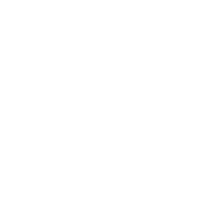

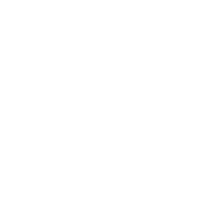

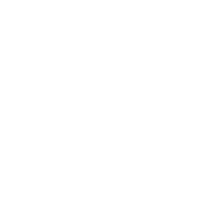

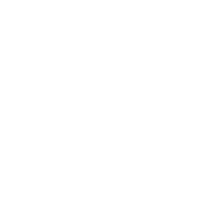

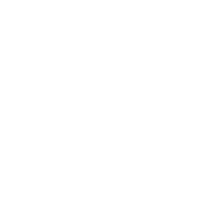

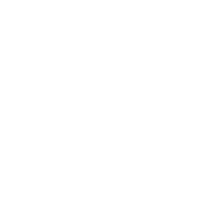

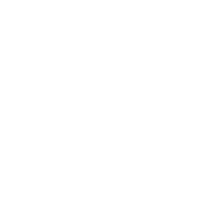

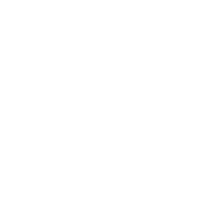

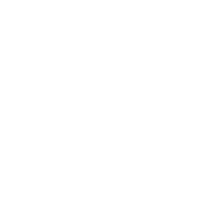

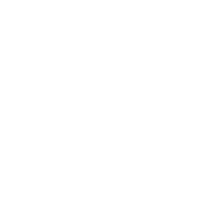

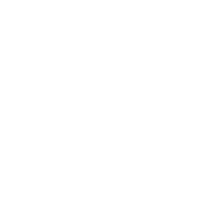

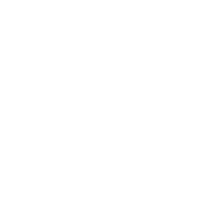

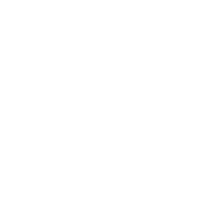

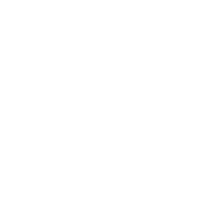

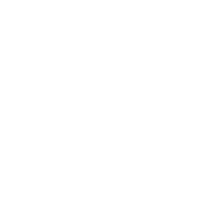

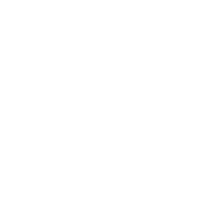

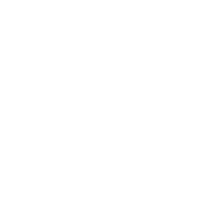

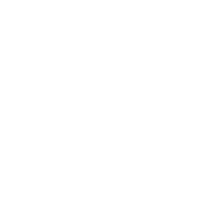

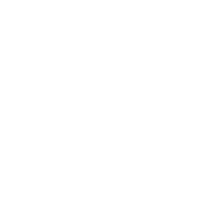

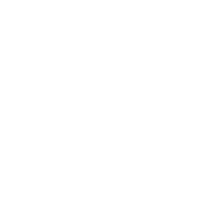

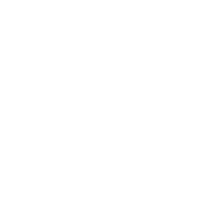

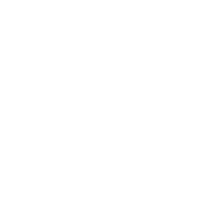

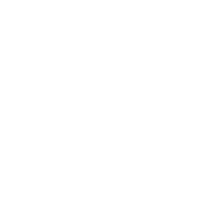

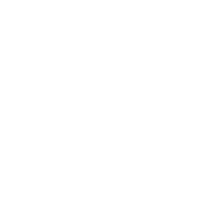

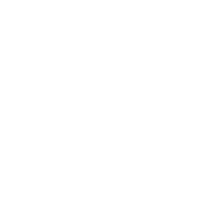

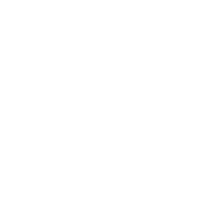

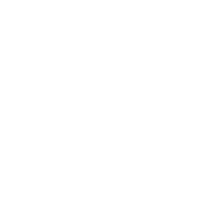

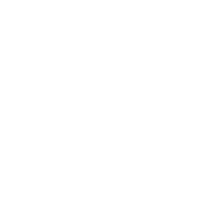

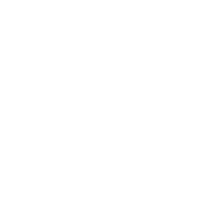

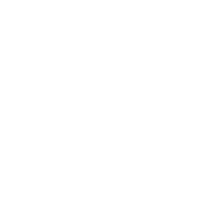

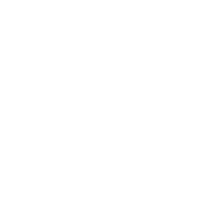

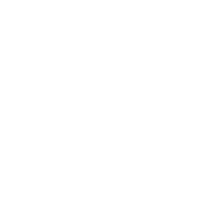

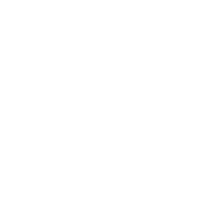

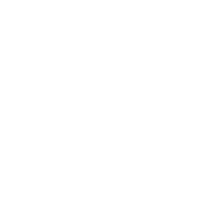

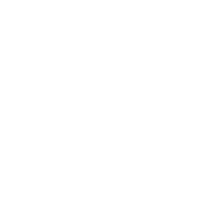

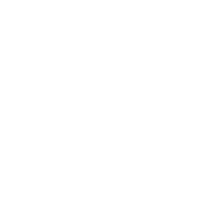

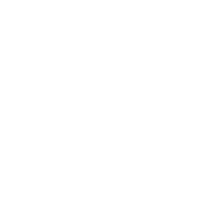

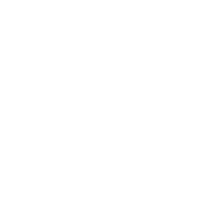

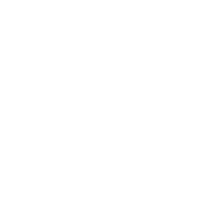

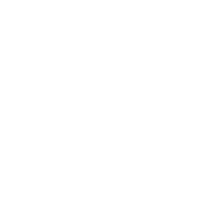

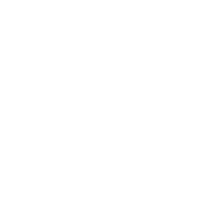

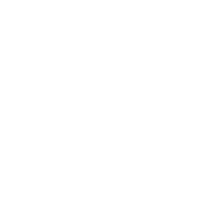

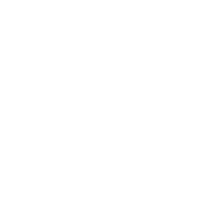

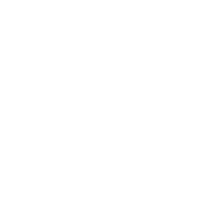

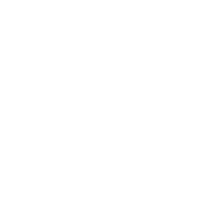

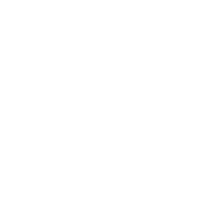

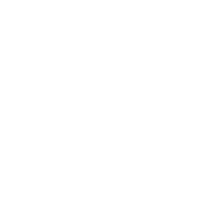

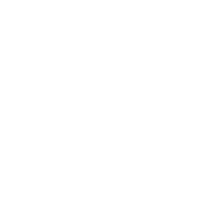

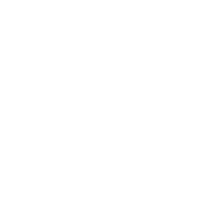

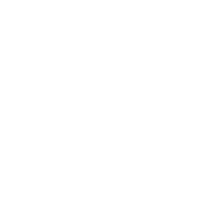

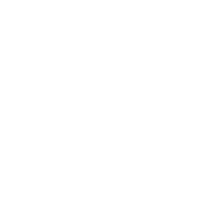

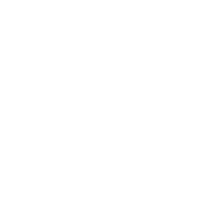

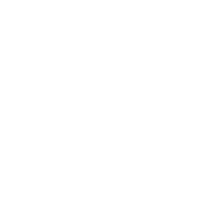

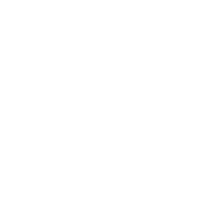

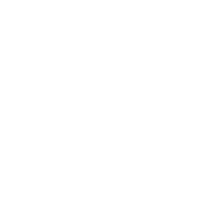

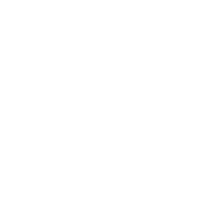

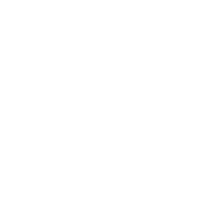

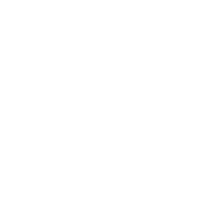

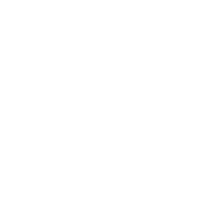

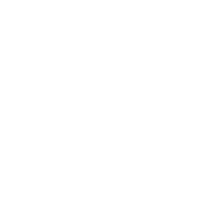

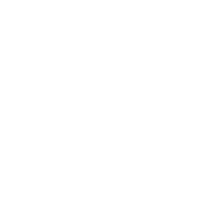

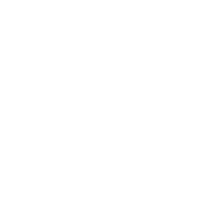

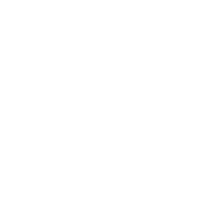

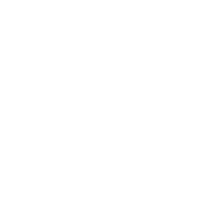

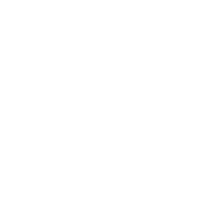

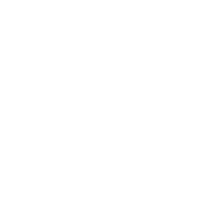

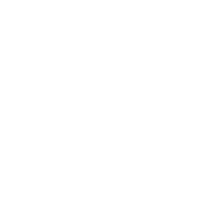

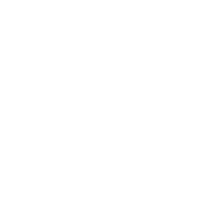

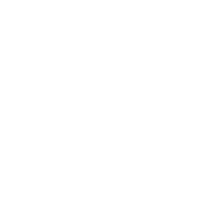

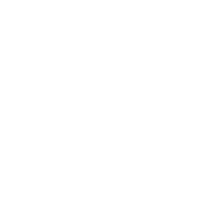

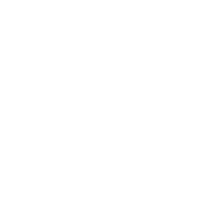

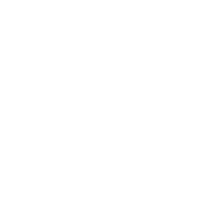

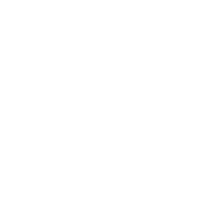

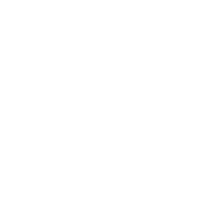

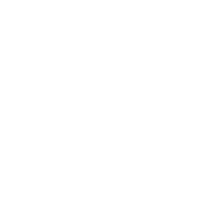

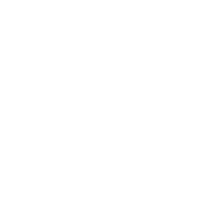

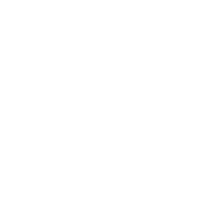

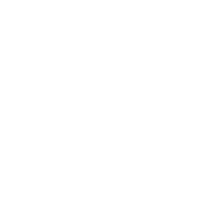

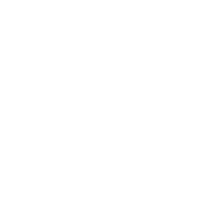

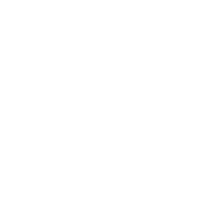

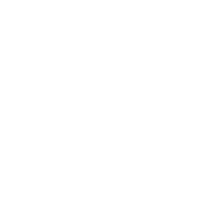

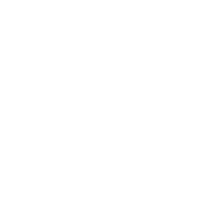

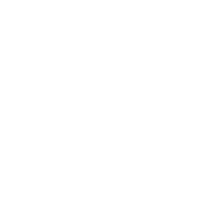

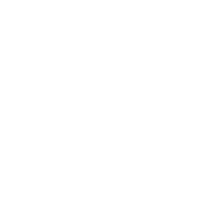

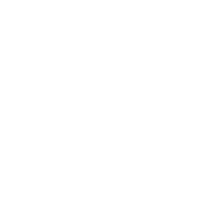

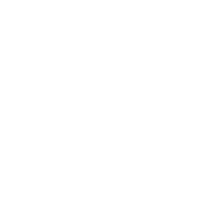

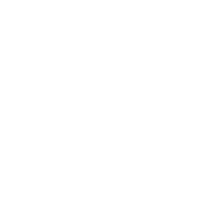

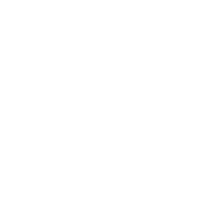

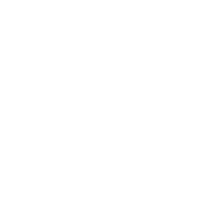

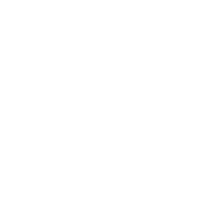

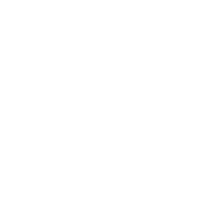

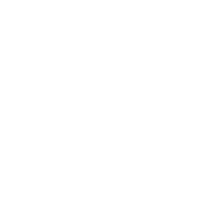

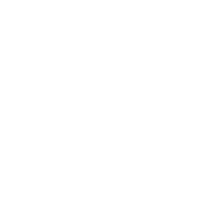

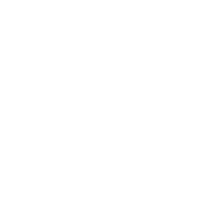

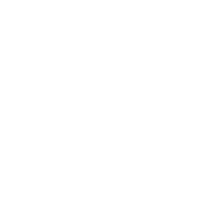

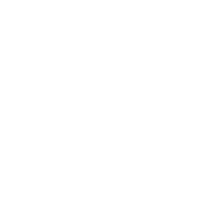

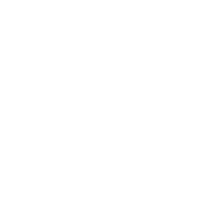

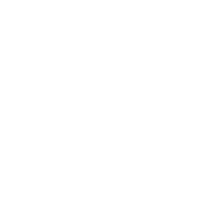

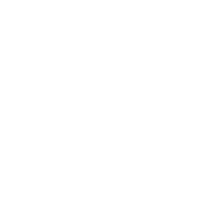

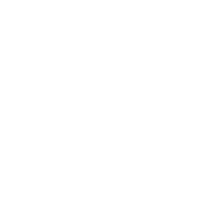

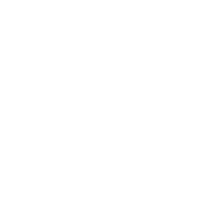

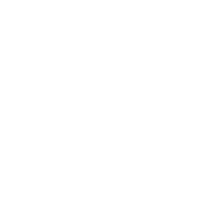

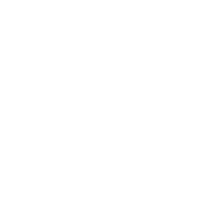

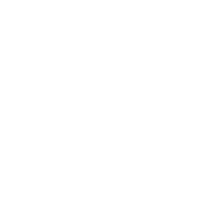

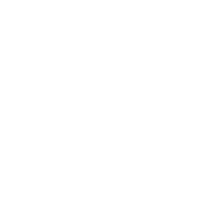

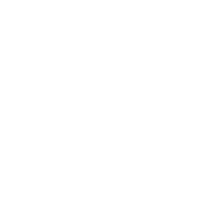

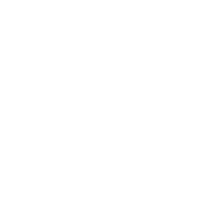

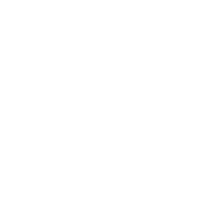

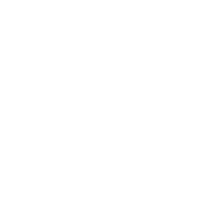

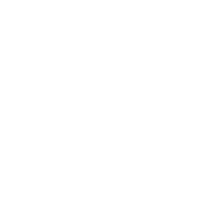

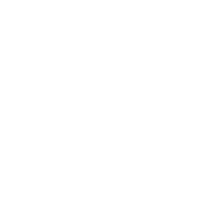

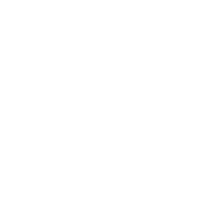

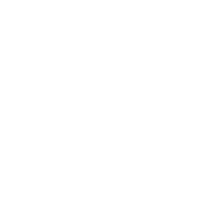

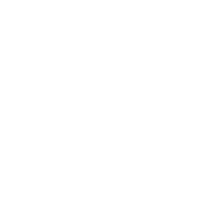

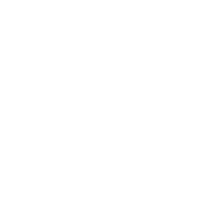

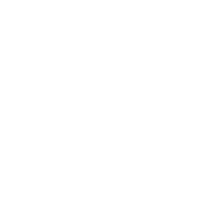

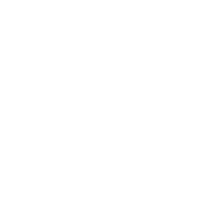

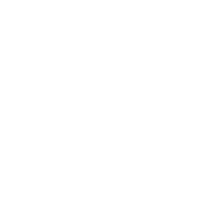

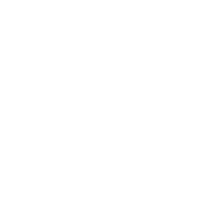

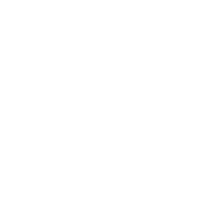

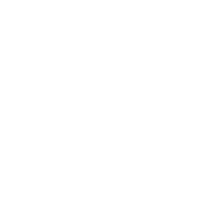

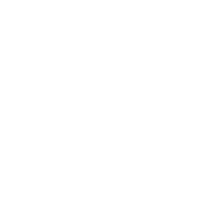

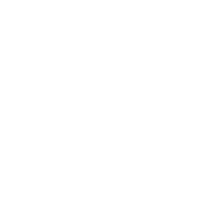

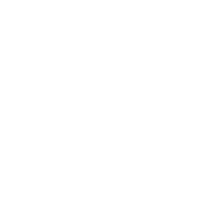

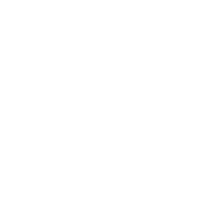

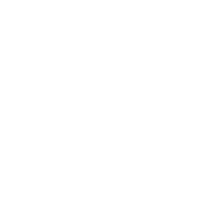

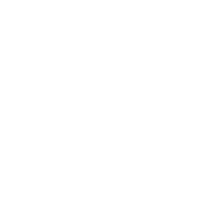

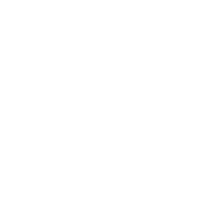

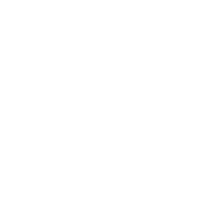

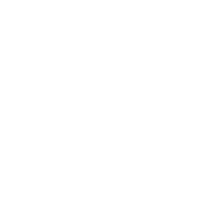

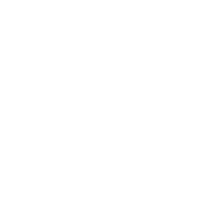

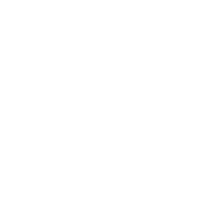

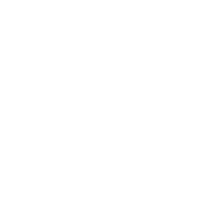

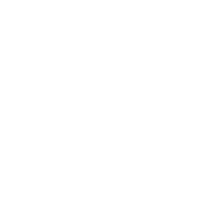

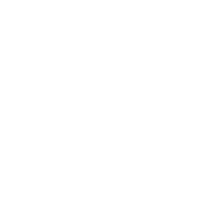

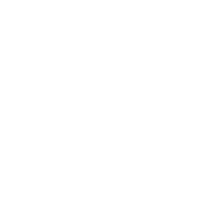

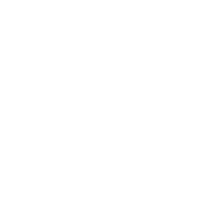

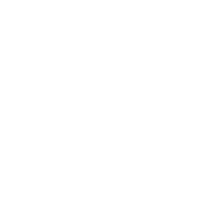

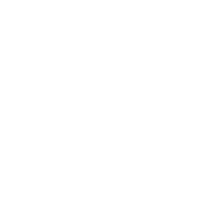

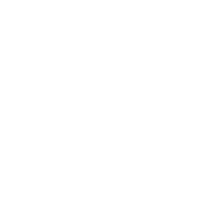

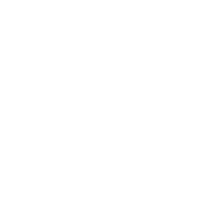

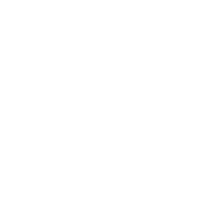

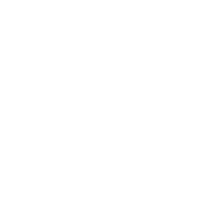

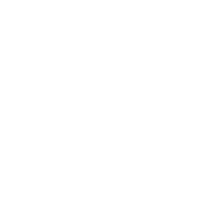

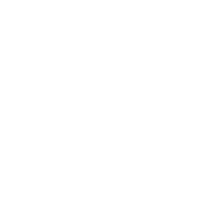

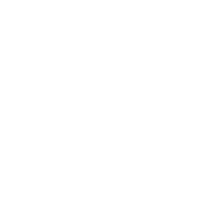

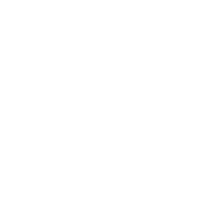

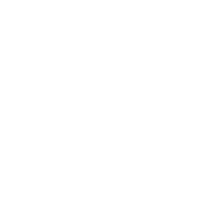

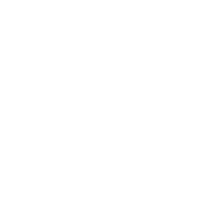

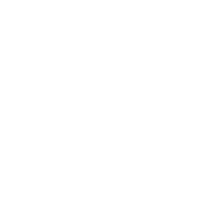

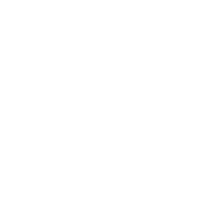

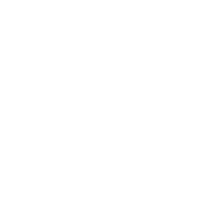

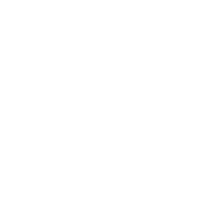

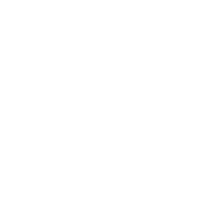

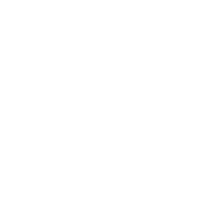

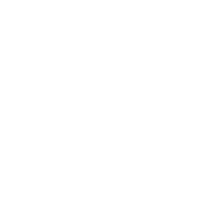

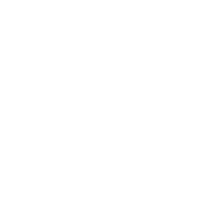

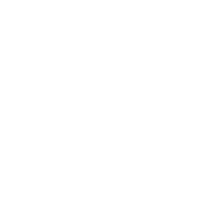

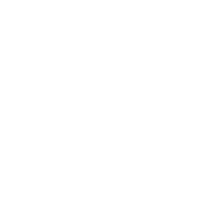

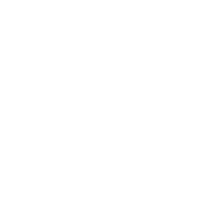

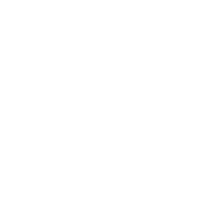

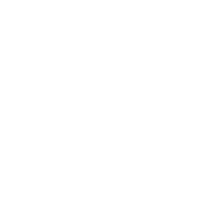

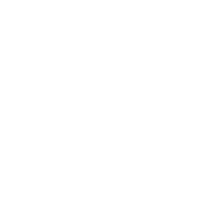

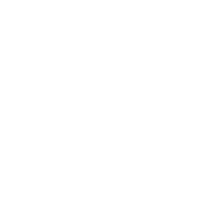

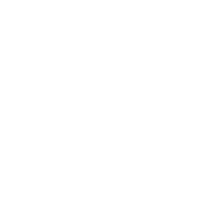

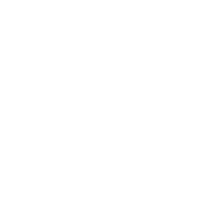

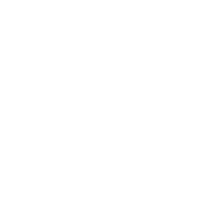

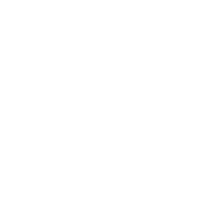

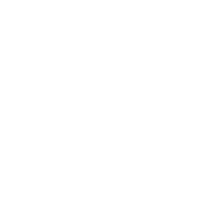

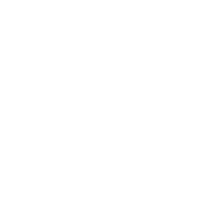

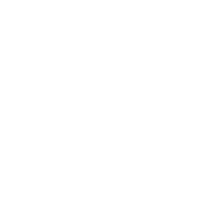

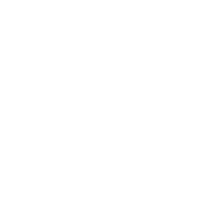

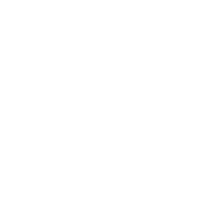

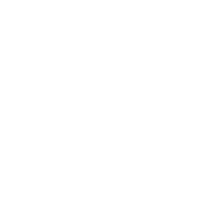

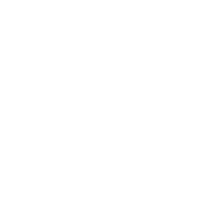

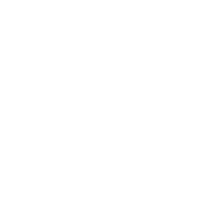

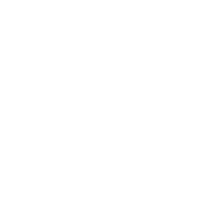

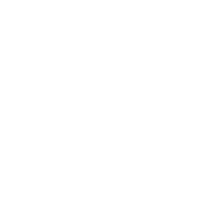

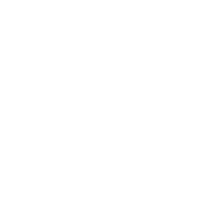

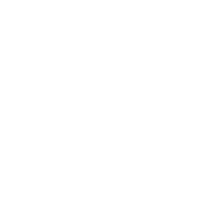

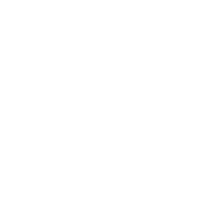

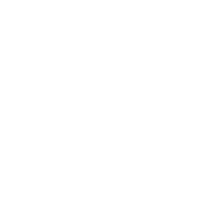

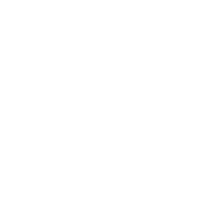

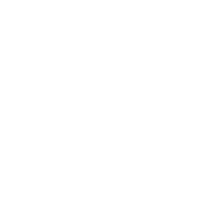

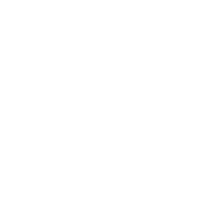

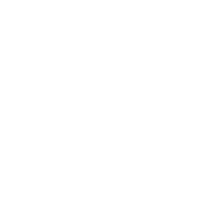

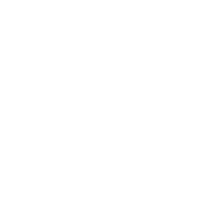

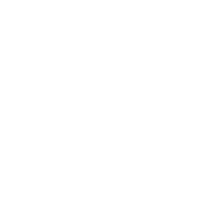

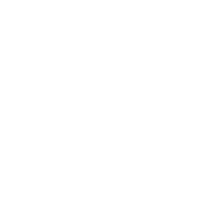

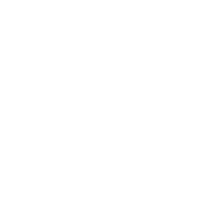

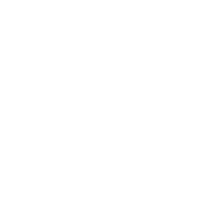

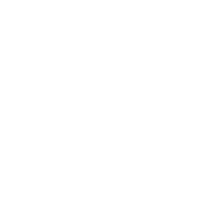

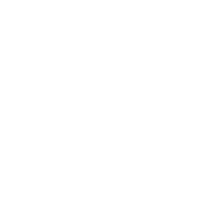

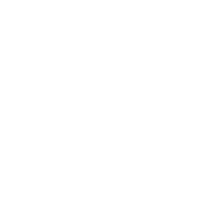

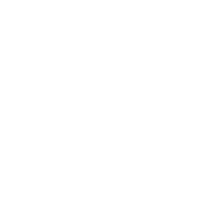

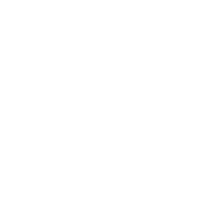

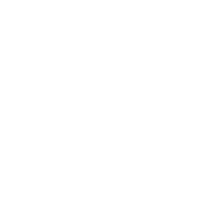

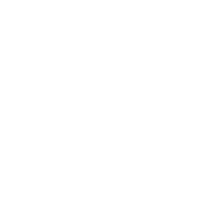

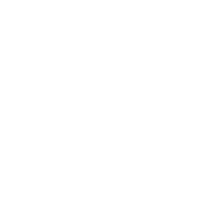

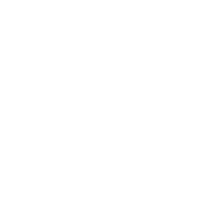

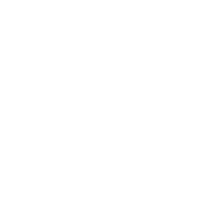

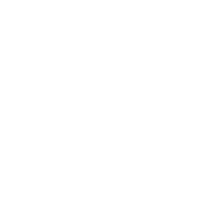

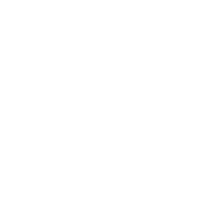

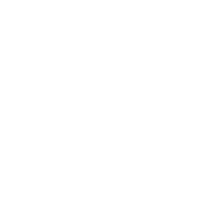

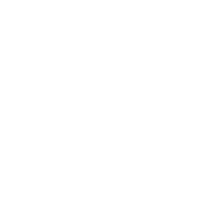

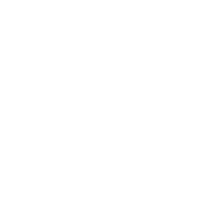

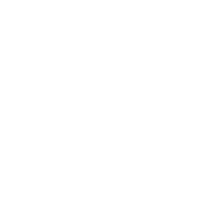

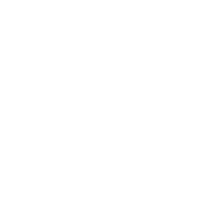

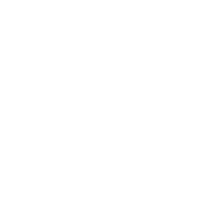

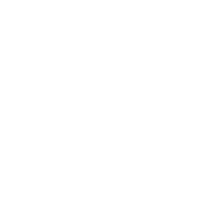

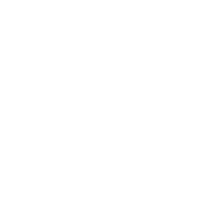

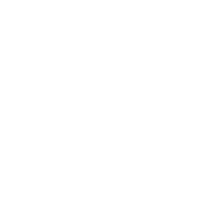

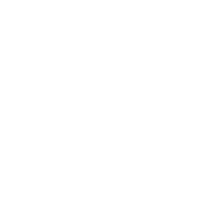

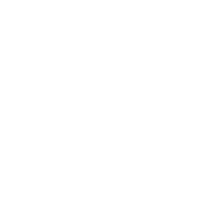

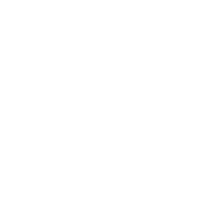

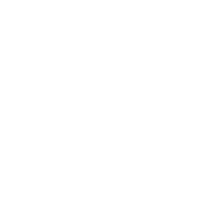

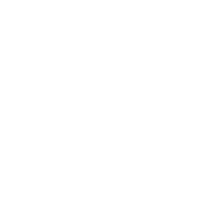

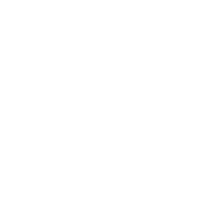

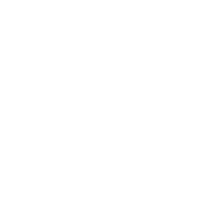

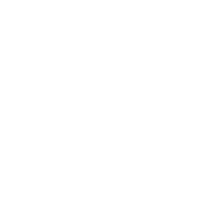

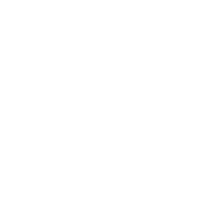

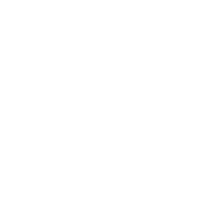

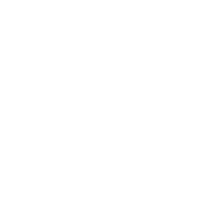

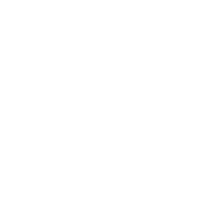

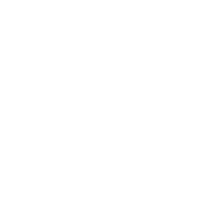

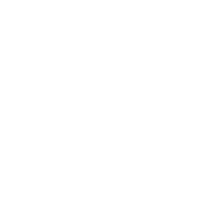

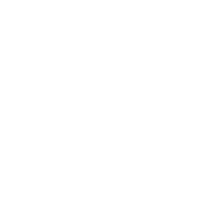

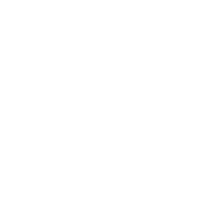

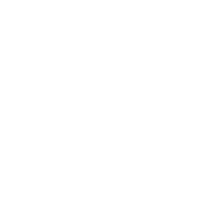

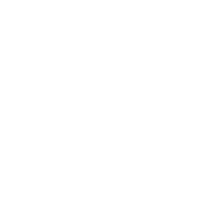

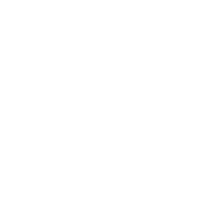

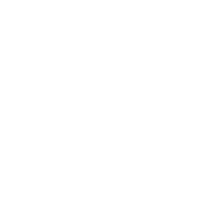

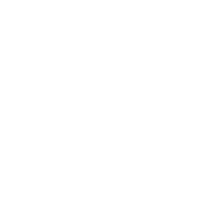

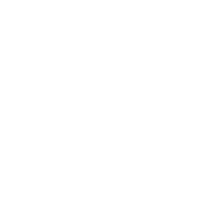

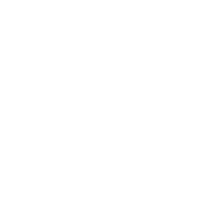

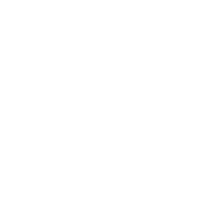

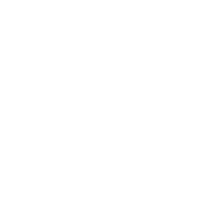

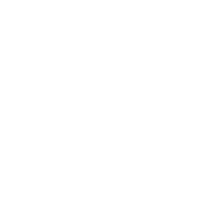

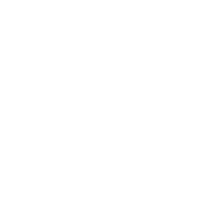

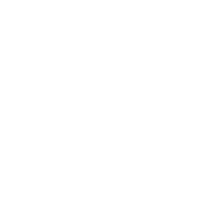

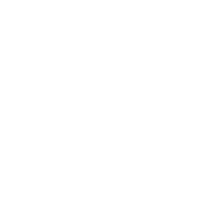

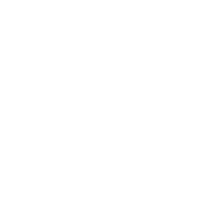

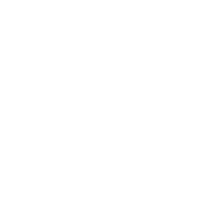

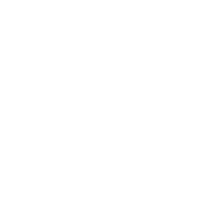

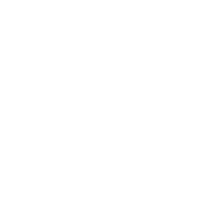

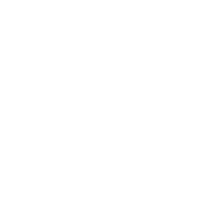

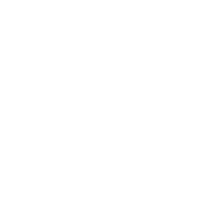

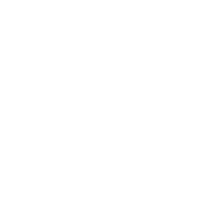

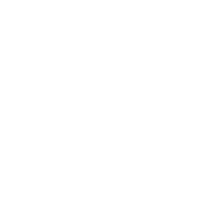

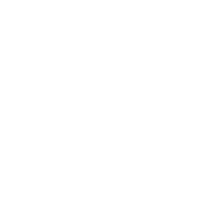

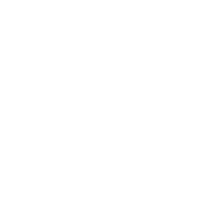

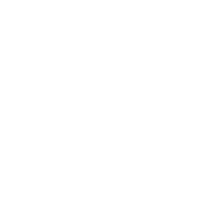

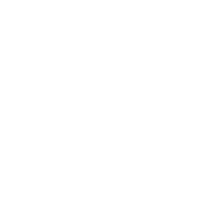

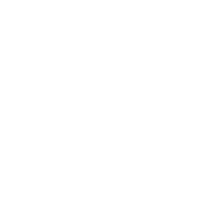

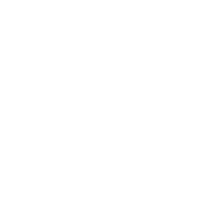

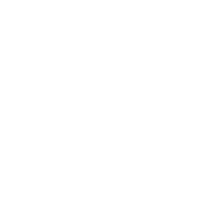

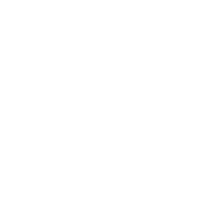

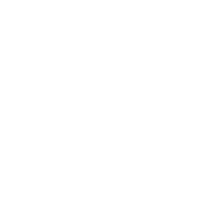

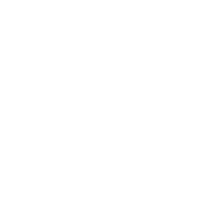

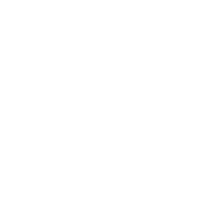

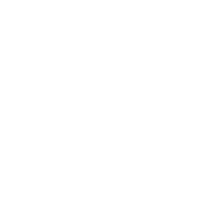

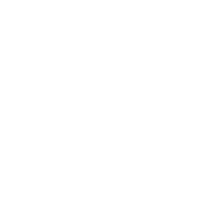

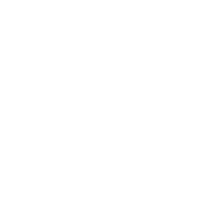

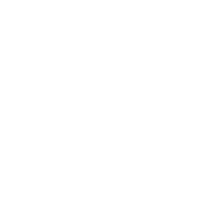

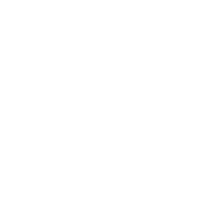

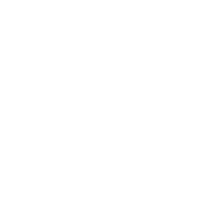

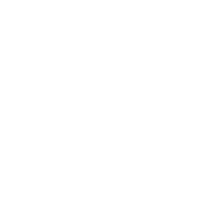

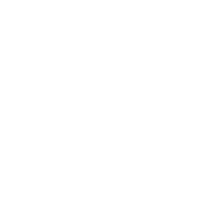

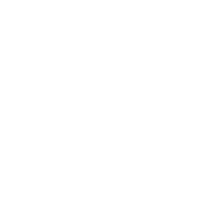

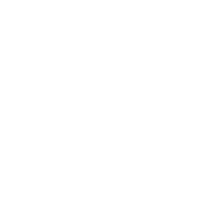

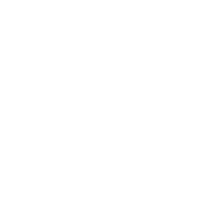

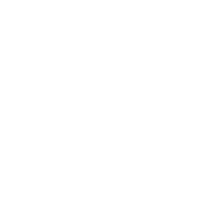

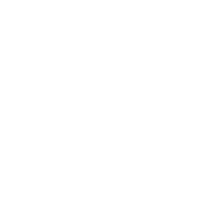

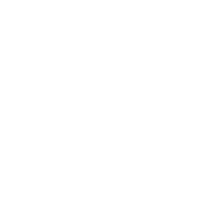

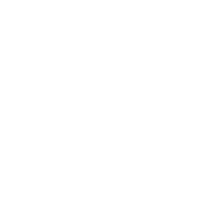

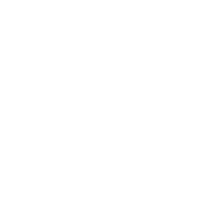

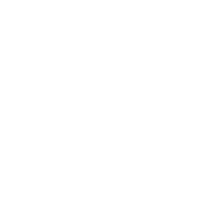

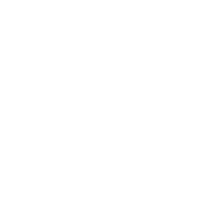

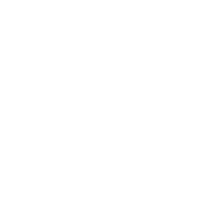

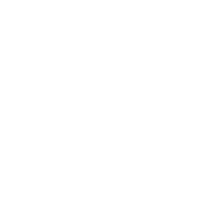

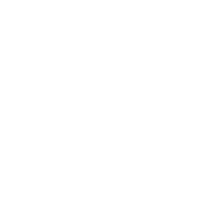

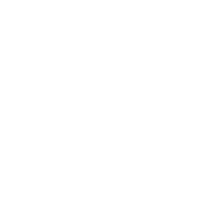

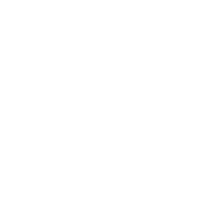

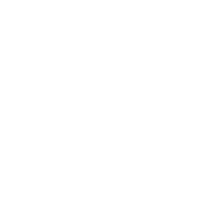

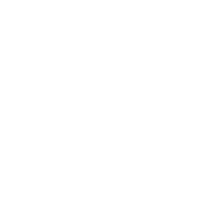

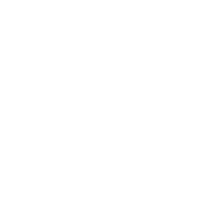

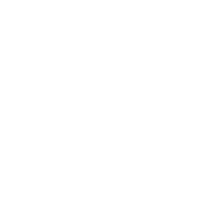

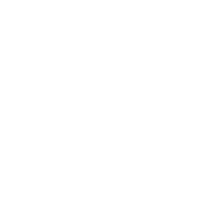

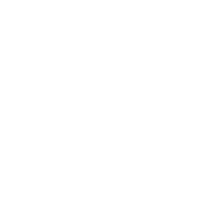

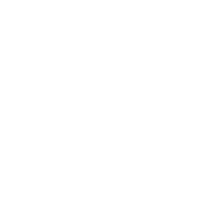

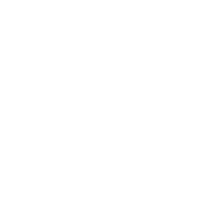

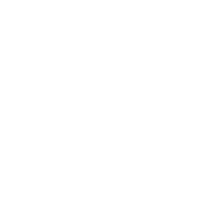

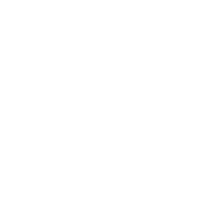

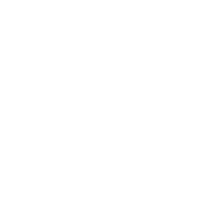

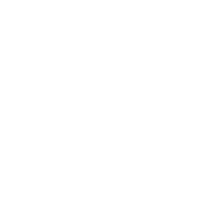

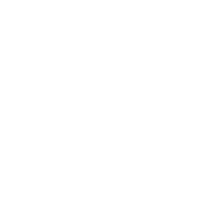

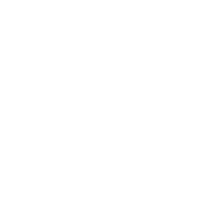

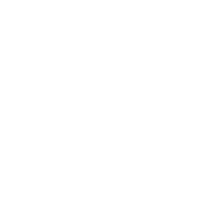

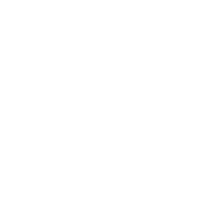

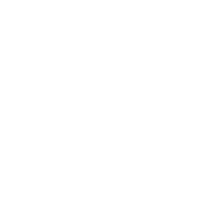

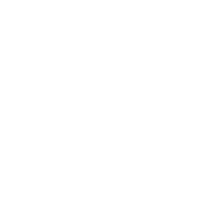

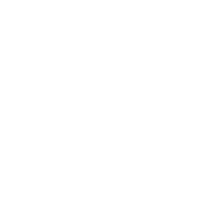

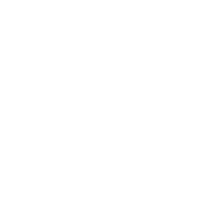

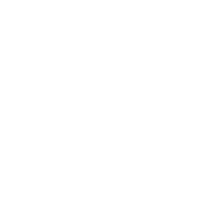

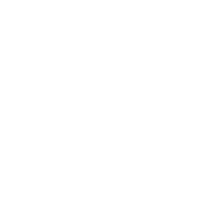

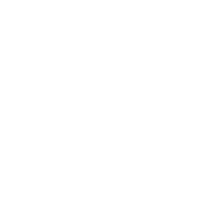

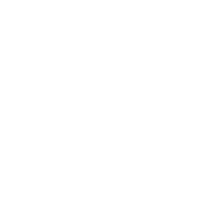

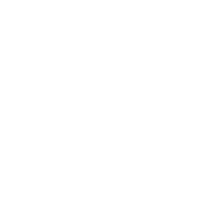

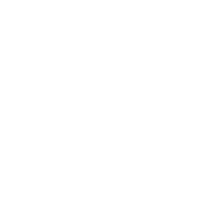

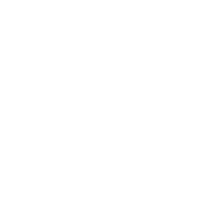

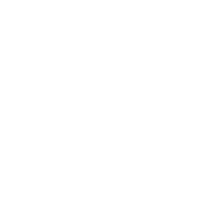

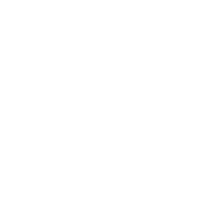

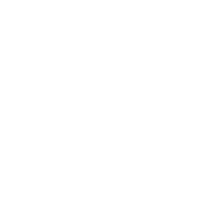

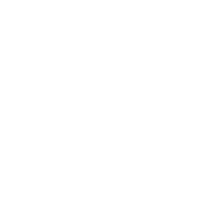

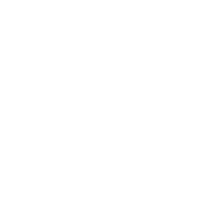

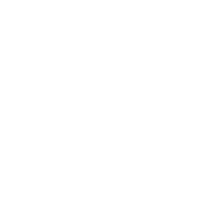

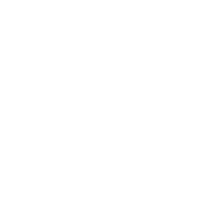

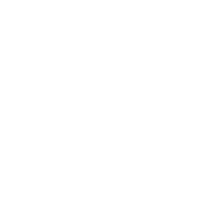

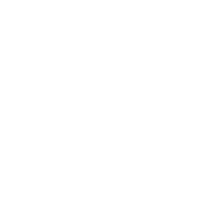

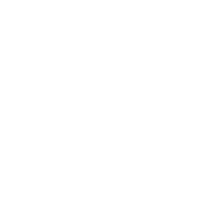

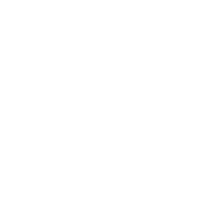

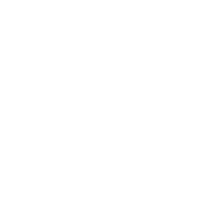

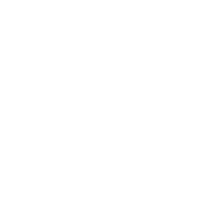

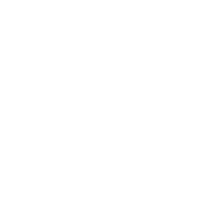

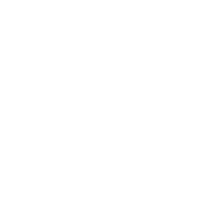

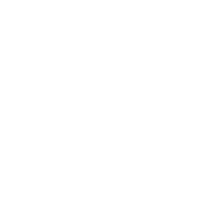

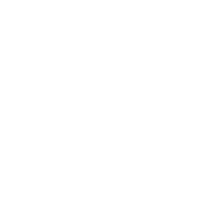

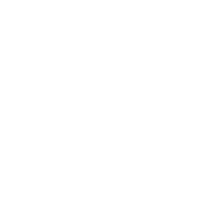

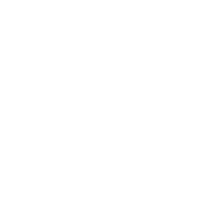

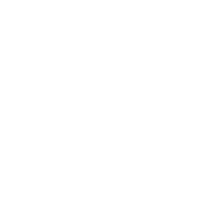

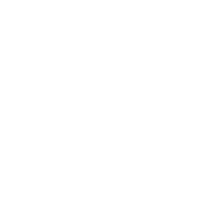

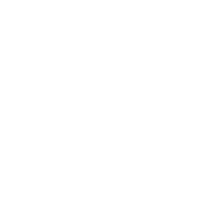

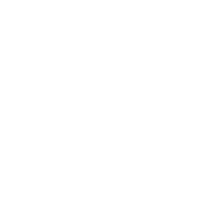

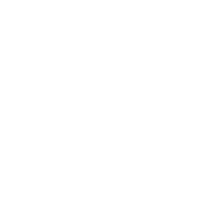

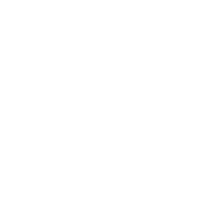

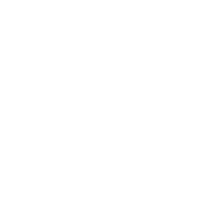

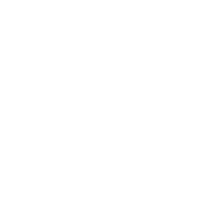

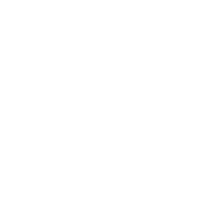

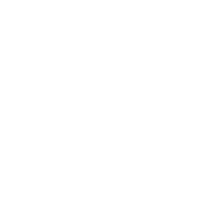

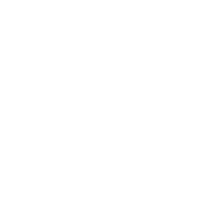

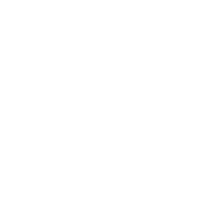

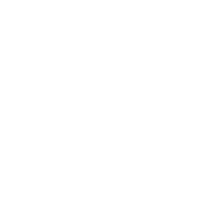

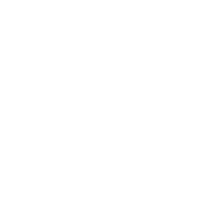

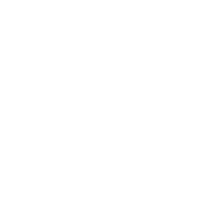

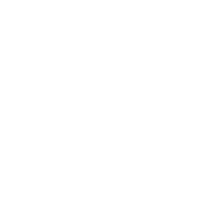

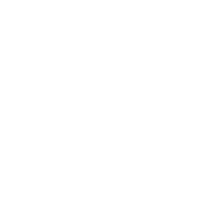

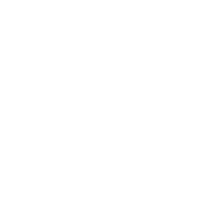

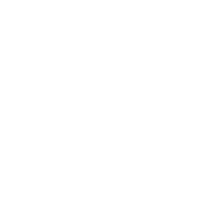

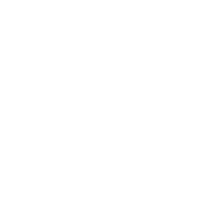

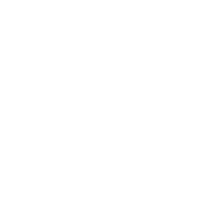

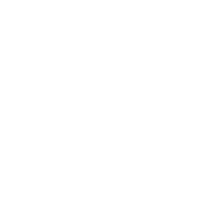

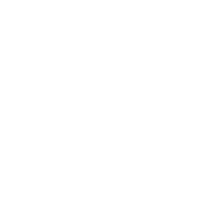

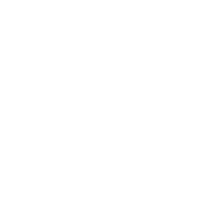

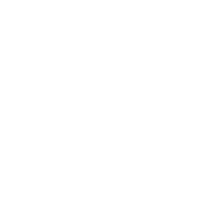

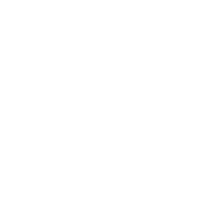

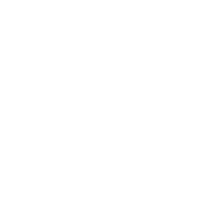

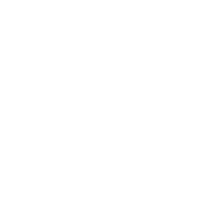

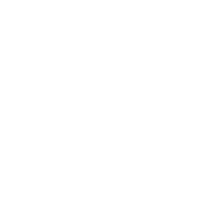

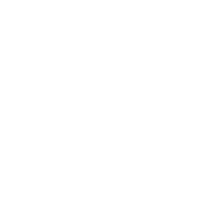

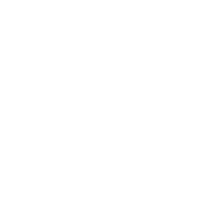

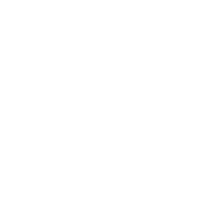

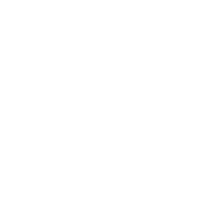

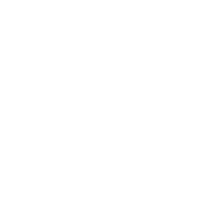

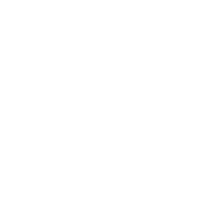

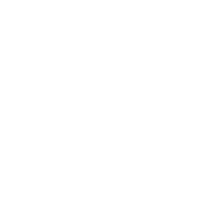

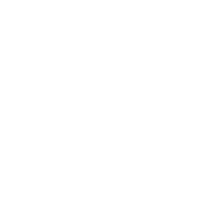

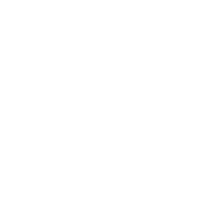

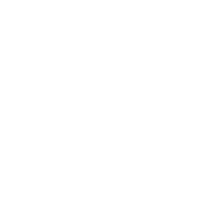

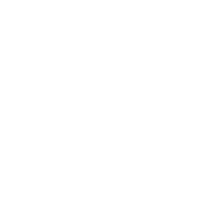

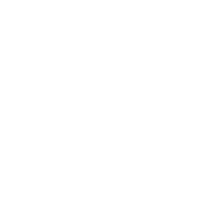

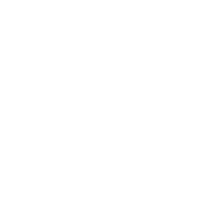

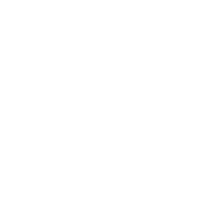

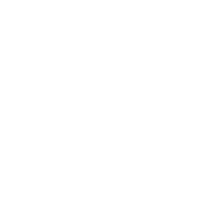

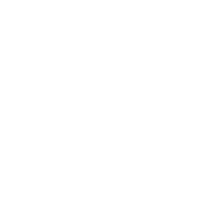

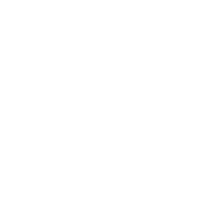

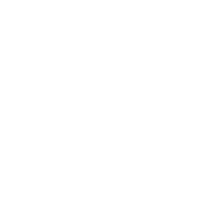

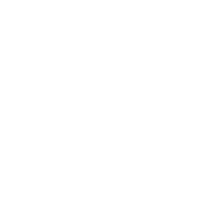

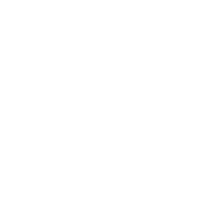

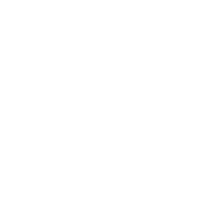

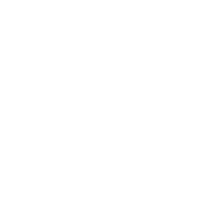

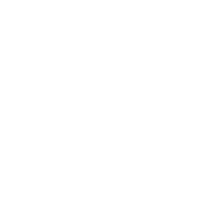

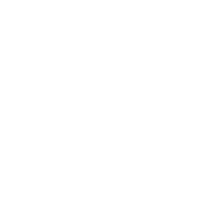

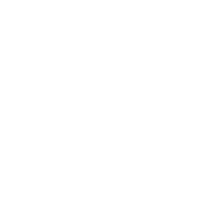

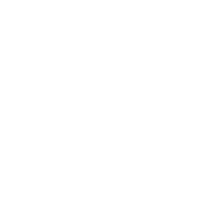

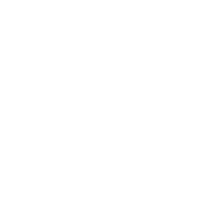

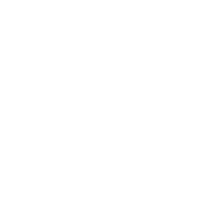

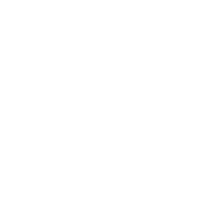

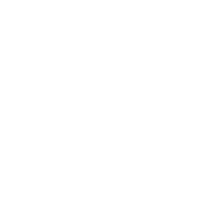

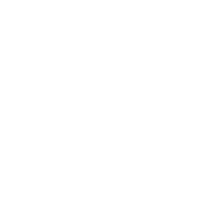

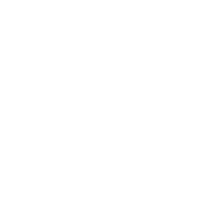

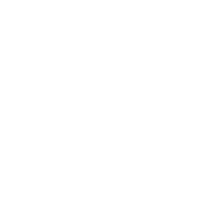

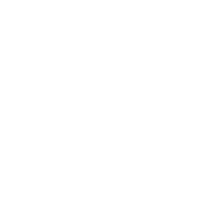

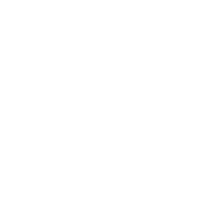

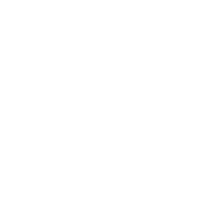

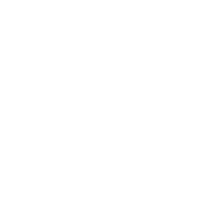

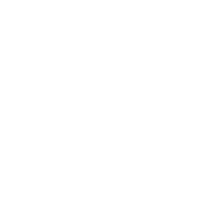

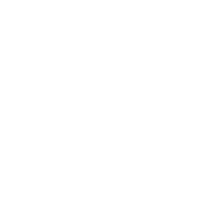

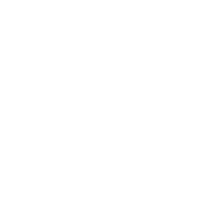

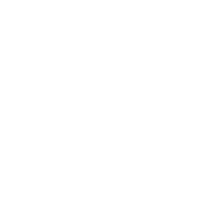

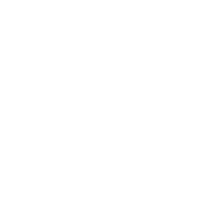

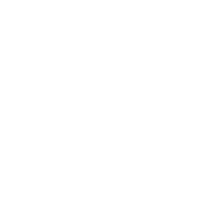

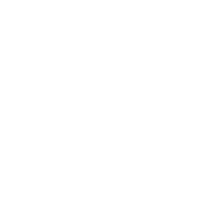

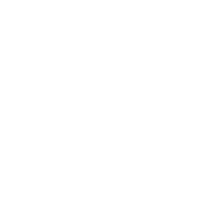

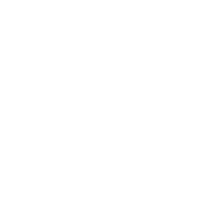

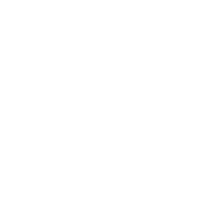

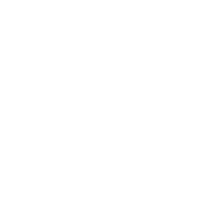

In [2]:
import random
import contextlib
with contextlib.redirect_stdout(None):
    import pygame
    import pygame.gfxdraw
from IPython.display import Image, display
import os


#System Variables -- Change to see different outcomes!
width=50
height=50
numPop=5
startingStrength=15
maxUpMutation=3
maxDownMutation=3

#Tracking variables
totalStrength=0
totalCells=0 

#Grid Setup
grid=[]
for i in range(height):
    grid.append([0]*width)

#Create populations with random starting locations -- done so locations are all unique
for i in range(numPop): #(pop ID, strength, age)
    x=random.randrange(i,width,numPop)
    y=random.randrange(i,height,numPop)
    grid[y][x]=(i,random.randrange(0, 15),0)

#Assign colors population ID using index of colors array
colors=[]
for i in range(numPop):
    colors.append((random.randrange(0, 256),random.randrange(0, 256),random.randrange(0, 256)))


#create display width height 4 times larger because cells are 4 by 4 pixels
display_width = width*4
display_height = height*4

#initialize pygame environement
pygame.init()
systemDisplay = pygame.display.set_mode((display_width,display_height))
pygame.display.set_caption('Cellular Automata')
screen = pygame.Surface(systemDisplay.get_size(), pygame.SRCALPHA, 32)
clock = pygame.time.Clock()
crashed = False

#system loop
while not crashed:
    #loop through cells
    for y in range(len(grid)):
        for x in range(len(grid[y])):
            if grid[y][x]!=0: #if cell is not empty perform rules
                nx=x
                ny=y
                #reproduce
                direction=random.randrange(0, 4)
                if direction==0: #right
                    nx+=1
                elif direction==1: #left
                    nx-=1
                elif direction==2: #ups
                    ny-=1
                elif direction==3: #down
                    ny+=1
                if nx >= 0 and ny >= 0 and nx < width and ny < height:
                    newStrength=grid[y][x][1]+random.randrange(-maxDownMutation,maxUpMutation+1)
                    if grid[ny][nx]==0:
                        grid[ny][nx]=(grid[y][x][0],newStrength,0)
                    elif grid[ny][nx][0]!=grid[y][x][0]:
                        #fight
                        if grid[ny][nx][1]<newStrength:
                            grid[ny][nx]=(grid[y][x][0],newStrength,0)
                        if grid[ny][nx][1]>newStrength:
                            grid[ny][nx]=(grid[y][x][0],grid[ny][nx][2]-newStrength,0)                        
                        else:
                            grid[ny][nx]=0
                #age
                if grid[y][x][1] < grid[y][x][2]:
                    grid[y][x]=0
                else:
                    grid[y][x]=(grid[y][x][0],grid[y][x][1],grid[y][x][2]+1)
    
    #click to add population feature -- with obe checking
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            crashed = True
        if event.type == pygame.MOUSEBUTTONDOWN:
            loc=pygame.mouse.get_pos()
            for x in range(-1,2):
                newX=int(loc[0]/4)+x
                if newX < width and newX > -1:                    
                    for y in range(-1,2):
                        strength=-1
                        newY=int(loc[1]/4)+y
                        if newY < height and newY > -1:
                            if grid[newY][newX]!=0:
                                strength=grid[newY][newX][1]+2
                            else:
                                strength=1
                        if strength > -1:
                            grid[newY][newX]=(numPop,strength,0)
            numPop+=1                
            colors.append((random.randrange(0, 256),random.randrange(0, 256),random.randrange(0, 256)))
    
    #draw populations onto screen
    systemDisplay.fill((255,255,255))
    for y in range(len(grid)):
        for x in range(len(grid[y])):
            if grid[y][x] != 0:
                pygame.gfxdraw.box(pygame.display.get_surface(), pygame.Rect(x*4,y*4,4,4), colors[grid[y][x][0]])
    pygame.display.update()
    pygame.display.flip()
    pygame.image.save(screen, 'color_wars.png')
    display(Image(filename='color_wars.png'))

    clock.tick(60)
